#**PROBLEM STATEMENT**

##**Context**

A large number of hotel reservations are cancelled due to cancellations or no-shows. Changes in plans, scheduling issues, and other factors commonly lead to cancellations. The availability of free or low-cost cancellation options makes it easier for guests, but this creates challenges for hotels, leading to potential revenue loss. These losses are particularly significant for last-minute cancellations.

New technologies that connect online booking channels have greatly changed customer booking habits and options. This increases the difficulty for hotels in managing cancellations, which are no longer limited to traditional booking methods and guest characteristics.

Booking cancellations affect a hotel in several ways:  
1. The hotel loses money when it cannot resell the room.  
2. It faces higher distribution channel costs due to increased commissions or paid promotions to sell these rooms.  
3. The hotel may have to lower prices at the last minute to resell a room, which leads to a smaller profit margin.  
4. Additional human resources are needed to accommodate the guests.  

##**Objective**

The rising number of cancellations requires a Machine Learning solution that can predict which bookings are likely to be canceled. INN Hotels Group operates a chain of hotels in Portugal and is dealing with a significant number of booking cancellations. They have contacted our firm for data-driven solutions. As a data scientist, we need to analyze the provided data to identify the factors that greatly influence booking cancellations. We will also build a predictive model to forecast which bookings will be canceled in advance. Finally, our work will support the development of effective policies for cancellations and refunds.

## **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**

* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
  * Not Selected - No meal plan selected
  * Meal Plan 1 - Breakfast
  * Meal Plan 2 - Half board (breakfast and one other meal)
  * Meal Plan 3 - Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

##**Key Questions**


Q1. What are the busiest months in the hotel?
Q2. Which market segment do most of the guests come from?

Q3. Hotel rates are dynamic and change according to demand and customer demographics. Q3. What are the differences in room prices in different market segments?

Q4. What percentage of bookings are canceled?

Q5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#**IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# For scaling
from sklearn.preprocessing import StandardScaler

# To build model for prediction
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

#**LOADING THE DATASET**

In [ ]:
from google.colab import drive, files
uploaded = files.upload()

Saving INNHotelsGroup.csv to INNHotelsGroup (1).csv


**Read the Data.**

In [ ]:
hotel_data = pd.read_csv("INNHotelsGroup.csv")

**Create a copy of dataset.**

In [ ]:
# copying data to another variable to avoid any changes to original data
df = hotel_data.copy()

#**DATA OVERVIEW**

**View the first 5 rows of the dataset.**

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

**View the last 5 rows of the dataset.**

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

**Checking the shape of the dataset.**

In [ ]:
df.shape

(36275, 19)

**Observations:**

* There are 36275 rows & 19 columns in our dataset.

**Checking the data types of columns.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations:**

* ***Data types:***
  * Most columns are numeric (int64) and avg_price_per_room is of float type, which makes them suitable for analysis and modeling.  

  * Five columns are of object type and may need encoding: type_of_meal_plan, room_type_reserved, market_segment_type, booking_status, Booking_ID.

* The **target variable is booking_status**. It shows whether a booking was canceled or not. Right now, it is of **object type** and needs to be changed to a binary numeric format for modeling.


**Statistical Summary of Dataset.**

In [ ]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

Observations:

* **no_of_adults:**
Most bookings are for **2 adults** (50th, 75th percentiles = 2.0). The minimum is **0 adults**, which may suggest an incorrect or test entry, while maximum no. of adults are 4.  
* **no_of_children:**
The average number is very low **(~0.1)**, and 75% of bookings include no children. However, a **maximum of 10** indicates some large family or group bookings.  
* **no_of_weekend_nights:** The **median is 1** night, and 75% of bookings stay up to **2 weekend nights**. The **maximum is 7**, which may represent extended weekend stays or rare cases, while minimum stay is 0.  
* **no_of_week_nights:**
The median is **2 nights**, with most bookings covering **1 to 3 weeknights**. There are a few long stays, with a maximum of 17.
* **required_car_parking_space:**  
The mean is very low, around **0.03**, and all **quartiles are 0**. This shows that **few guests ask for parking**.  
* **lead_time:**  
The average lead time is **85 days**, and there is a wide spread with a standard deviation of about **86**. Some bookings are made far in advance, with a maximum of **443 days**.  

* **arrival_year:**  
Most bookings are from **2018**, as the 25th, 50th, and 75th percentiles are all 2018. The dataset **mainly covers bookings from 2018**.  

* **arrival_month:**  
The median month for arrivals is **August**, with bookings occurring throughout the year, from **January to December**.  

* **arrival_date:**  
Bookings are **evenly distributed** across the dates from 1 to 31, with a median on the **16th**.  

* **repeated_guest:**  
The mean for repeat guests is very low, around **0.025**. This indicates that there are **few repeat customers**.  

* **no_of_previous_cancellations:**  
Very few customers have canceled before, with a mean of about 0.02. However, some customers have canceled up to **13 times**, showing that there are **outliers or habitual cancelers**.  

* **no_of_previous_bookings_not_canceled:**  
Most customers have **no past bookings that were not canceled**, with the 25th, 50th, and 75th percentiles all at 0. The maximum is **58**, indicating a few loyal or repeat customers.  

* **avg_price_per_room:**  
The median price per room is around **€99.45**, and there is a wide range that goes up to **€540**. Some entries have a price of **0**, which may mean missing or invalid pricing.  

* **no_of_special_requests:**  
Most customers make **0 to 1** special requests. The **maximum is 5** requests, which could influence the likelihood of cancellations.

**Cheching Unique values in Categorical Columns.**

In [ ]:
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
print("Unique values of Categorical columns are:-")
for col in cat_cols:
    print(f"\n{col}:\n {df[col].unique()}")



Unique values of Categorical columns are:-

type_of_meal_plan:
 ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

room_type_reserved:
 ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

market_segment_type:
 ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

booking_status:
 ['Not_Canceled' 'Canceled']


**Observations:**

* **type_of_meal_plan:**  
  * Unique Values: 'Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'.
  * The hotel provides **three meal plans** and a "Not Selected" choice.  
  * This indicates that not all customers choose meal options. **Meal preference may impact how they book**.  

* **room_type_reserved:**  
  * Unique Values: 'Room_Type 1' to 'Room_Type 7'.  
  * There are **seven different room** types, likely varying by price, size, or features.  
  * Further analysis can show if certain room types have higher cancellation rates.  

* **market_segment_type:**  
  * Unique Values: 'Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'  
  * Guests **book through various channels**, with **'Online' and 'Offline'** likely being the most popular.  
  * Corporate and Aviation may involve business clients, while **'Complementary' could mean promotions or free stays**.  

* **booking_status:**  
  * Unique Values: 'Not_Canceled', 'Canceled'  
  * This is the **target variable** for prediction.  
  * The existence of both classes shows that it is **suitable for binary classification**.

**Cheching counts in Categorical Columns.**

In [ ]:
def value_counts_with_percent(df, col):
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Count': counts, 'Percentage (%)': percents.round(2)})
    return result


for col in cat_cols:
    print(f"\n--- {col} ---\n")
    display(value_counts_with_percent(df, col))



--- type_of_meal_plan ---



Count  Percentage (%)
type_of_meal_plan                       
Meal Plan 1        27835           76.73
Not Selected        5130           14.14
Meal Plan 2         3305            9.11
Meal Plan 3            5            0.01


--- room_type_reserved ---



Count  Percentage (%)
room_type_reserved                       
Room_Type 1         28130           77.55
Room_Type 4          6057           16.70
Room_Type 6           966            2.66
Room_Type 2           692            1.91
Room_Type 5           265            0.73
Room_Type 7           158            0.44
Room_Type 3             7            0.02


--- market_segment_type ---



Count  Percentage (%)
market_segment_type                       
Online               23214           63.99
Offline              10528           29.02
Corporate             2017            5.56
Complementary          391            1.08
Aviation               125            0.34


--- booking_status ---



Count  Percentage (%)
booking_status                       
Not_Canceled    24390           67.24
Canceled        11885           32.76

**Observations:**
* **type_of_meal_plan:**
  * An overwhelming majority of guests, almost **77%**, chose Meal Plan 1. This suggests that breakfast is a highly valued inclusion.
  * Interestingly, about **1 in 7 guests, or 14%**, opted for **no meal plan** at all. This could indicate short stays or a focus on costs.
  * Only **9% selected Meal Plan 2**, which offers partial board, while Meal Plan 3 (full board) has seen almost no use, with **just 5 bookings**. This might be due to either low demand or a lack of awareness.
  * This distribution suggests that **Meal Plan 3 may need to be re-evaluated** or offered in a different way if it is not attracting guests.

* **room_type_reserved:**
  * The reservation trend **heavily favors Room_Type 1**, with nearly 4 out of every 5 bookings, or **78%**, made for this type. It likely represents a standard or budget-friendly option.
  * **Room_Type 4** is in a distant second place at **17%**, while the remaining five room types together make up **less than 6% of all bookings**.
  * **Room_Type 3** has only been **booked 7 times** out of 36,275 entries. This room might be obscure, miscategorized, or unavailable for most of the time.
  * This skew suggests that the **room allocation or promotion strategy may need adjusting**, especially for underused room types.

* **market_segment_type:**
  * More than **6 out of 10 guests** book through the **online channel**, indicating a strong preference for digital bookings.
  * **Offline bookings** still make a significant contribution at **29%**. This could come from walk-ins, agents, or traditional methods.
  * The **corporate segment**, while much smaller at **5.5%**, could become an important revenue source if it includes repeat high-value clients.
  * The **complementary and aviation segments** are quite small, making up **less than 2%** in total. They may represent niche or promotional stays. This could affect cancellation rates or room turnover but may not significantly impact revenue.

* **booking_status:**
  * About one-third, or **32.76%**, of all **bookings end with cancellations**, which is a notable proportion that supports the need for predictive modeling.
  * The remaining **67.24%** proceed as planned. However, the high cancellation rate might point to issues such as **flexible refund policies, overbooking, or last-minute guest indecision**.
  * The imbalance is significant enough to ensure that **both categories are well-represented**. This makes it suitable for classification tasks without requiring initial resampling.


**Checking Duplicates.**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Observations:**

* There are no duplicates in our dataset, suggesting our data is unique.
* This ensures data integrity & reliability.



**Checking Missing Values.**

In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:**
* There are no missing or null values in our dataset, indicating no data imputation and removal techniques are required.
* This ensures data integrity is preserved.


#**EXPLORATORY DATA ANALYSIS & KEY QUESTIONS**

##**EDA functions**

* We will define functions below to carry out EDA.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function for combined histogram and box plots.
def custplot_box_hist(
    df_copy,
    column_name,
    figure_size=(10,6),
    show_kde=False,
    num_bins=20,
    box_color=None,
    hist_color=None
):
    """
    Combined boxplot + histogram for a numeric column.

    Parameters
    ----------
    df_copy : pandas.DataFrame
        DataFrame to plot.
    column_name : str
        Column to visualise.
    figure_size : tuple, optional
        Overall figure size (default (10, 6)).
    show_kde : bool
        Overlay a KDE curve on the histogram.
    num_bins : int, optional
        Number of histogram bins (default 20).
    box_color : str or None
        Colour for the boxplot (name like 'violet', 'skyblue', etc).
    hist_color : str or None
        Colour for the histogram (name or palette color).
    """

    fig, (box_ax, hist_ax) = plt.subplots(
        nrows=2,
        sharex=True,
        figsize=figure_size,
        gridspec_kw={"height_ratios": [1, 3]}
    )

    # ── Boxplot ──
    sns.boxplot(
        x=df_copy[column_name],
        ax=box_ax,
        showmeans=True,
        color=box_color,
        meanprops={"marker": "o", "markerfacecolor": "gold"} # boxplot will be created and a "o" will indicate the mean value of the column
    )
    box_ax.set(title=f"Boxplot and Histogram of {column_name}", xlabel="")

    # ── Histogram ──
    sns.histplot(
        df_copy[column_name],
        ax=hist_ax,
        bins=num_bins,
        kde=show_kde,
        color=hist_color
    )

    # Mean and Median lines
    hist_ax.axvline(df_copy[column_name].mean(),   color="red", linestyle="--", label="Mean")
    hist_ax.axvline(df_copy[column_name].median(), color="black", linestyle="-",  label="Median")
    hist_ax.legend()

    plt.tight_layout()
    plt.show()
    plt.close(fig)


In [ ]:
# function to create labeled barplots
def cust_label_barplot(
    df_copy,
    column_name,
    figure_size=(10, 6),
    show_percent=False,
    top_n=None,
    palette=None        # for any matplotlib/seaborn colour or palette
):
    """
    Barplot of a categorical feature with count/percentage labels.

    Parameters
    ----------
    df_copy : pandas.DataFrame
        DataFrame to plot.
    column_name : str
        Categorical column to visualise.
    figure_size : tuple, optional
        Figure size in inches (default (10, 6)).
    show_percent : bool, optional
        If True, show percentages; else show counts.
    top_n : int or None, optional
        Limit to the top‑N most frequent categories.
    palette : str, list, dict or None, optional
        Colour palette (e.g. "Set2", ["skyblue","orange"], {"A":"teal",…}).
        If None, Seaborn’s default colour cycle is used.

    """
    print(df_copy[column_name].value_counts(dropna=False))
    print("\n")

    # order the categories by frequency, optionally truncate to top_n
    category_order = df_copy[column_name].value_counts().index[:top_n]
    bar_count      = len(category_order)


    # set up the fig size with dynamic width
    plt.figure(figsize=(max(bar_count + 2, figure_size[0]), figure_size[1]))

    # draw the bars
    ax = sns.countplot(
        data=df_copy,
        x=column_name,
        order=category_order,
        palette=palette,
    )

    # tidy x‑axis labels
    plt.xticks(rotation=45, fontsize=10)
    if ax.get_legend() is not None:
        ax.legend_.remove()     # each bar is self‑explanatory

    # annotate bars
    total = len(df_copy[column_name])
    for bar in ax.patches:
        height = bar.get_height()
        label  = f"{(height / total) * 100:.1f}%" if show_percent else f"{height}"
        x      = bar.get_x() + bar.get_width() / 2
        ax.annotate(
            label, (x, height),
            ha="center", va="bottom",
            fontsize=12,
            xytext=(0,3), textcoords="offset points" # offset to move labels within plot boundry
        )

    plt.tight_layout()
    plt.show()

    plt.close(ax.figure)        # prevents duplicate plots

In [ ]:
def stacked_barplot_custom(data, predictor, target, palette='Set2'):
    """
    Creates a normalized stacked bar plot for a categorical predictor and target variable.
    Displays the raw counts and the proportional distribution.

    Parameters:
    - data (pd.DataFrame): The input dataset
    - predictor (str): The categorical independent variable to group by (x-axis)
    - target (str): The categorical target variable (segments within each bar)
    - palette (str or list): Color palette name or list of hex codes (default: 'Set2')
    """

    # Determine the number of unique categories in predictor to size the figure dynamically
    category_count = data[predictor].nunique()

    # Generate a cross-tabulation (raw counts) of predictor vs target
    raw_counts = pd.crosstab(data[predictor], data[target], margins=True)
    print(raw_counts)
    print("-" * 100)

    # Normalize the crosstab row-wise to get proportions within each predictor category
    normalized_counts = pd.crosstab(data[predictor], data[target], normalize='index')

    # Identify the least frequent target class to sort categories by it (helps consistency)
    least_frequent_class = data[target].value_counts().index[-1]
    normalized_sorted = normalized_counts.sort_values(by=least_frequent_class, ascending=False)

    # Select a color palette based on the number of target classes
    num_classes = normalized_sorted.shape[1]
    colors = sns.color_palette(palette, n_colors=num_classes)

    # Plot the normalized stacked bar chart
    ax = normalized_sorted.plot(
        kind='bar',
        stacked=True,
        figsize=(category_count + 5, 5),
        color=colors
    )

    # Add labels and adjust layout
    plt.xlabel(predictor)
    plt.ylabel('Proportion')
    plt.title(f"Stacked Bar Plot: {predictor} vs {target}")
    plt.xticks(rotation=45)

    # Move legend outside the plot and format it
    plt.legend(title=target, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    # Ensure layout is not clipped
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Close the plot to prevent it from being duplicated in notebooks
    plt.close(ax.figure)


In [ ]:
# Function to visualize the distribution of a continuous variable with respect to the target class
def distribution_plot_wrt_target(data, predictor, target):
    """
    Visualizes the distribution of a numerical predictor with respect to binary target variable
    using histograms and boxplots (with/without outliers), with distinct colors per predictor.
    """

    # Creates a fixed color for this predictor to ensure visual uniqueness across plots
    base_colors = {
        'Age': 'darkcyan',
        'Income': 'crimson',
        'SpendingScore': 'mediumseagreen',
        'Balance': 'slateblue',
        'Tenure': 'darkorange',
        'default': 'steelblue'
    }

    var_color = base_colors.get(predictor, base_colors['default'])  # fallback if not listed

    # Setup 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize=(8, 6)) # Adjusted figure size

    # Fetch the two unique target values (assumed binary)
    target_values = data[target].unique()

    # Plot distribution for first target class
    axs[0, 0].set_title(f"{predictor} Distribution when {target} = {target_values[0]}", fontsize='small') # Decreased title font size
    sns.histplot(
        data=data[data[target] == target_values[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='skyblue', # Use a different color for this plot
        stat="density",
    )

    # Plot distribution for second target class
    axs[0, 1].set_title(f"{predictor} Distribution when {target} = {target_values[1]}", fontsize='small') # Decreased title font size
    sns.histplot(
        data=data[data[target] == target_values[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='salmon', # Use a different color for this plot
        stat="density",
    )

    # Boxplot with outliers
    axs[1, 0].set_title(f"Boxplot of {predictor} by {target}", fontsize='small') # Decreased title font size
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target, legend = False , palette='viridis') # Use a different color palette

    # Boxplot without outliers
    axs[1, 1].set_title(f"Boxplot of {predictor} by {target} (No Outliers)", fontsize='small') # Decreased title font size
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, hue=target,legend = False, palette='plasma') # Use a different color palette


    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

##**Univariate Analysis**

* **Observations on lead_time.**

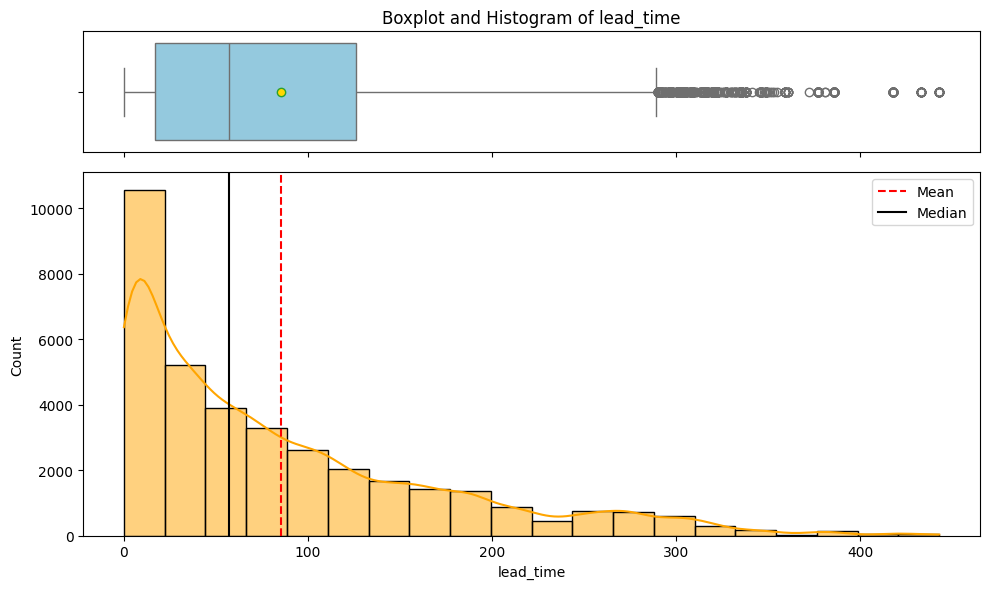

In [ ]:
custplot_box_hist(df, "lead_time", show_kde=True, box_color="skyblue", hist_color="orange")


**Observations:**

* ***Histogram plot:***
  * The data seems to be highly right skewed, with 0 as the highest lead time, suggesting same day booking and check-in by customer, due to last minute booking or walk-in customers.

* ***Box Plot:***
  * Box plot suggests average lead time is ~85 days, with median of ~57 days, shows that 57%  of the booking made falls between 0-57 days.
  * Data also indicates that minimum lead time is 0 while max is around 443 days, indicating either customer checked in on the same day of booking or booked a year early (extreme values).
  * We can also observe various significant outliers present in the data with lead time greater than 270 days.
  * These outliers points towards booking were made in more than 9 months in advance by customers.
  * The bookings which are made >85 days may have high cancel rate.

  ----------------------------------------------------------------------------




* **Observations on avg_price_per_room.**

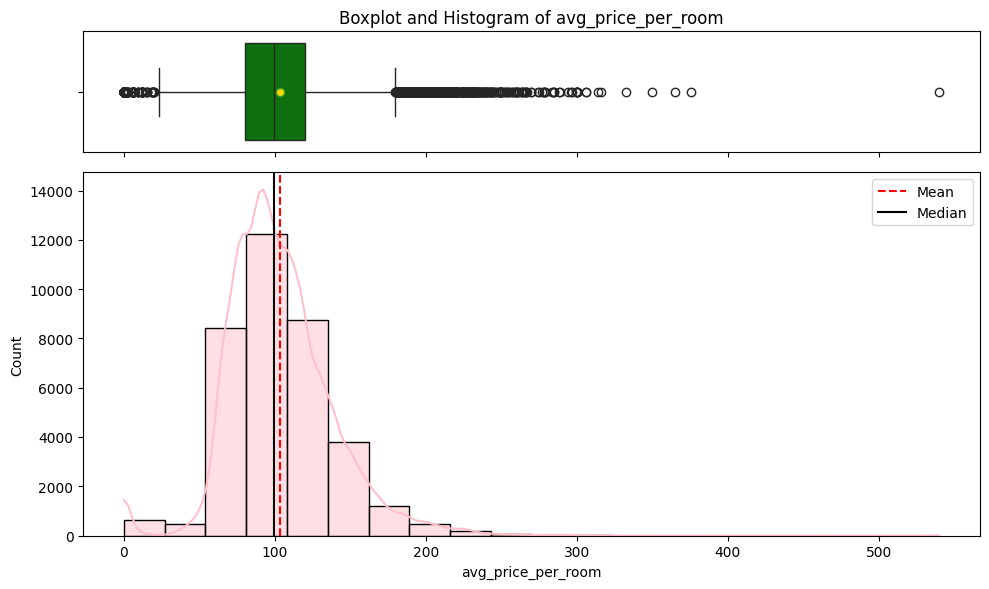

In [ ]:
custplot_box_hist(df, "avg_price_per_room", show_kde=True, box_color="green", hist_color="pink")

**Observations:**

***Histogram Plot***
 * The plot shows data is slightly right skewed with peak around 100 and longer tail towards higher price side.
 * Majority of data is clustered around 90-110 range, resembling a normal distribution but with minor right skewness.

***Box Plot:***
 * Median and median is ~100 with interquartile range ~90-110.
 * Significant outliers present on both side of whiskers, lower end whiskers outliers suggesting high price range >200/day Euros due to premium rooms or data errors.
 * Outliers on lower whiskers (down t0 ~30/day Euros), suggesting low price rooms with less facilities, or discounted price rooms. We need to investigate further if it is actual data or data inconsistencies.


**Observations on no_of_children.**

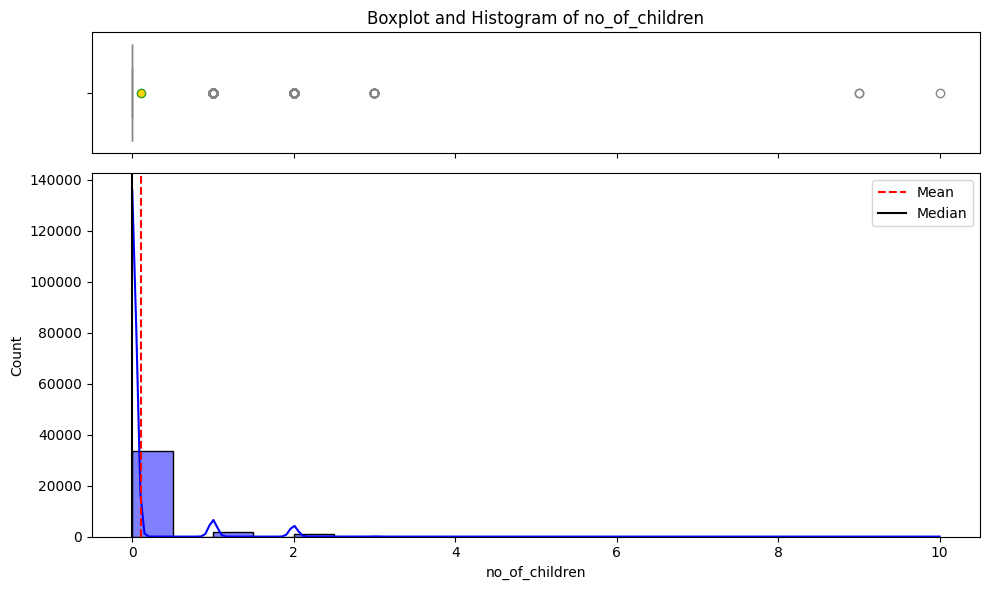

In [ ]:
custplot_box_hist(df, "no_of_children", show_kde=True, box_color="pink", hist_color="blue")


**Observations:**

***Histogram Plot***
* The distribution is highly right skewed.
* Data is clustered around 0-3, suggesting bookings mostly made by customers with no children or families with maximum 2-3 kids.


***Box Plot***
* The average number is very low (~0.1), and 75% of bookings include no children, suggesting booking made by bachelors or couples with no children.

* The outliers are present on lower ends of box plot, maximum of 10 indicates some large family or group bookings.





**Observations on no_of_adults.**

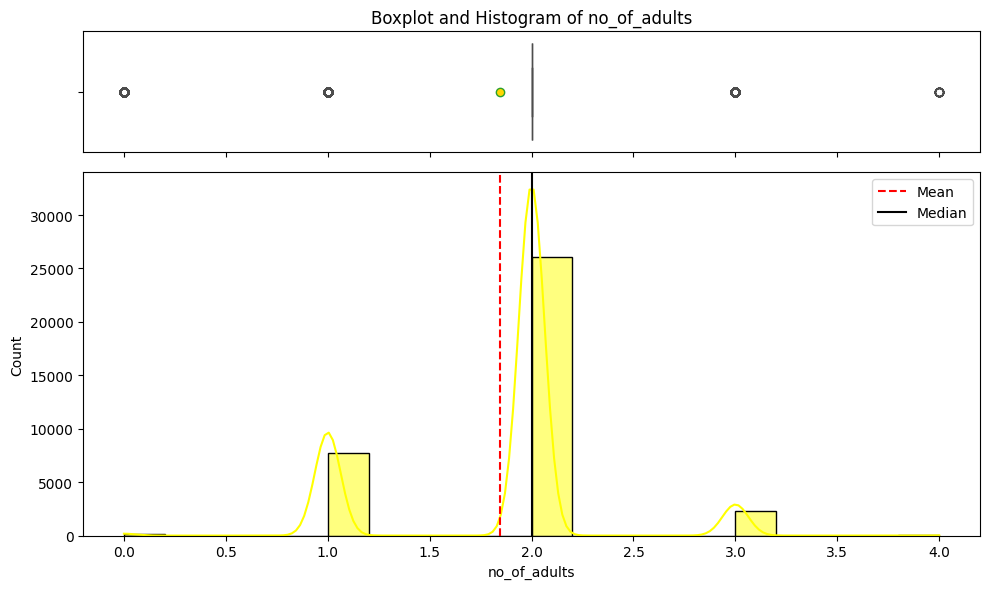

In [ ]:
custplot_box_hist(df, "no_of_adults", show_kde=True, box_color="blue", hist_color="yellow")

**Observations:**

***Histogram & Box Plot***
* Plot suggests normal distribution.
* Most bookings are for 2 adults (50th, 75th percentiles = 2.0) with nearly 25k visits.
* The minimum is 0 adults, which may suggest an incorrect or test entry and needs further investigation. Maximum 4 adult visited.
* They are couple of the outliers on the both sides of the whiskers. Upper end outliers are at 0 & 1 and upper end outliers are at 3 & 4, no adult indicating the data inconsistency while 1 adult might be actual data.




**Observations on no_of_weekend_nights.**

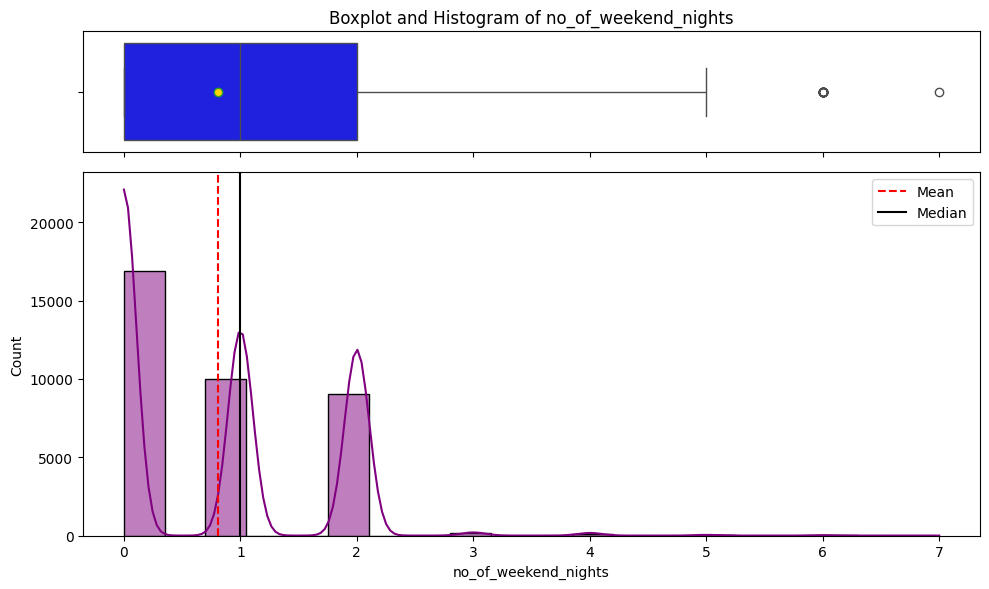

In [ ]:
custplot_box_hist(df, "no_of_weekend_nights", show_kde=True, box_color="blue", hist_color="purple")

**Observations:**

***Histogram & Box Plot***
* Histogram plot shows data is highly right skewed.
* The median is 1 night, and 75% of bookings stay up to 2 weekend nights.
* The maximum is 7, which may represent extended weekend stays or rare cases.
* Box plot shows there two outliers at the lower end of whiskers  depicts the 6 & 7 weekend nights booked or stay by guests.

**Observations on no_of_week_nights.**

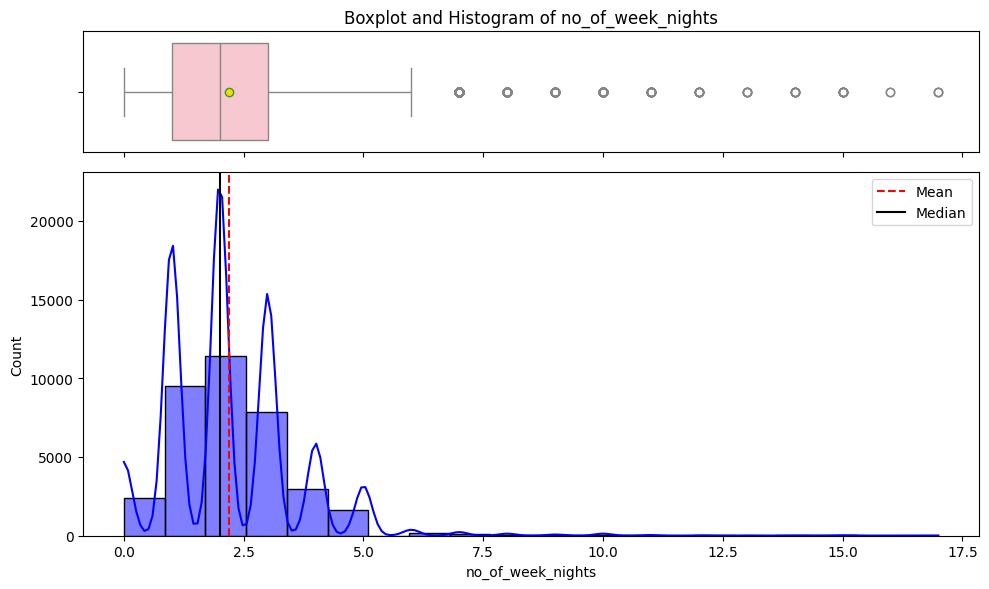

In [ ]:
custplot_box_hist(df, "no_of_week_nights", show_kde=True, box_color="pink", hist_color="blue")

**Observations:**

***Histogram & Box Plot***

* Plot reveals data is highly right skewed.
* The median is 2 nights, with most bookings covering 1 to 3 weeknights.
* There are a few long stays, with a maximum of 17.
* There are several outliers below the lower whiskers of box plot ranging from 7-17 weeknights.

**Observations on required_car_parking_space.**

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64




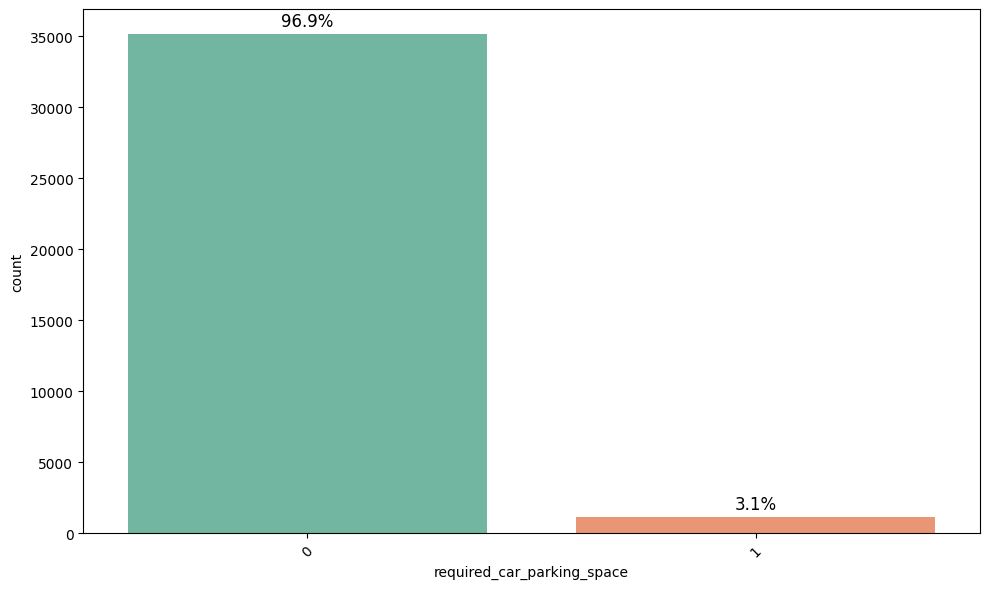

In [ ]:
cust_label_barplot(df, "required_car_parking_space", palette="Set2", show_percent=True)

**Observations:**

* Bar plot illustrates there 3.1% customers requires car parking space while majority ( 96.9%) customers do not opt for car parking.
* Total number of 35151 out of 36275 customers do not want car parking space.

------------------------------------------------------------------------------



**What are the busiest months in the hotel?**

**Observations on arrival_month.**

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64




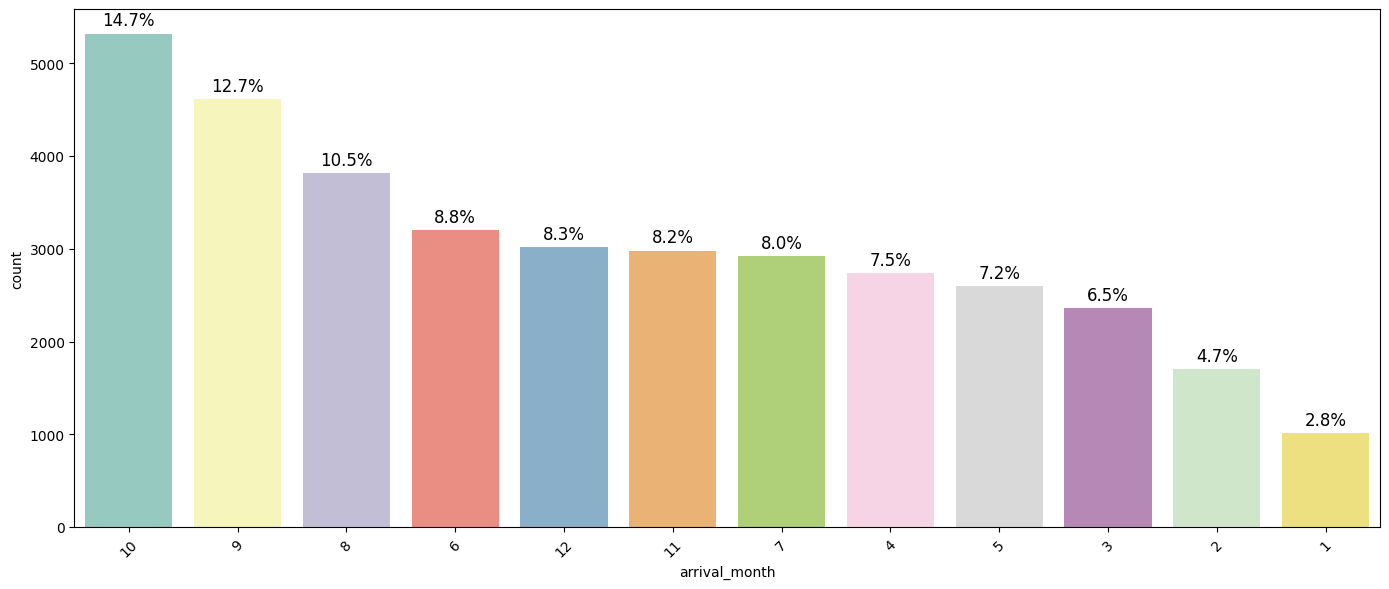

In [ ]:
cust_label_barplot(df, "arrival_month", palette="Set3", show_percent=True)

**Observations:**

* The bar plot suggest October (Month 10) is the busiest month, making up 14.7% of annual bookings with 5,317 bookings.  Likely due to ideal weather.

* September (12.7%) and August (10.5%) follow as the next highest months.

* From August to December, we see about 55% of total bookings: Aug (10.5%), Sep (12.7%), Oct (14.7%), Nov (8.2%), Dec (8.3%). likely driven by year-end holidays, including Thanksgiving, Christmas, and New Year, keep demand steady despite the start of winter. This highlights opportunities for premium festive packages.

* January to March is the slowest quarter, accounting for only 14% of bookings: Jan (2.8%), Feb (4.7%), Mar (6.5%). This could be due to harsh winter season.

* June (8.8%) performs better than July (7.2%) and is close to December (8.3%), even though it is not a traditional peak month. Customers likely take advantage of shoulder-season pricing and avoid the peak crowds in July.

* April (7.5%) and May (7.2%)show moderate demand. They exceed the winter months but fall behind the summer and fall months. Spring weather encourages travel, but demand stays below the peaks of summer and fall. This indicates that there is potential to increase demand during this shoulder season with campaigns that focus on nature, like spring blooms and hiking.







**Observations on arrival_year.**

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64




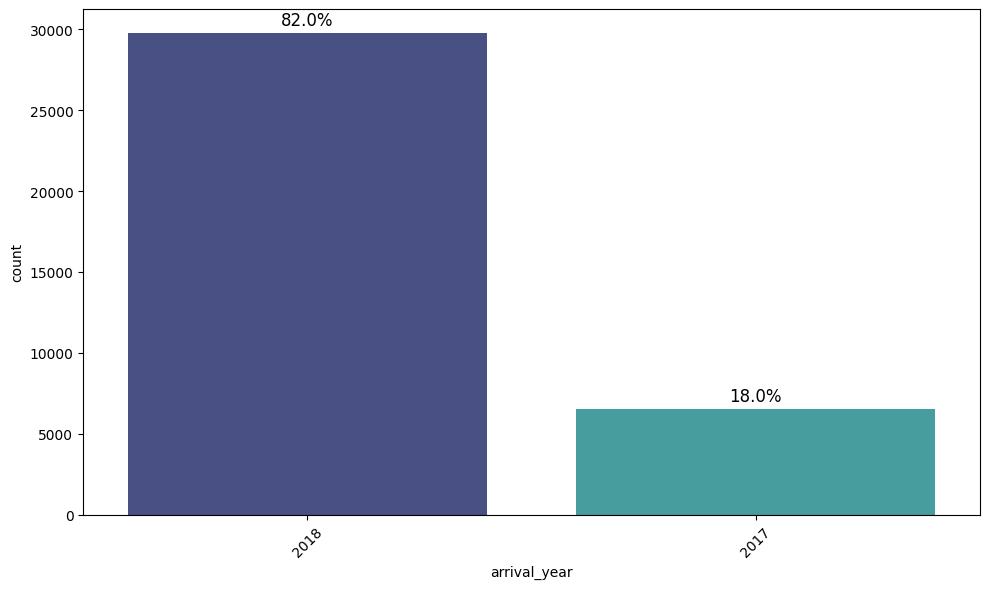

In [ ]:
cust_label_barplot(df, "arrival_year", palette="mako", show_percent=True)

**Observations:**

* The bar plot shows that extreme imbalance in customer arrival year 2017 & 2018.
* Majority of customers 82% (29761/36275) arrived in the year 2018, and only 18% (6514/36275) arrived in 2017.

* This skewed distributions is likely to stems from factors like business growth in 2018 , better marketing, etc,.

**Observations on arrival_date.**

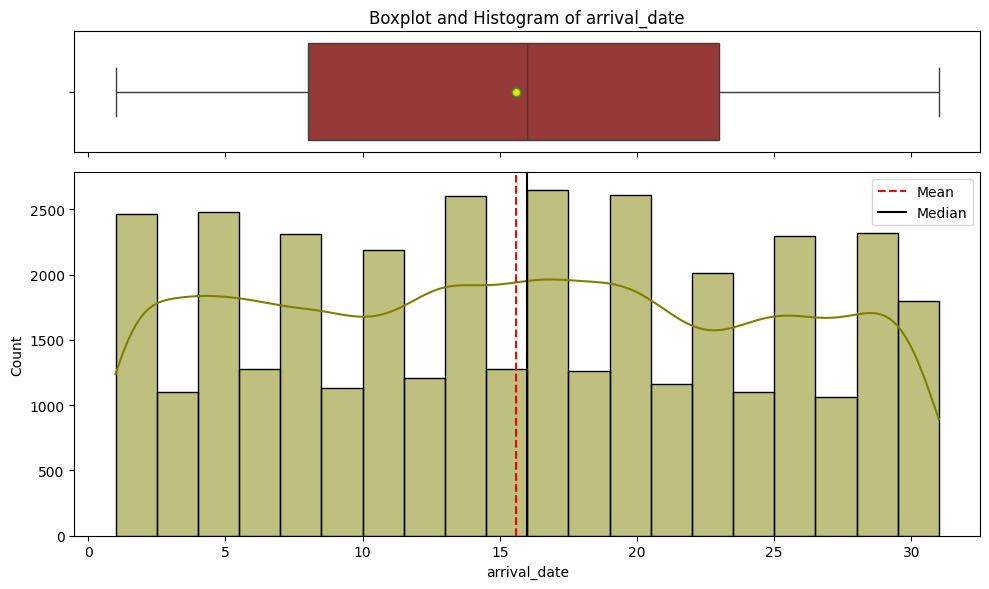

In [ ]:
custplot_box_hist(df, "arrival_date", show_kde=True, box_color="brown", hist_color="olive")


**Observations:**

* The plot shows that data has uniform distribution as arrivals dates are evenly spread across days 1 to 31, with no dominant peaks. Daily counts stay consistently between 1,000 and 1,300, suggesting bookings are not affected by specific dates, such as paydays or weekends. This indicates stable demand throughout the month.

* We observed slight mid-month dip as days 10 to 20 show slightly lower counts, around 1,000, compared to the start and end of the month, which see counts around 1,200.This means customers may avoid mid-month because of work commitments or a preference for weekends at the beginning and end of the month.

* The boxplot shows no outliers, confirming that arrival dates are evenly distributed without any anomalies.

* The central tendency (mean ≈ median ≈ 15-16) aligns with mid-month, reinforcing the absence of cyclical bias.

**Observations on type_of_meal_plan.**

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64




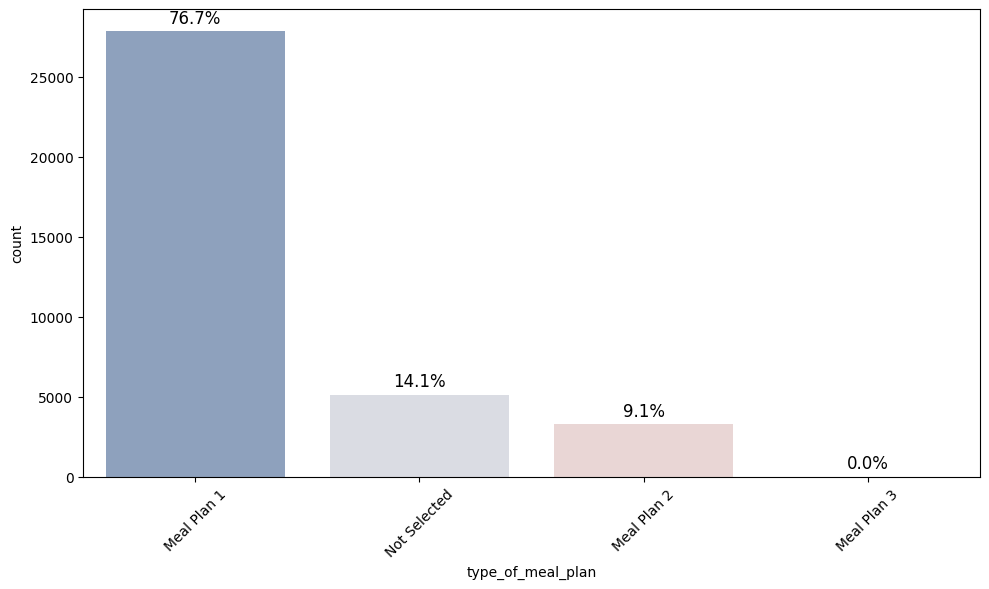

In [ ]:
cust_label_barplot(df, "type_of_meal_plan", palette="vlag", show_percent=True)

**Observations:**

* The bar plot demonstrates right skewness.
* Meal Plan 1 is most preferred  by customers (76.7%). This indicates guests strongly prefer breakfast-only plans. This choice likely stems from a desire for flexibility, like dining out later, and for saving money. It shows that guests value convenience in the mornings.

* Only 14.1% of customers do not select any meal plans. This suggest noticeable minority seems to prioritize budget management or the ability to choose their meals freely. They might prefer eating locally or want to avoid fixed costs.

* Meal Plan 2 has low appeal, with only 9.1% customers choosing it. This shows that half board meal does not attract many customers. This could mean that people want to skip restrictions for lunch or .dinner or they think it offers less value compared to dining à la carte.

* Meal Plan 3 is almost non-existent, capturing 0.01% of interest. This is suggests that full board plans are not financially feasible for most customers. This could be due to high prices, lack of flexibility, or a mismatch with guests' preferences, such as guests wanting to explore local food.


**Observations on room_type_reserved.**

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64




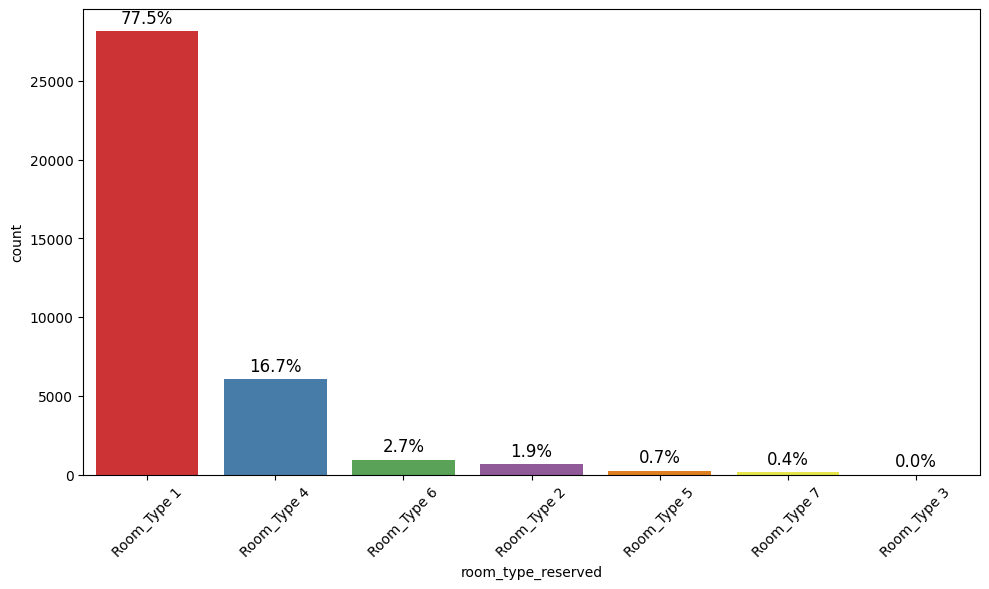

In [ ]:
cust_label_barplot(df, "room_type_reserved", palette="Set1", show_percent=True)

**Observations:**

* Room_Type 1 dominates at 77.5%. This is likely the standard or budget option. It attracts cost-conscious solo travelers or couples who want basic amenities.

* Room_Type 4 is next at 16.7%. This is probably a family or group room, such as one that accommodates four people. It shows a specific but limited demand for larger spaces.

* Other room types make up less than 4% combined.These may include specialized suites like luxury, themed, or accessible rooms. They might have limited appeal because of their higher prices or specific uses.

* Room_Type 3 is nearly zero at 0.02%. This may be an outdated or overpriced category, indicating a need for changes or even removal.

------------------------------------------------------------------------------

**Which market segment do most of the guests come from?**

**Observations on market_segment_type.**

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64




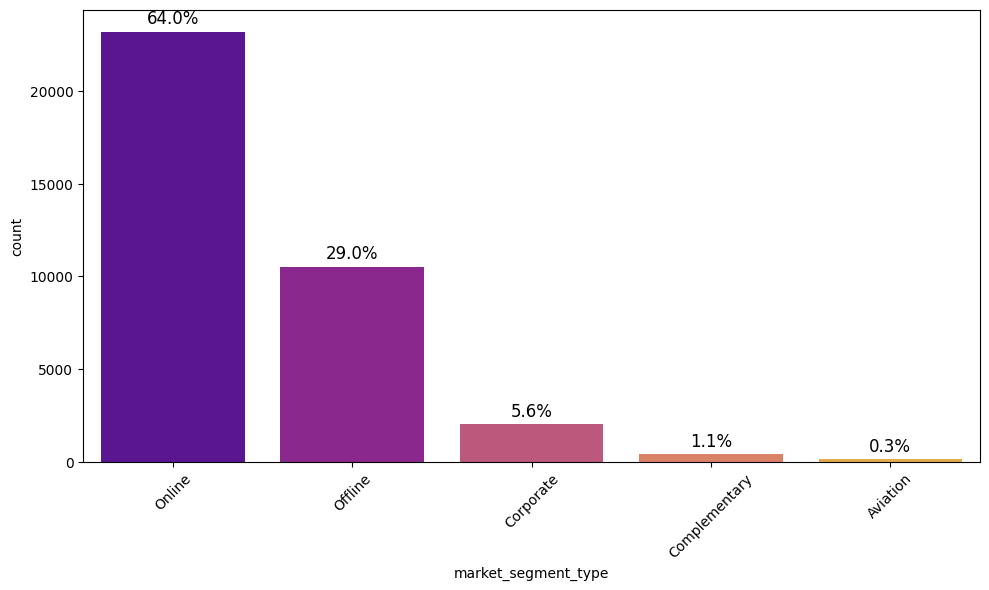

In [ ]:
cust_label_barplot(df, "market_segment_type", palette="plasma", show_percent=True)

**Observations:**


* Online booking dominates (64.0%). Digital booking platforms, such as OTAs and hotel websites, are the main sales channel. This shows that customers prefer to book online.  

* Offline booking is significant (29.0%), suggesting walk-ins and phone bookings still matter, indicating a demand for traditional service, especially for last-minute or loyalty-driven customers.  

* Corporate booking is niche (5.6%)as there might be some business travel partnerships, but they are not fully used. This presents an opportunity for growth in B2B markets.  

* Complementary (1.1%) & Aviation (0.3%) are marginal. The free stays for staff and airline crew contracts add little revenue, showing that these non-revenue segments are meant to be kept small.

------------------------------------------------------------------------------


**Repeating guests are the guests who stay in the hotel often and are important to brand equity.**

**Observations on repeated_guest.**

repeated_guest
0    35345
1      930
Name: count, dtype: int64




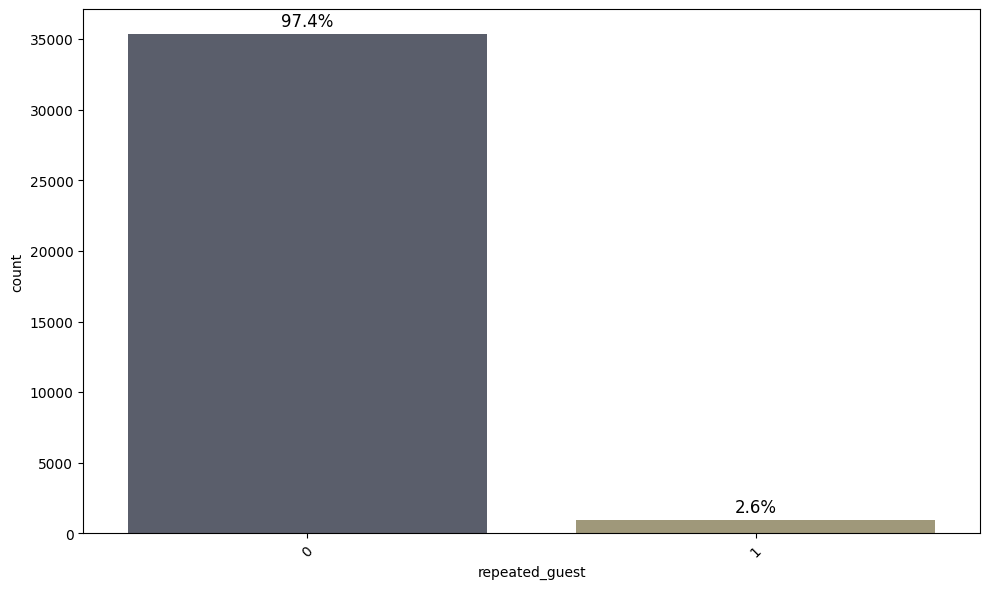

In [ ]:
cust_label_barplot(df, "repeated_guest", palette="cividis", show_percent=True)

**Observations:**

* The bar plot reveals extremely Low repeat rate (2.6%). Only 930 guests return, while 35,345 (97.4%) are one-time visitors.

* This indicates , the hotel has trouble keeping guests, likely because of weak loyalty programs, inconsistent experiences, or strong competition.


**Observations on no_of_previous_cancellations.**

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64




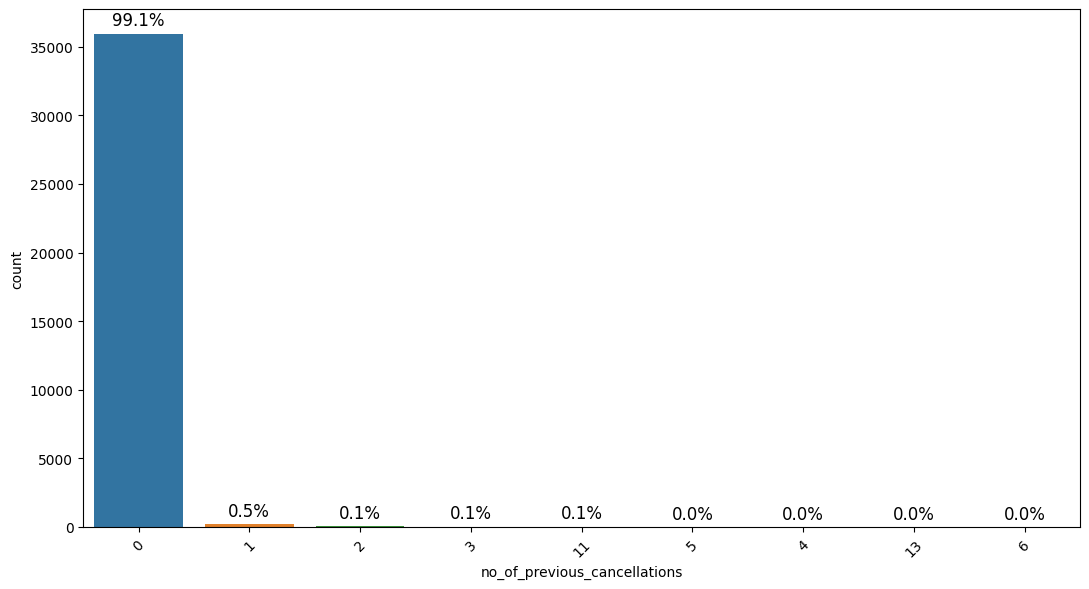

In [ ]:
cust_label_barplot(df, "no_of_previous_cancellations", palette="tab10", show_percent=True)


**Observations:**

* The plot depicts that hotel has 99.1% zero cancellations (35,937). This means the vast majority of guests are low-risk and honor their bookings. There is minimal impact on operations from cancellations.

* Only 1% (338) have 1 or more cancellations. This is a small but may be due to significant group of habitual cancellers. They pose a risk for revenue loss and create inventory issues.

* Extreme outliers (11 to 13 cancellations: 29 customers). These customers probably trying to game the system by holding multiple options or have fraudulent accounts. We need stricter policies, such as requiring prepaid bookings.

* Moderate repeat cancellers (1 to 3 times: 287 guests). This group may include unpredictable travelers, such as business travelers, or those who are dissatisfied because they found better alternatives.

**Observations on no_of_previous_bookings_not_canceled.**

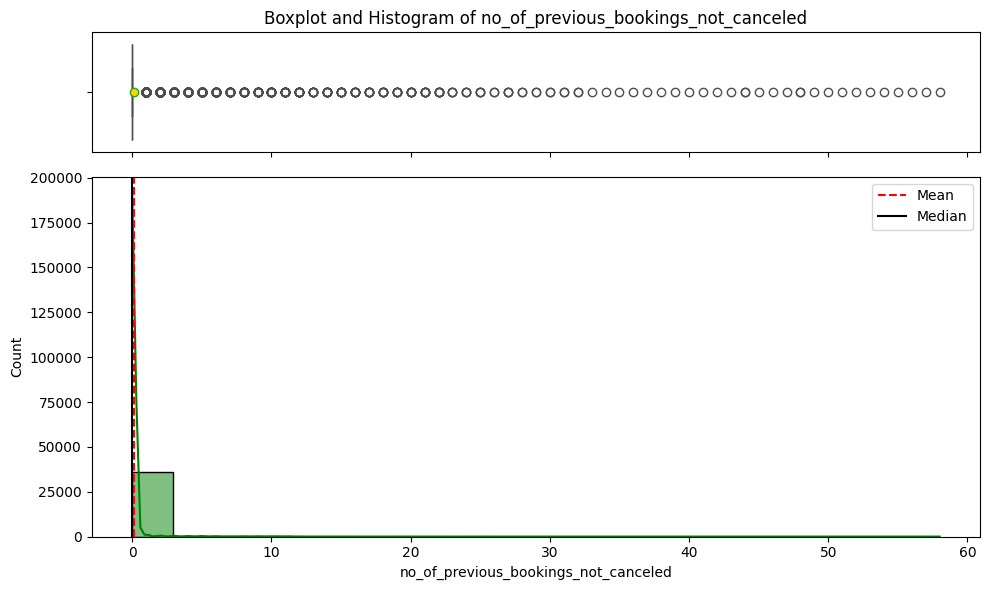

In [ ]:
custplot_box_hist(df, "no_of_previous_bookings_not_canceled", show_kde=True, box_color="orange", hist_color="green")


**Observations:**

* The data is extremely right-Skewed as Mean > Median, indicating even "frequent" guests show only modest repeat activity, indicating there is no strong loyalty base.
* More than 95+% of customers cluster near 0, with the leftmost histogram bar being the most prominent with peak of nearly 35k, indicating a few loyal or repeat customers.
* There are several outliers on the lower end whiskers. A small number of guests have 10 to over 60 uncanceled bookings, with boxplot outliers extending to 60. This is  could be due to a tiny loyal segment, likely made up of business travelers or staff, but their presence is not significant on a larger scale.

* The boxplot shows the median set at zero. For more than 50% of guests, this is their first uncanceled booking, confirming low retention.

**Observations on no_of_special_requests.**

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64




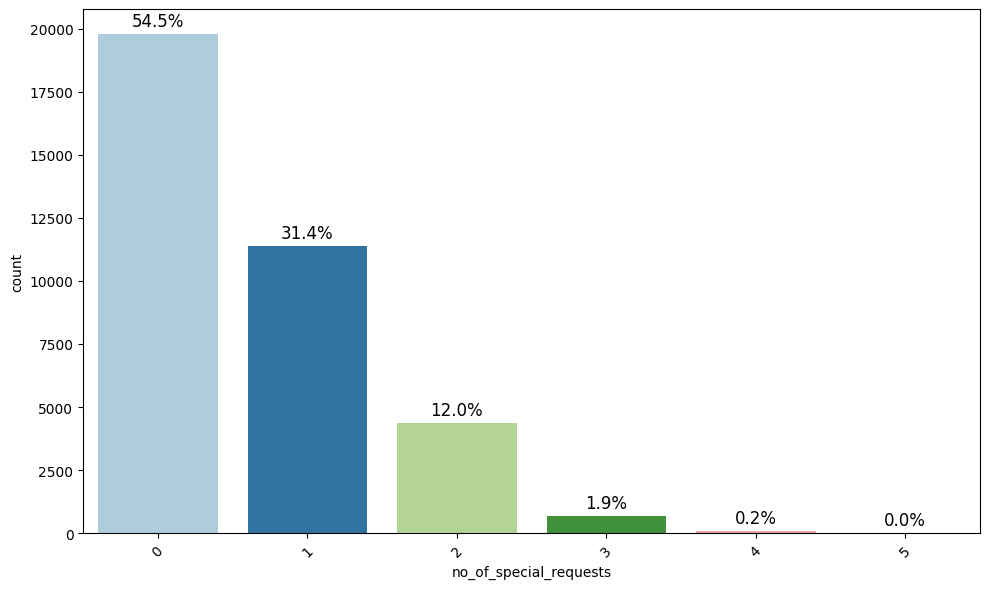

In [ ]:
cust_label_barplot(df, "no_of_special_requests", palette="Paired", show_percent=True)

**Observations:**

* Most customers - 54.5% (19,777) make 0 requests. This is might be due to the majority prioritize simplicity and convenience. They are likely business travelers or short-stay guests who avoid customization.

* Around 31.4% (11,373) customers make 1 request. This is significant group might be looking for light personalization, such as a high floor or a view. This suggests an opportunity to upsell modest amenities.

* 12%  customers (4,364) make 2 requests. This group may be experience-focused customers, like couples or families, are combining needs such as a view and a quiet room. This suggests the potential to bundle popular requests.

* Only 2.1% (761) customers make three or more requests. This small group might consists of high-maintenance guests, often luxury or long-stay customers. They may require more resources but contribute to premium revenue.

------------------------------------------------------------------------------


**What percentage of bookings are canceled?**

**Observations on booking_status.**

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64




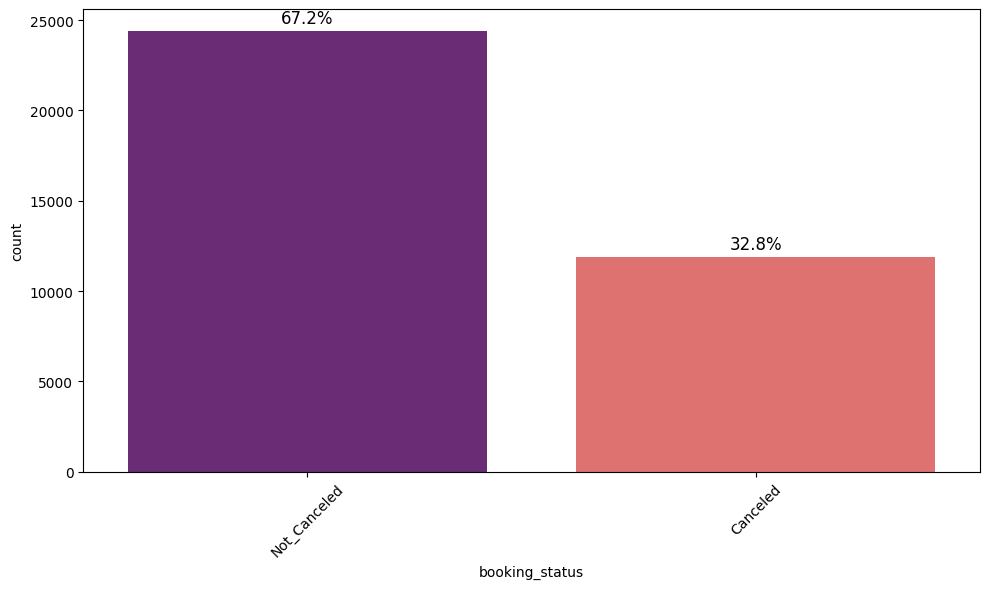

In [ ]:
cust_label_barplot(df, "booking_status", palette="magma", show_percent=True)

**Observations:**

* High Cancellation Rate as 11,885 bookings were canceled, which is 32.8% of the total. This poses a significant revenue risk from last-minute dropouts. This issue may stem from long lead times, with a median of 57 days, or flexible policies.

* Dominant Non-Cancellations are 24,390 bookings, making up 67.2%. Our core customer base is dependable, but cancellations hurt profitability. This results in empty rooms and unnecessary staff costs.

* Since  1 in 3 bookings were canceled, we may resort to overbooking to balance this. However, this strategy risks customer dissatisfaction if not handled correctly.

* This trend connects to past data on repeat cancellers, which represent 1% of guests who have had one or more prior cancellations. They likely contribute to significant losses.


## **Bivariate Analysis**

* Before going ahead with Bivariate analysis we would treat or drop few features to enhance the analysis for modeling.

In [ ]:
# drop the 'Booking ID' columns from the data set.
df = df.drop('Booking_ID', axis=1)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

* We can observed that Booking_ID is dropped from our dataset.  

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis.**

In [ ]:
# Encode booking_status: Canceled → 1, Not_Canceled → 0
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [ ]:
print(df['booking_status'].value_counts())

booking_status
0    24390
1    11885
Name: count, dtype: int64


* We can observe now our booking_status is encoded in our dataset.

**Correlation Analysis**

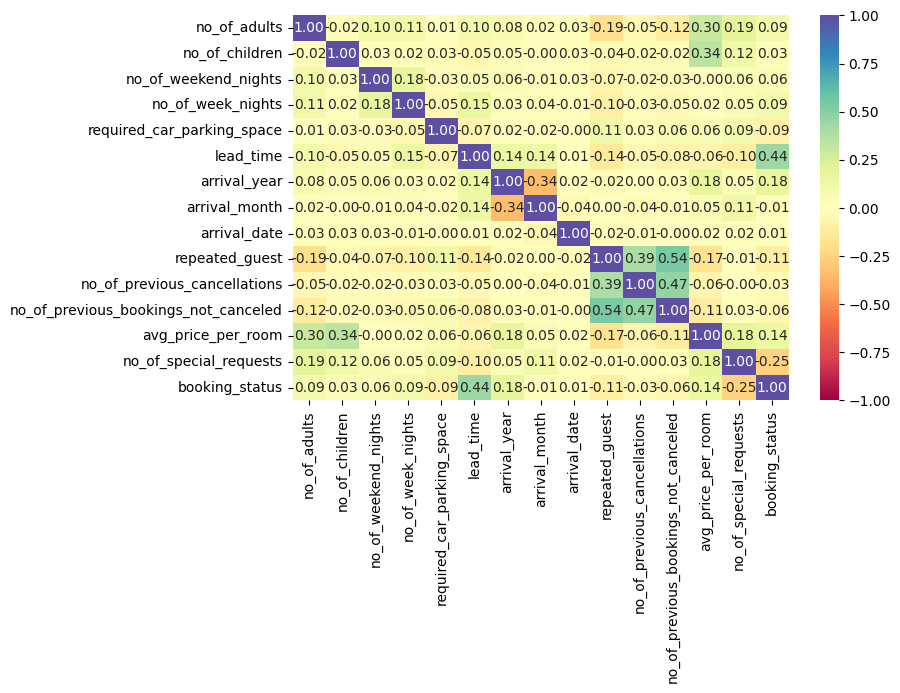

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

* ***lead_time (r = 0.44)***
  * Shows strongest positive correlation.
  * Bookings made far in advance are 44% more likely to cancel. This is likely due to changes in plans or seeking better deals.

* ***no_of_special_requests (r = -0.25)***
   * There is a significant negative correlation.
   * Guests making special requests are 25% less likely to cancel.
   * Personalized stays strengthen commitment.

* ***arrival_year (r = 0.18) & avg_price_per_room (r = 0.14)***
  * Both the feature have weak positive correlation.
  * The bookings from 2018 and higher-priced rooms slightly increase cancellation risk. This may be due to competing offers or sensitivity to price.

* ***repeated_guest (r = -0.11)***
   * There is moderate negative correlation.
   * Repeat guests are 11% less likely to cancel. Loyalty helps reduce cancellations.

* ***no_of_adults (r = -0.09) & required_car_parking (r = -0.09)***
   * They have mild negative correlations.
   * Group or family bookings (adults) and parking users are a bit more reliable. Planned logistics help lower cancellations.

* ***Low-Impact Factors (|corr| < 0.1):***
  * Children, weekend or week nights, and arrival dates show near-zero correlation, leading to no impact on cancellations.

* ***Past cancellations or booking history***
  * They show weak association (r = -0.03 to -0.06), indicating limited predictive power.

------------------------------------------------------------------------------

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

**Observations on avg_price_per_room vs market_segment_type**

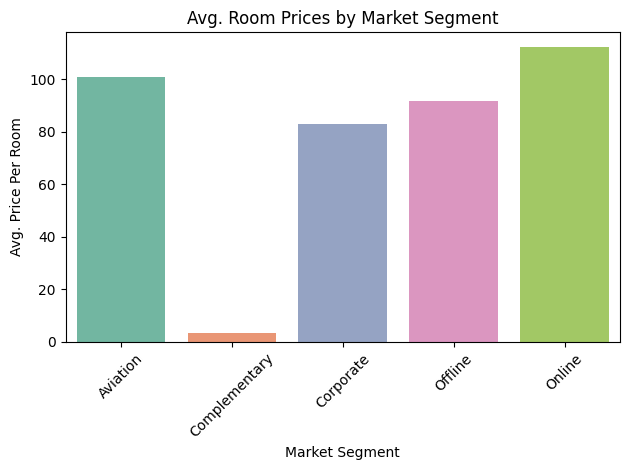

In [ ]:
# Just group by market segment
agg_df = df.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()

sns.barplot(
    data=agg_df,
    x='market_segment_type',
    y='avg_price_per_room',
    palette='Set2'
)
plt.xlabel('Market Segment')
plt.ylabel('Avg. Price Per Room')
plt.title('Avg. Room Prices by Market Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.groupby(["market_segment_type"])["avg_price_per_room"].agg(["sum","mean", "median", "min", "max"]).reset_index()

market_segment_type         sum        mean  median   min    max
0            Aviation    12588.00  100.704000    95.0  79.0  110.0
1       Complementary     1228.43    3.141765     0.0   0.0  170.0
2           Corporate   167232.98   82.911740    79.0  31.0  220.0
3             Offline   964708.84   91.632679    90.0  12.0  540.0
4              Online  2605930.63  112.256855   107.1   0.0  375.5

**Observations:**


***1. Online Dominates Revenue (69.5%)***  

**Total Average Price per room: €2,605,930.63**

Inference: Digital channels, like OTAs (Online Travel Agencies) and hotel websites, are crucial for profitability since they account for almost 70% of revenue. Guests prefer booking on their own for convenience. However, high OTA commissions can cut into profits.  

***2. Offline Contribution is Significant (25.7%)***  
**Total Average Price per room: €964,708.84**  

Inference: Walk-ins and phone bookings are still important, making up more than 25% of revenue. This group likely includes loyal customers or those booking last minute to avoid online fees.  

***3. Corporate Underperforms (4.5%)***  
**Total Average Price per room: €167,232.98**  

Inference: Even with contracts in place, corporate clients contribute very little. The low volume of bookings in 2017 and possible discounts limit revenue opportunities.  

***4. Aviation & Complementary Are Negligible (<0.4%)***  
**Total Average Price per room: €12,588.00**  

Inference: Airline crew stays are steady but not very valuable, with only 125 bookings. They help fill rooms but do not significantly add to revenue.  

***5. Complementary-Total Average Price per room: €1,228.43***  

Inference: Free stays for staff and comps are kept minimal to maintain revenue integrity.  


**Conclusion:**

* Online bookings have the highest average room prices  starting at  €112.25 per room. In contrast, corporate and offline segments get lower rates, typically 15 to 25% less.
* This shows how dynamic pricing based on demand and negotiation power affects rates.

------------------------------------------------------------------------------

**We will see how booking status varies across different market segments.**

booking_status           0      1    All
market_segment_type                     
Aviation                88     37    125
Complementary          391      0    391
Corporate             1797    220   2017
Offline               7375   3153  10528
Online               14739   8475  23214
All                  24390  11885  36275
----------------------------------------------------------------------------------------------------


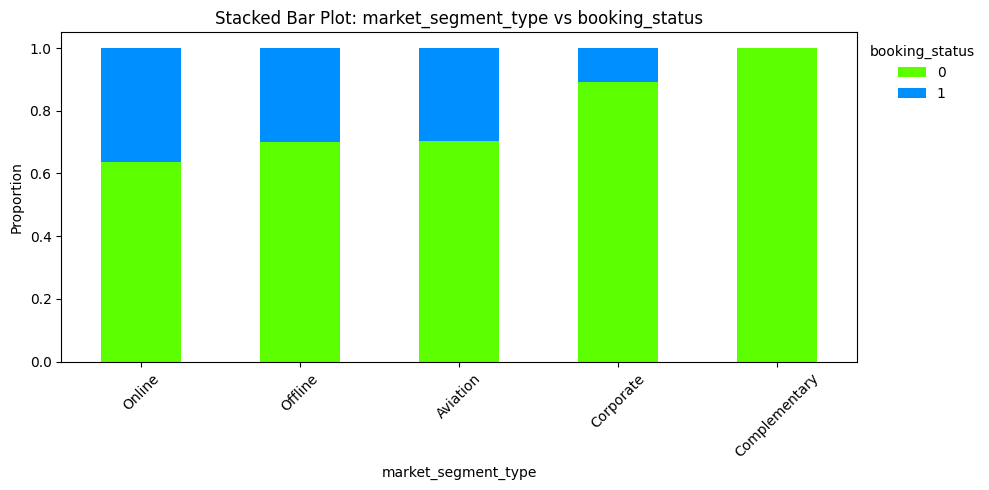

In [ ]:
stacked_barplot_custom(df, "market_segment_type", "booking_status", palette='gist_rainbow')

**Observations:**

***1. Online Bookings***
* It has highest cancellation volume with 36.5% cancellation rate (8,475 out of 23,214).  

* Inference: Many digital channel struggles with easy cancellation policies, such as free refunds on OTAs. Guests often look for cheaper options.  

***2. Offline Bookings***
* It has moderate cancellations with 30% cancellation rate (3,153 out of 10,528).  

* Inference: Walk-ins and phone bookings show steadier trends than online bookings due to direct communication, but they are still affected by changing plans.  

***3. Corporate Bookings***
* It is the most reliable with only 10.9% cancellation rate (220 out of 2,017).  

* Inference: Negotiated contracts and the inflexible nature of business travel lead to fewer cancellations, such as penalties or fixed schedules.  

***4. Aviation & Complementary***
* They have the niche stability with Aviation: 29.6% cancellations (37 out of 125)  

* Inference: Airline crew schedules change often, but the small number of bookings limits the impact.  

* Complementary: 0% cancellations (0 out of 391)  

* Inference: Non-revenue stays, like staff or comps, are always honored, so there is no financial risk.  


**Conclusion:**
* Online bookings face the highest cancellation rate at 36.5%.
* In contrast, corporate contracts have the most stable bookings, with a cancellation rate of 10.9%.
* This shows a clear trade-off between price optimization and booking reliability across different segments.

------------------------------------------------------------------------------

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations. Observations on no_of_special_requests vs booking_status.**

booking_status              0      1    All
no_of_special_requests                     
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
All                     24390  11885  36275
----------------------------------------------------------------------------------------------------


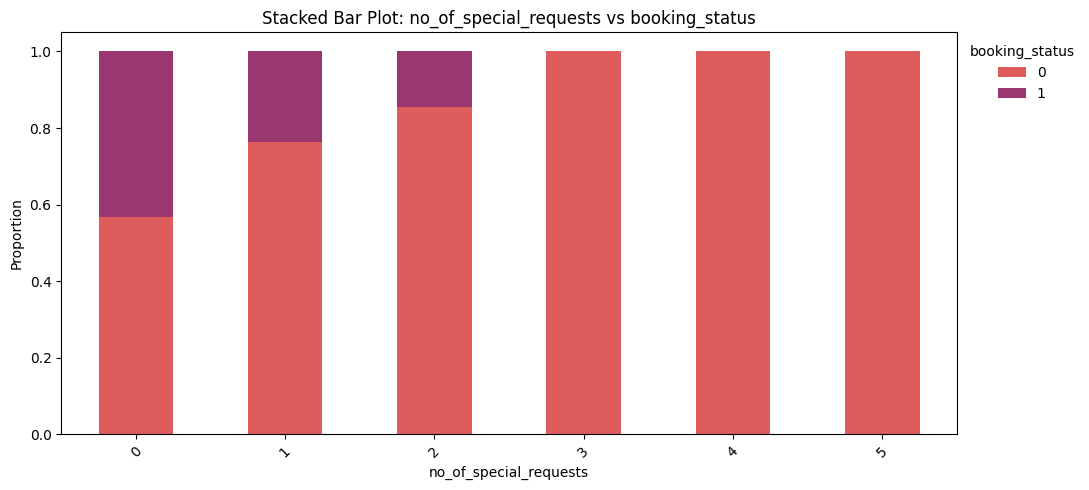

In [ ]:
stacked_barplot_custom(df, "no_of_special_requests", "booking_status", palette='flare')

**Observations:**

***0 Special Requests***

* The highest number of bookings was about 19,777.

* The cancellation rate was the highest, with around 43% canceled (8,545 / 19777).

* This group showed the most imbalance toward cancellations.

***1 Special Request***

* The cancellation rate was moderate at about 24% canceled (2,703 / 11373).

* This is better than 0 requests, but still noteworthy.

***2 Special Requests***

* There was a sharp drop in cancellations to about 15% (637 / 4,364).

* The acceptance rate improved significantly.

***3 to 5 Special Requests***

* No cancellations were observed.

* All these bookings were honored, meaning none were canceled.

* The booking counts are very low (ranging from 675 to 8), but the trend remains consistent.

**Conclusions:**

* A higher number of special requests strongly relates to lower cancellation rates.

* Guests with three or more requests never canceled in this dataset.

* This indicates that guests making special requests are more serious about their bookings.

* Hotels could use this information to prioritize and personalize service for these guests, which could help further reduce cancellations.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. We will see what percentage of repeating guests cancel? Observations on repeated_guest vs booking_status.**

booking_status      0      1    All
repeated_guest                     
0               23476  11869  35345
1                 914     16    930
All             24390  11885  36275
----------------------------------------------------------------------------------------------------


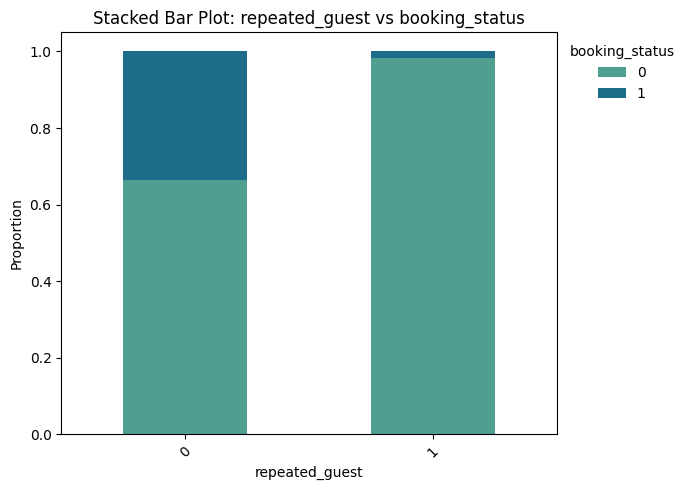

In [ ]:
stacked_barplot_custom(df, "repeated_guest", "booking_status", palette='crest')

**Observations:**

***Repeated Guests (repeated_guest = 1)***

* Total: 930 bookings

* Cancelled bookings (1): 16, about 1.7% cancellation rate

* The vast majority honored their bookings.

* Repeated guests have almost no blue section for cancellations, showing that nearly all their bookings are completed.

***Non-Repeated Guests (repeated_guest = 0)***

* Total: 35,345 bookings

* Cancelled bookings (1): 11,869, about 33.6% cancellation rate

* A significant number of non-repeated guests canceled their bookings.

* Non-repeated guests show a much higher share of cancellations compared to repeated group.


**Conclusion:**

* Repeated guests rarely cancel bookings, around 1.7%, which shows strong brand loyalty and intent to book.

* In contrast, 1 in 3 non-repeated guests cancel, indicating lower commitment or higher uncertainty.

* This confirms that repeated guests are valuable and dependable customers.

* Therefore, hotels should prioritize and reward them through loyalty programs or perks.




**Observations on no_of_special_requests vs avg_price_per_room to check if the special requests made by the customers impacts the prices of a room.**

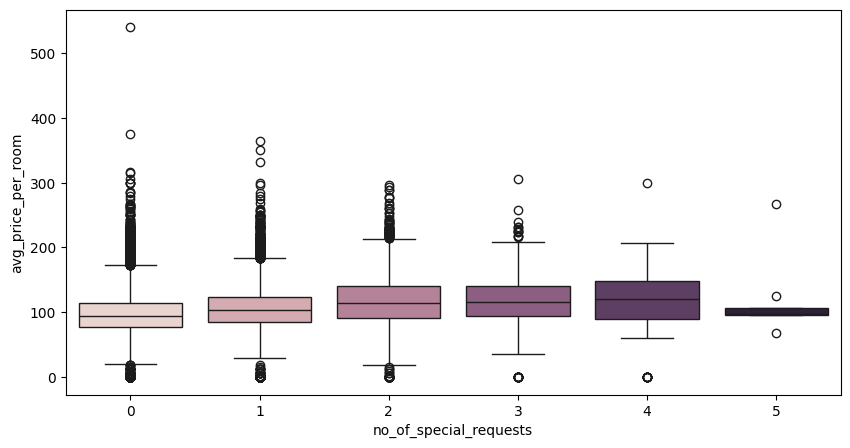

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x = 'no_of_special_requests', y = 'avg_price_per_room', hue = 'no_of_special_requests', legend= False)
plt.show()

**Observations:**

* The box plot shows the median average price per room increases as the number of special requests rises from 0 to 4. This suggests that guests who make more requests generally spend more on average.

* With 0 or 1 requests, the median is lower (around 90 to 103), showing a wider spread and more variability.

* For 2 to 4 requests, the medians are higher (approximately 115 to 120), and the interquartile ranges are slightly narrower, though there is still some variability.

* With 5 requests, the data is flat, indicating very few observations with little to no variation (median is about 100).

* Outliers are present in all categories, showing some high-priced bookings regardless of the request count.

**Conclusion:**

* There is a positive correlation (r = 0.18) between the number of special requests and room price up to 4 requests. This suggests that guests who spend more may be more likely to ask for additional services or personalized touches.

* Very few guests make 5 requests, and they typically pay around the average, not higher than others.

* Hotels can conclude that customers who pay more expect additional service customizations, which can help in designing services or premium offerings.



**We will do observations on avg_price_per_room vs booking_status as there is positive correlation between them.**

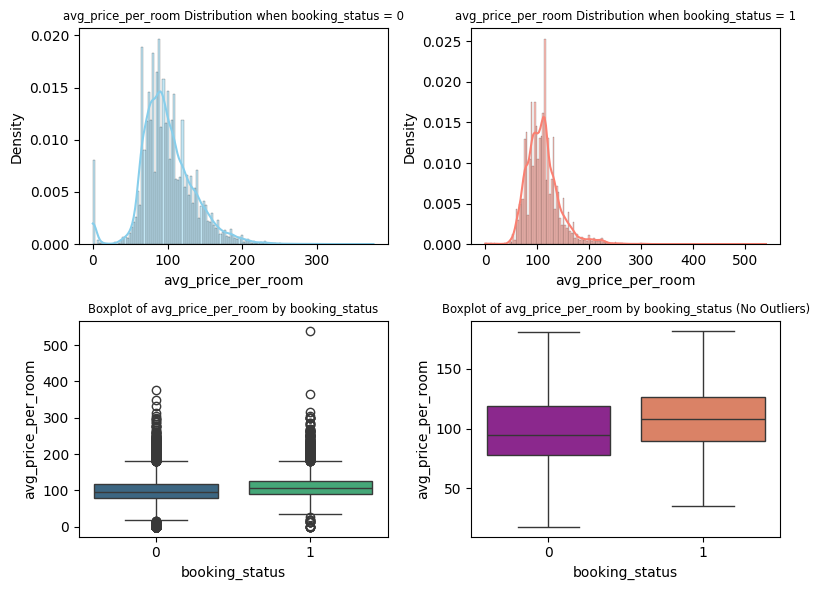

In [ ]:
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

**Observastions:**

* Plot shows data is right skewed.
* Both canceled (1) and not canceled(0) have almost similar average room prices.
* This indicates there is not much impact of average room prices on booking status.
* Presence of outliers in booking status suggests high prices rooms
* Thus, we can say that customers might have been cancelling the booking based on other factors as well.

**We will do observations on lead_time and booking_status as there is a positive correlation between booking status and lead time also.**

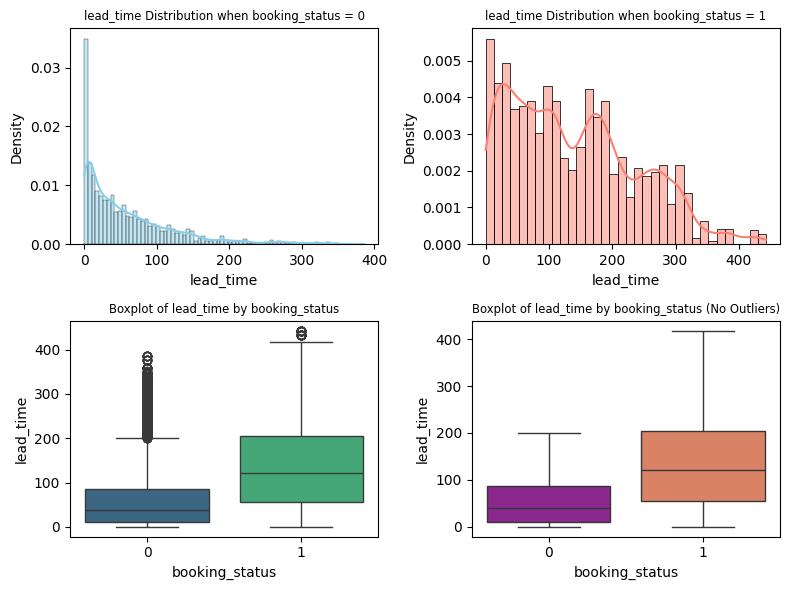

In [ ]:
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

**Observations:**

* Plots reveals data is highly right skewed.
* The lead time is less for the bookings which are not canceled.
* Hence we can say as the lead time  increases, the chances of bookings getting canceled increases.


**Checking impact of no_of_week_nights w.r.t to booking_status.**

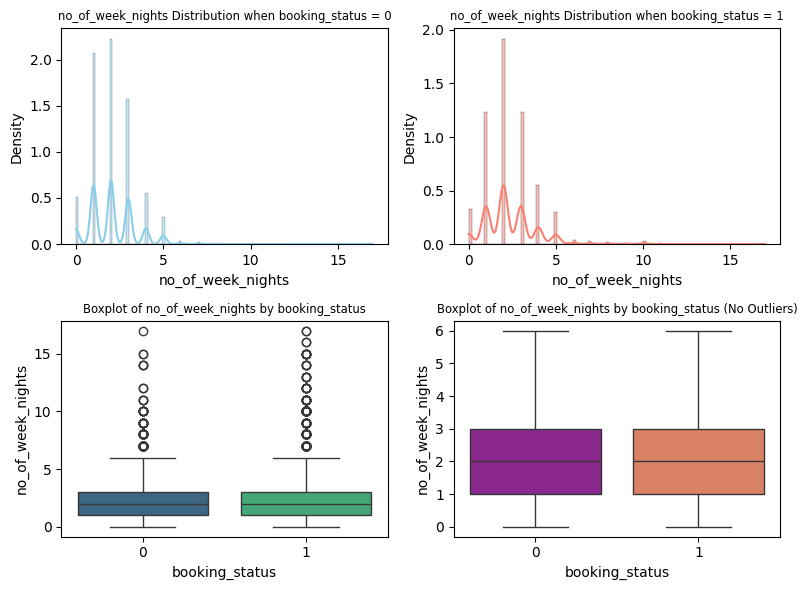

In [ ]:
distribution_plot_wrt_target(df, 'no_of_week_nights', 'booking_status')

**Observations:**

***Density Plots***  
* Both canceled bookings (booking_status = 0) and not canceled bookings (booking_status = 1) have similar distribution shapes.  
* Most stays last between 1 and 3 week nights.  
* Both distributions are right-skewed, with a few longer stays reaching up to about 15 nights.  

***Boxplots***  
* The boxplots, with and without outliers, show:  
* The median stay for both groups is around 2 nights.  
* The interquartile range (IQR) is very similar for both groups.  
* There are outliers (longer stays) in both groups, but they are more visible in the canceled group.  

**Conclusion:**  
* The number of week nights stayed does not significantly affect whether a booking was canceled (booking_status = 0) or not canceled (booking_status = 1).  
* While there are slightly more longer stays in the canceled group, the difference is not significant.  
* Overall, the duration of week nights alone is not a strong indicator of booking status.  

**We will see how no_of_weekend_nights impacts booking_status.**

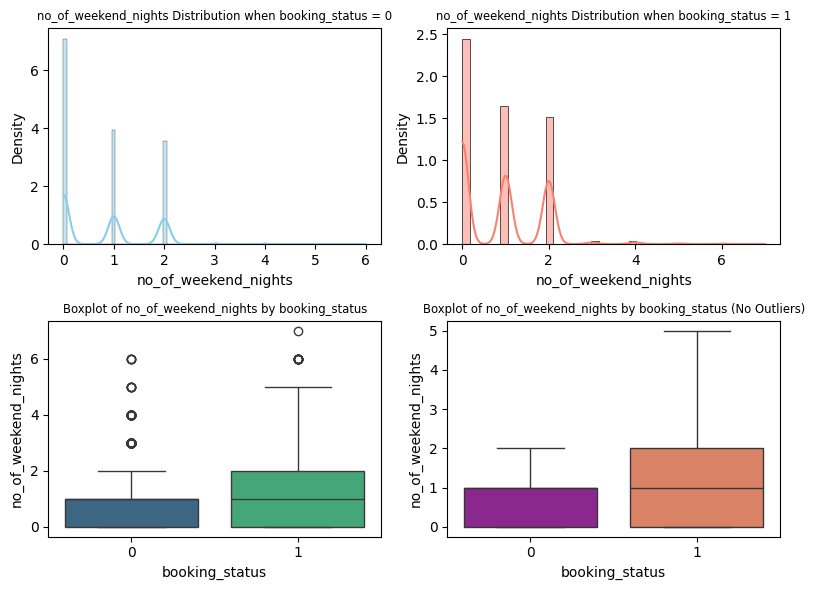

In [ ]:
distribution_plot_wrt_target(df, 'no_of_weekend_nights', 'booking_status')

**Observations:**

***Density Plots***  
* Canceled bookings (1): Show higher density at 0 and 1 weekend night. Most canceled bookings are short weekend stays.  

* Not Canceled bookings (0): Have a wider spread with noticeable density at 2 weekend nights and beyond. This indicates longer weekend stays.  

***Boxplots***  
* The median number of weekend nights is higher for not canceled bookings (0).  

* Canceled bookings (1) are more concentrated around 0 to 1 nights. Not canceled bookings show a wider spread, even after removing outliers.  

**Conclusion:**  

* Customers who book for longer weekend stays are less likely to cancel.  

* Short weekend stays are linked to a higher chance of cancellation.

* Thus, no_of_weekend_nights shows stronger and more distinguishable impact on booking status then no_of_week_nights.


**We will do distribution analysis of arrival_year w.r.t booking_status as they have positive correlation.**

booking_status      0      1    All
arrival_year                       
2017             5553    961   6514
2018            18837  10924  29761
All             24390  11885  36275
----------------------------------------------------------------------------------------------------


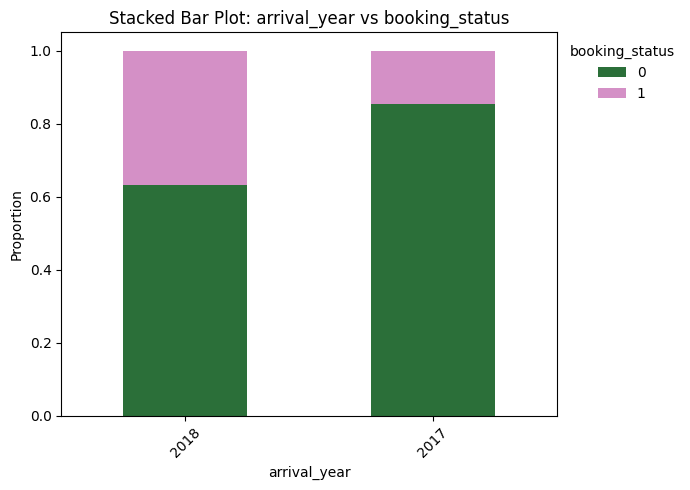

In [ ]:
stacked_barplot_custom(df, "arrival_year", "booking_status", palette='cubehelix')

**Observations:**

* Cancellations more than doubled from 2017 to 2018, going from 14.75% to 36.70%.
* This is likely due to the rapid business expansion in 2018 to attracted price-sensitive customers who often look for better deals.

* In 2018, there were 4.5 times more bookings, at 29,761 compared to 6,514. However, there were 11.4 times more cancellations, with 10,924 cancellations compared to 961.

* This suggests growing operations without solving the reasons for cancellations, such as long lead times, increased the risk to revenue.

***Root Cause Drivers***

* Longer Lead Times: Bookings in 2018 had a higher median lead time of 85 days compared to about 70 days in 2017.

* OTA(Online Travel Agent) Dominance: 82% of 2018 bookings came from online channels, which had a 36.5% cancellation rate.

* New Guest Focus: 97% of the guests were first-time visitors, which means low loyalty and a higher risk of cancellations.

**Conclusion:**

* Cancellation rates increased from 14.75% in 2017 to 36.70% in 2018, indicating severe booking instability during hotel business expansion.





**Analysis of room_type_reserved vs booking status.**

booking_status          0      1    All
room_type_reserved                     
Room_Type 1         19058   9072  28130
Room_Type 2           464    228    692
Room_Type 3             5      2      7
Room_Type 4          3988   2069   6057
Room_Type 5           193     72    265
Room_Type 6           560    406    966
Room_Type 7           122     36    158
All                 24390  11885  36275
----------------------------------------------------------------------------------------------------


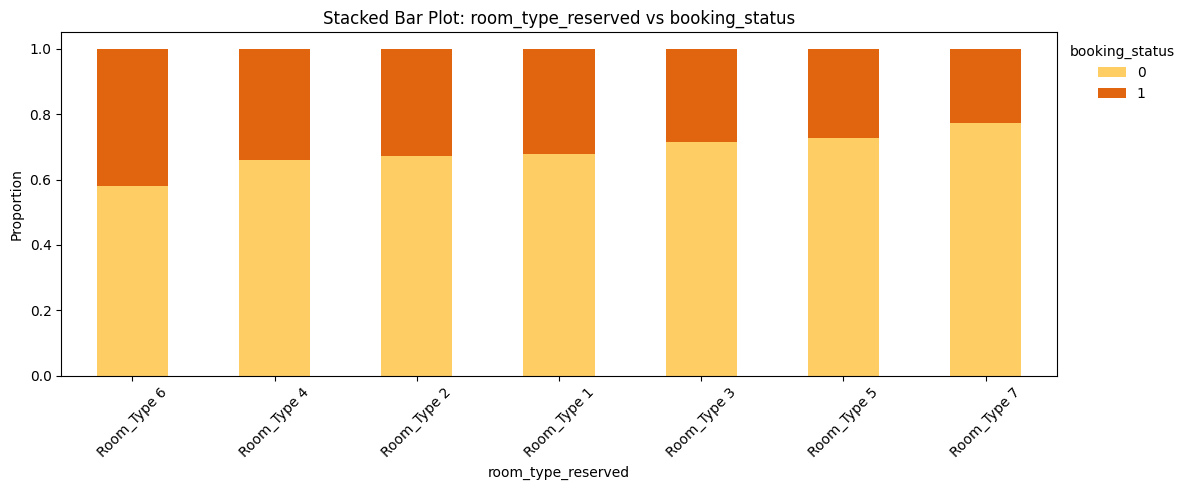

In [ ]:
stacked_barplot_custom(df, "room_type_reserved", "booking_status", palette='YlOrBr')

**Observations:**

***Room_Type 1***

* Most booked room: 28,130 bookings (77.6%)

* Cancellation rate: 32.2% (9,072 out of 28,130)

***Room_Type 4***

* Second most booked: 6,057 bookings (16.7%)

* Higher cancellation rate: 34.2% (2,069 out of 6,057)

***Room_Type 6***

* Cancellation rate is relatively high at 42.0% (406 out of 966)

***Room_Type 3 & 7***

* Very low booking volume, but Room_Type 3 has 28.6% cancellations (2 of 7)

* Room_Type 7 shows 22.8% cancellations (36 of 158)

***Room_Type 5***

* 265 bookings, with 27.2% canceled

***Overall cancellation rate***

11,885 out of 36,275 bookings canceled(~32.8%).

**Conclusion:**
* Room type seems to affect cancellation behavior.

* This is likely because different room types serve different customer groups, each with varying sensitivity to price, expectations, or reasons for staying (e.g., business vs leisure).

* For example, Room_Type 6 has a higher cancellation rate, which may reflect a mismatch between customer expectations and what is offered, or prices that lead to frequent cancellations.

* Thus, room type plays an important role in customer choices and booking reliability, and should be examined for pricing and quality improvement.

A**nalysis of required_car_parking_space vs booking_status.**

booking_status                  0      1    All
required_car_parking_space                     
0                           23380  11771  35151
1                            1010    114   1124
All                         24390  11885  36275
----------------------------------------------------------------------------------------------------


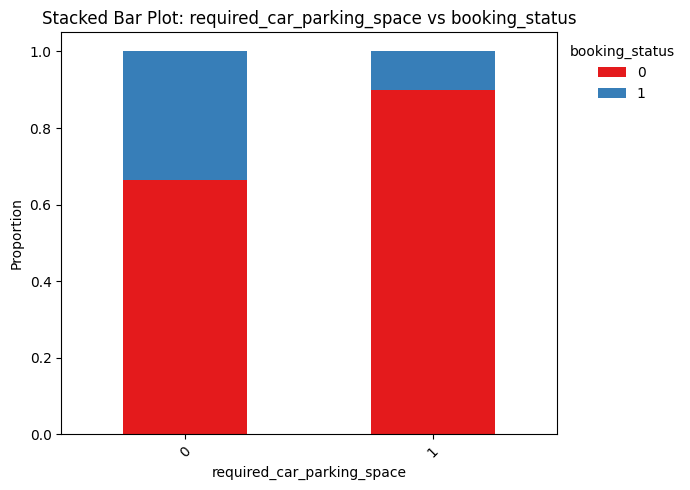

In [ ]:
stacked_barplot_custom(df, "required_car_parking_space", "booking_status", palette='Set1')

**Observations:**

***Customers who did not require car parking (value = 0)***

* Total bookings: 35,151 (97%)

* Canceled: 11,771; cancellation rate ≈ 33.5%

***Customers who did require car parking (value = 1)***

* Total bookings: 1,124 (3%)

* Canceled: 114; cancellation rate ≈ 10.1%

***Overall cancellation rate***

* 11,885 out of 36,275 ≈ 32.8%

**Conclusion:**

* Customers who choose a car parking space show different cancellation behavior.

* Customers who request parking are much less likely to cancel (about 10%) compared to those who do not (about 33.5%).

* This suggests that customers who want parking are more certain or committed about their stay. They likely include local travelers or business travelers who plan their trips with more confidence.

##**Multivariate Analysis**

**We will now check the customers who traveled with their families and children to analyze the impact on booking status.**

booking_status       0     1    All
adults_children                    
2A_0C            15506  8213  23719
2A_10C               1     0      1
2A_1C              991   511   1502
2A_2C              482   389    871
2A_3C                9     5     14
2A_9C                0     1      1
3A_0C             1434   857   2291
3A_1C               19     6     25
3A_2C                1     0      1
4A_0C               13     3     16
All              18456  9985  28441
----------------------------------------------------------------------------------------------------


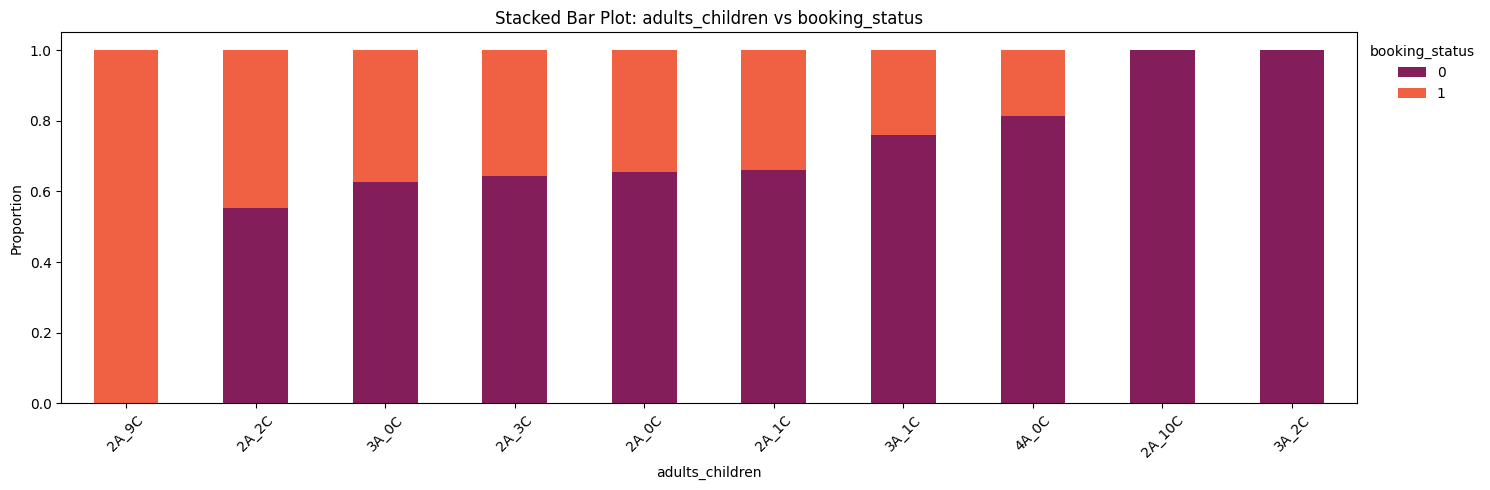

In [ ]:
# Create a new column combining adults & children
df1 = df.copy()
family = df1[(df1["no_of_children"] >= 0) & (df1["no_of_adults"] > 1)]
family['adults_children'] = family['no_of_adults'].astype(str) + 'A_' + family['no_of_children'].astype(str) + 'C'

# Plot
stacked_barplot_custom(family, "adults_children", "booking_status", palette='rocket')



**Observations:**

***Most Common Booking Type***

* The largest group is 2 Adults, 0 Children (2A_0C) with 23,719 bookings.

* Around 65% of these were not canceled (booking_status = 0), while about 35% were canceled.

***Families with Children (2A_1C, 2A_2C, 2A_3C)***

* 2A_1C: 1,502 bookings, about 66% not canceled.

* 2A_2C: 871 bookings, around 55% not canceled.

* 2A_3C: 14 bookings, 64% not canceled.

* As the number of children increases, the cancellation rate tends to go up, especially with more than one child.

***Families with Children ( >=9 )***

* This group is rare and has very few bookings (e.g., 2A_9C, 2A_10C) with one or zero records, making it not useful for analysis.

***3 Adults with Children (3A_1C, 3A_2C)***

* These have very low booking numbers. 3A_1C has only 25 records.

***Families with No Children (e.g., 3A_0C, 4A_0C)***

* These show higher stability in bookings. For example, 3A_0C has about 63% not canceled, similar to 2A_0C.

**Conclusion:**

* Family size of 2 to 3, typically adult couples or couples with one child, shows the lowest cancellation rates.

* Family size of 4, usually consisting of 2 adults and 2 children, is more likely to cancel. This indicates possible logistical or cost concerns for larger families.

* Larger groups of 5 or more are too rare in the data for reliable analysis on booking cancellation.




**We will observe if arrival year & arrival month have impact on average price per room.**

arrival_year  arrival_month        2017        2018
0                         1    0.000000   74.749763
1                         2    0.000000   80.733644
2                         3    0.000000   91.883698
3                         4    0.000000  101.998801
4                         5    0.000000  113.810677
5                         6    0.000000  111.966500
6                         7   84.890468  115.448092
7                         8   91.091400  121.214759
8                         9  103.335185  122.905831
9                        10   92.032002  111.445723
10                       11   72.339104   96.539721
11                       12   75.430463   94.947482




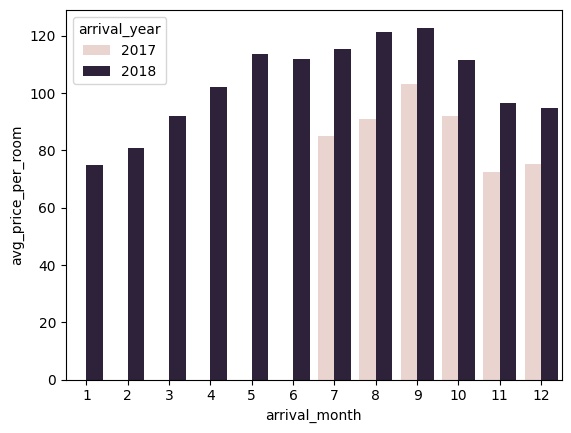

In [ ]:
# Group by month and year and calculate average price
grouped = df.groupby(['arrival_month', 'arrival_year'])['avg_price_per_room'].mean().reset_index()

# Pivot to make arrival_year as columns
pivot_table = grouped.pivot(index='arrival_month', columns='arrival_year', values='avg_price_per_room')

# Fill missing values with 0
pivot_table_filled = pivot_table.fillna(0)

# Optional: reset index if you want it back as a DataFrame
pivot_table_filled = pivot_table_filled.reset_index()

print(pivot_table_filled)
print("\n")

sns.barplot(data=grouped, x='arrival_month', y='avg_price_per_room', hue='arrival_year');


**Observations:**

* In 2017, booking data is only available from July to December. During these months, the average price per room ranged from about €72 to €103. The highest price occurred in September at €103.3, while November had the lowest price at €72.3.

* In 2018, booking data is available for all 12 months. Prices rose steadily over the months, starting at €74.7 in January and reaching a peak of €122.9 in September. The second-highest prices were in August at €121.2 and in May at €113.8.

* For the overlapping months from July to December, prices in 2018 were much higher than in 2017. The difference was between €15 and €29 more per room.

**Conclusion:**

* There is a clear trend of rising average room prices from 2017 to 2018, particularly during peak months like August and September.
* Both the month of arrival and the year have a strong impact on room pricing, indicating that room rates are higher during busy months and have likely increased in 2018.
* This might be due to seasonal demand, inflation, or changes in pricing strategy by the hotel management.


**Observations on type_of_meal_plan , avg_price_per_room w.r.t booking status to analyse if room pricing,  type of meal impacts booking status.**

Average Room Price by Meal Plan and Booking Status:

 booking_status     Not_Canceled_avg_price  Canceled_avg_price
type_of_meal_plan                                            
Meal Plan 1                     99.984480          111.558053
Meal Plan 2                    108.845386          123.023792
Meal Plan 3                      0.000000          206.000000
Not Selected                    95.077700           94.567145




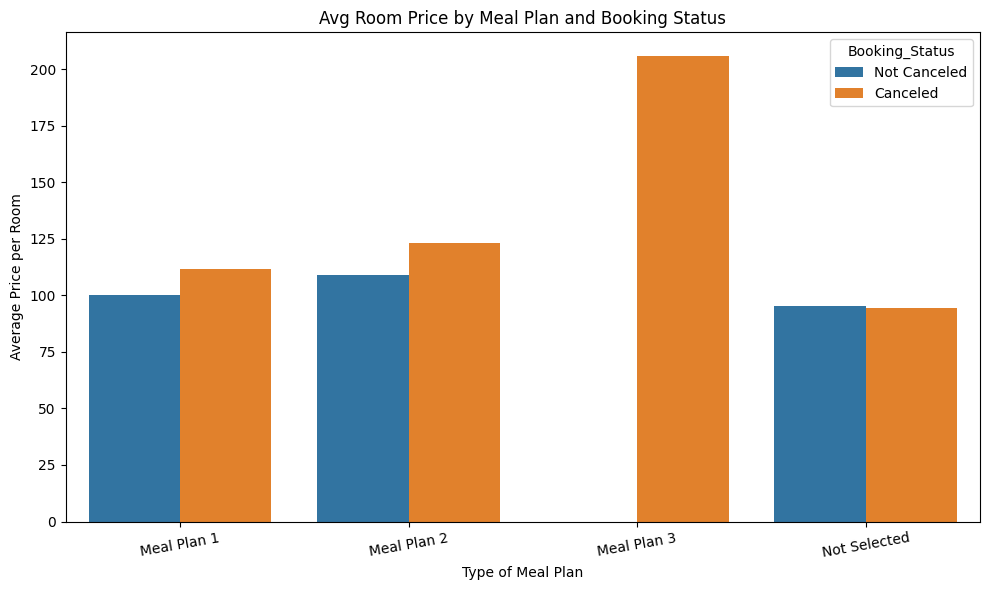

In [ ]:
# Create pivot table without changing the original DataFrame
pivot_meal = df.pivot_table(
    values='avg_price_per_room',
    index='type_of_meal_plan',
    columns='booking_status',
    aggfunc='mean'
).rename(columns={0: 'Not_Canceled_avg_price', 1: 'Canceled_avg_price'})

# Print the pivot table
print("Average Room Price by Meal Plan and Booking Status:")
print("\n",pivot_meal)
print("\n")

# Melt the pivot
melted_meal = pivot_meal.reset_index().melt(
    id_vars='type_of_meal_plan',
    value_vars=['Not_Canceled_avg_price', 'Canceled_avg_price'],
    var_name='Booking_Status',
    value_name='avg_price_per_room'
)

# Clean labels
melted_meal['Booking_Status'] = melted_meal['Booking_Status'].map({
    'Not_Canceled_avg_price': 'Not Canceled',
    'Canceled_avg_price': 'Canceled'
})


# Plot

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_meal, x='type_of_meal_plan', y='avg_price_per_room', hue='Booking_Status')
plt.title('Avg Room Price by Meal Plan and Booking Status')
plt.ylabel('Average Price per Room')
plt.xlabel('Type of Meal Plan')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

**Observations:**

**1. Meal Plan 2** has the highest average room price for both canceled bookings (123.02 Euros) and not canceled bookings (108.84 Euros). This suggests it's a premium plan.  
**2. Meal Plan 1** is slightly cheaper, with prices of 99.98 Euros for not canceled and 111.56 Euros for canceled bookings. However, it has a high cancellation rate at a moderately high price.  
**3. Meal Plan 3** has no bookings that were not canceled, showing an average of 0 Euros. The canceled bookings average 206 Euros, which is the highest overall. This indicates customers may cancel when prices are extremely high and the benefits of this plan are not clear.  
**4. Not Selected plans** show the lowest variation between canceled (94.56 Euros) and not canceled (95.07 Euros) bookings. This suggests stable pricing but possibly lower perceived value or fewer benefits.  

**Conclusion:**
* The type of meal plan and the average price per room do affect booking status.
* Higher prices are linked to a greater likelihood of cancellation, especially for premium plans or those with unclear value.
* Travelers may choose lower-cost or more familiar meal plans to reduce risk and boost their booking confidence.  


**Observations on no_of_previous_cancellations, no_of_previous_bookings_not_canceled vs booking_status.**


Pivot Table: Average Previous Booking Behavior by Booking Status:

                no_of_previous_bookings_not_canceled  \
booking_status                                         
Not_Canceled                                0.227101   
Canceled                                    0.002188   

                no_of_previous_cancellations  
booking_status                                
Not_Canceled                        0.032021  
Canceled                            0.005553  


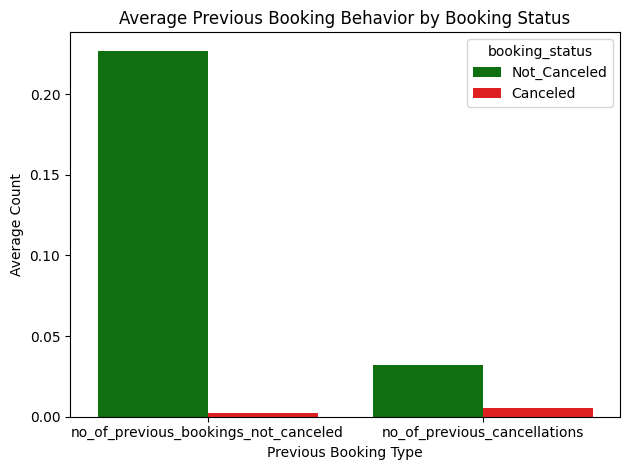

In [ ]:
# Create pivot table
pivot = df.pivot_table(
    values=['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'],
    index='booking_status',
    aggfunc='mean'
).rename(index={0: 'Not_Canceled', 1: 'Canceled'})

# Print the pivot table
print("\nPivot Table: Average Previous Booking Behavior by Booking Status:\n")
print(pivot)
#print("\n")

# Plotting the pivot table
pivot.reset_index(inplace=True)
pivot_melted = pivot.melt(id_vars='booking_status',
                          var_name='Previous_Booking_Type',
                          value_name='Average_Count')

# Plot
sns.barplot(data=pivot_melted,
            x='Previous_Booking_Type',
            y='Average_Count',
            hue='booking_status',
            palette={'Canceled': 'red', 'Not_Canceled': 'green'})

plt.title('Average Previous Booking Behavior by Booking Status')
plt.xlabel('Previous Booking Type')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations:**

***Customers who did not cancel their bookings (Not_Canceled) had:***

* An average of about 0.23 previous bookings not canceled.

* An average of about 0.03 previous cancellations.

***Customers who canceled their bookings (Canceled) had:***

* An average of about 0.002 previous bookings not canceled.

* An average of about 0.006 previous cancellations.

**Conclusion:**
* Customers’ past booking behavior clearly affects their cancellation behavior.

* Those with a history of successful bookings are more likely to complete their current booking.

* On the other hand, customers with very few or no prior successful bookings and a slightly higher cancellation rate tend to cancel again.


##**Answering Key Questions**

###**Q1. What are the busiest months in the hotel?**

* [See the observations on arrival_month](#scrollTo=OgTlRZmn-xU_&line=1&uniqifier=1)
* The plot suggest **October (Month 10) is the busiest month**, making up 14.7% of annual bookings with 5,317 bookings. Likely due to ideal weather.

* **September (12.7%) and August (10.5%) follow as the next busiest months**.

* From **August to December, we see about 55% of total bookings: Aug (10.5%), Sep (12.7%), Oct (14.7%), Nov (8.2%), Dec (8.3%)**. likely driven by year-end holidays, including Thanksgiving, Christmas, and New Year, keep demand steady despite the start of winter. This highlights opportunities for premium festive packages.

* **January to March is the slowest quarter, accounting for only 14% of bookings**: Jan (2.8%), Feb (4.7%), Mar (6.5%). This could be due to harsh winter season.

* **June (8.8%) performs better than July (7.2%)** and is close to December (8.3%), even though it is not a traditional peak month. Customers likely take advantage of shoulder-season pricing and avoid the peak crowds in July.

* **April (7.5%) and May (7.2%)show moderate demand**. They exceed the winter months but fall behind the summer and fall months. Spring weather encourages travel, but demand stays below the peaks of summer and fall. This indicates that there is potential to increase demand during this shoulder season with campaigns that focus on nature, like spring blooms and hiking.

* **Thus, we can conclude most busiest month is october making up 14.7% of annual bookings.**


###**Q2. Which market segment do most of the guests come from?**

* [See the observations on market_segment_type](#scrollTo=9C2kmWhcK99v&line=1&uniqifier=1)
* **Online booking dominates (64.0%)**. Digital booking platforms, such as OTAs and hotel websites, are the main sales channel. This shows that customers prefer to book online.

* **Offline booking is significant (29.0%)**, suggesting walk-ins and phone bookings still matter, indicating a demand for traditional service, especially for last-minute or loyalty-driven customers.

* **Corporate booking is niche (5.6%)**as there might be some business travel partnerships, but they are not fully used. This presents an opportunity for growth in B2B markets.

* **Complementary (1.1%) & Aviation (0.3%) are marginal**. The free stays for staff and airline crew contracts add little revenue, showing that these non-revenue segments are meant to be kept small.

* **Therefore, we can conclude most guests come from online (64%) market segment type**.

###**Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

[See the observations on avg_price_per_room vs market_segment_type](#scrollTo=jyvko1GA9v4N&line=4&uniqifier=1)

[Associated data](#scrollTo=OVY45kKxDXoB&line=1&uniqifier=1)

**1. Online Dominates Revenue (69.5%)**

**Total Average Price per room: €2,605,930.63**

Inference: Digital channels, like OTAs (Online Travel Agencies) and hotel websites, are crucial for profitability since they account for almost 70% of revenue. Guests prefer booking on their own for convenience. However, high OTA commissions can cut into profits.

**2. Offline Contribution is Significant (25.7%)**
**Total Average Price per room: €964,708.84**

Inference: Walk-ins and phone bookings are still important, making up more than 25% of revenue. This group likely includes loyal customers or those booking last minute to avoid online fees.

**3. Corporate Underperforms (4.5%)**
**Total Average Price per room: €167,232.98**

Inference: Even with contracts in place, corporate clients contribute very little. The low volume of bookings in 2017 and possible discounts limit revenue opportunities.

**4. Aviation & Complementary Are Negligible (<0.4%)**
Total Average Price per room: €12,588.00

Inference: Airline crew stays are steady but not very valuable, with only 125 bookings. They help fill rooms but do not significantly add to revenue.

**5. Complementary-Total Average Price per room: €1,228.43**

Inference: Free stays for staff and comps are kept minimal to maintain revenue integrity.

**Conclusion:**

* **Yes, room prices vary greatly across different market segments**.
* **Online bookings have the highest average price per room at around €112.25**. This reflects strong demand and flexible pricing strategies on digital platforms.
* In comparison, **corporate and offline bookings tend to have lower prices**, likely because of negotiated rates or loyalty discounts. The complementary and aviation segments contribute very little to overall revenue.

###**Q4. What percentage of bookings are canceled?**

* [See observations on booking_status](#scrollTo=mT-ss_AJjAvQ&line=1&uniqifier=1)
* **Total Cancellations**: 11,885 bookings were canceled out of 36,275 total bookings, which is **32.8% of all bookings**.

* **Total Non-Cancellations**: 24,390 bookings were completed, making up **67.2% of the total**.

* **Insights:**  

  * A cancellation rate of 1 in 3 presents a serious risk to revenue and occupancy planning.

  * This may be partly due to long lead times, with a median of 57 days, giving customers more chances to cancel.

  * Flexible cancellation policies might also encourage risk-free bookings, leading to more no-shows.

  * Cancellations can leave rooms empty, create staffing inefficiencies, and result in lost revenue, especially during high-demand periods.



###**Q5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

[See the observations on repeated_guest vs booking_status](#scrollTo=l3uXGG4AksFY&line=1&uniqifier=1)

***Repeated Guests (repeated_guest = 1)***

* Total: 930 bookings

* Cancelled bookings (1): 16, about 1.7% cancellation rate

* The vast majority honored their bookings.

* Repeated guests have almost no blue section for cancellations, showing that nearly all their bookings are completed.

***Non-Repeated Guests (repeated_guest = 0)***

* Total: 35,345 bookings

* Cancelled bookings (1): 11,869, about 33.6% cancellation rate

* A significant number of non-repeated guests canceled their bookings.

* Non-repeated guests show a much higher share of cancellations compared to repeated group.


**Conclusion:**

* **Repeated guests rarely cancel bookings, around 1.7%**, which shows strong brand loyalty and intent to book.

* In contrast, 1 in 3 non-repeated guests cancel, indicating lower commitment or higher uncertainty.

* This confirms that repeated guests are valuable and dependable customers.

* Therefore, hotels should prioritize and reward them through loyalty programs or perks.

###**Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

* [See the observations on no_of_special_requests vs booking_status](#scrollTo=QWsKhGesa-Bo&line=1&uniqifier=1)

***0 Special Requests***

* The highest number of bookings was about 19,777.

* The cancellation rate was the highest, with around 43% canceled (8,545 / 19777).

* This group showed the most imbalance toward cancellations.

***1 Special Request***

* The cancellation rate was moderate at about 24% canceled (2,703 / 11373).

* This is better than 0 requests, but still noteworthy.

***2 Special Requests***

* There was a sharp drop in cancellations to about 15% (637 / 4,364).

* The acceptance rate improved significantly.

***3 to 5 Special Requests***

* No cancellations were observed.

* All these bookings were honored, meaning none were canceled.

* The booking counts are very low (ranging from 675 to 8), but the trend remains consistent.

**Conclusions:**

* **Yes, special requirements affect booking cancellations** as higher number of special requests strongly relates to lower cancellation rates.

* **Guests with three or more requests never canceled in this dataset**.

* This indicates that guests making special requests are more serious about their bookings.

* Hotels could use this information to prioritize and personalize service for these guests, which could help further reduce cancellations.

##**Overall EDA Insights**

**1. Lead Time is the Strongest Predictor**
* Correlation (r = 0.44) shows that bookings made far in advance are much more likely to be canceled.  

* Canceled bookings have longer lead times (about 100+ days), likely because of changes in plans or price searching.  

* Insight: Longer lead times significantly increase cancellation risk.  

**2. Special Requests Reduce Cancellation**  

* Correlation (r = -0.25) indicates that bookings with special requests are less likely to be canceled.  

* Guests with three or more requests had a 0% cancellation rate.  

* Insight: Personalization helps secure bookings and shows strong customer intent.  

**3. Booking Year (2018) Had a Spike in Cancellations**  

* Cancellations jumped from 14.75% in 2017 to 36.7% in 2018.  

* In 2018, there was:  

* High OTA usage (82% of bookings),  

* Longer lead times,  

* 97% of guests were first-timers.  

* Insight: The 2018 expansion attracted less reliable, price-sensitive new customers.  

**4. Market Segment Matters**  

* Online bookings had a 36.5% cancellation rate, which is the highest.  

* Corporate bookings had only a 10.9% cancellation rate.  

* Insight: Direct and business channels are more reliable than online aggregators.  

**5. Repeat Guests Are Highly Reliable**  

* Repeated guests cancel only 1.7% of the time, compared to 33.6% for new guests.  

* Insight: Loyalty and retention greatly reduce cancellations.  

**6. Room Type Influences Cancellation**

* Room_Type 6 has a 42% cancellation rate, while Room_Type 1 is at 32%.  

* This suggests a mismatch between expectation and price or quality.  

* Insight: Certain room categories attract more unpredictable customers.  

**7. Meal Plan and Price Impact Cancellations**  

* Meal Plan 2 (premium) and Meal Plan 3 (high price, low value) had higher cancellation rates.  

* Insight: High prices without clear value lead to more cancellations.  

**8. Car Parking Request = Low Cancellation**  

* Only 10.1% of those who opted for car parking canceled, compared to 33.5% for those who didn’t.  

* Insight: A parking request suggests serious, planned stays.  

**9. Family Structure and Cancellations**

* Couples (2 adults, 0 children) have the lowest cancellation rate.  

* Families with two or more children show higher cancellation rates.  

* Insight: Larger families may encounter cost or logistical issues that lead to cancellations.  

**10. Past Behavior Predicts Future**

* The Not_Canceled group had more past bookings and fewer past cancellations.  

* Insight: Customers with a good track record are much more reliable.  

**Final featues affecting booking_status**  

* Use lead_time, special_requests, repeated_guest, room_type, meal_plan, market_segment, and past cancellations.  

* Categorical variables like arrival_month and year can improve seasonality detection.

#**DATA PROCESSING**

**We created a copy of our hotel_data (original dataset) to avoid any permanent change to our original dataset.**

In [ ]:
# 1. Create a new copy
df2 = hotel_data.copy()
df2.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

##**Data Cleaning**

**Checking missing values & Duplicates**

In [ ]:
print("Missing values are:")
df2.isnull().sum()

Missing values are:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:**

* There are no missing values in our dataset and therefore, we do not require any imputing techniques to treat them.
* Thereby, preserving the data integrity and reliability.

**Checking duplicates.**

In [ ]:
df2.duplicated().sum()

np.int64(0)

**Observations:**

* There are no duplicate values in our dataset.
* Therefore, our dataset is reliable to do further processing.

**Dropping Booking_ID as it is a unique identifier and not useful for prediction.**


In [ ]:
df2.drop(columns=['Booking_ID'], inplace=True)
df2.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

* We can observe that Booking_ID has been dropped from our dataset.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis.**

In [ ]:
# Encode booking_status: Canceled → 1, Not_Canceled → 0
df2['booking_status'] = df2['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df['booking_status'].value_counts()


booking_status
0    24390
1    11885
Name: count, dtype: int64

* We can observe booking_status has been successfully encoded.

**Checking Shape of dataset after changes.**

In [ ]:
df2.shape

(36275, 18)

* We have now 36275 rows and 18 columns.

##**Outlier Detection**

Outlier detection is applied only to continuous numerical features where extreme values can meaningfully distort statistical summaries or model performance.

**Dropped earlier:**  
* Booking_ID was removed as it is a unique identifier and not a predictive feature.

**Excluded from outlier checks:**  
* **Binary flags** (repeated_guest, required_car_parking_space, booking_status): Only 0/1 values—no “extreme” values to detect.  
* **Small integer counts** (no_of_adults, no_of_children): Limited range (e.g., 0-4) makes IQR-based detection uninformative.  
* **Categorical variables** (room_type_reserved, type_of_meal_plan, market_segment_type): Labels rather than quantitative measures.  
- **Date parts** (arrival_year, arrival_month, arrival_date): Used for grouping/time slicing, not numeric analysis.

**Special note on avg_price_per_room:**  
- Values of 0€ are valid (e.g., complimentary or promotional stays in the Complementary segment), not data errors, and should be retained.

**Therefore, outlier detection is focused on:**
lead_time, no_of_weekend_nights, no_of_week_nights,  
no_of_special_requests, no_of_previous_cancellations,  
no_of_previous_bookings_not_canceled, and avg_price_per_room.



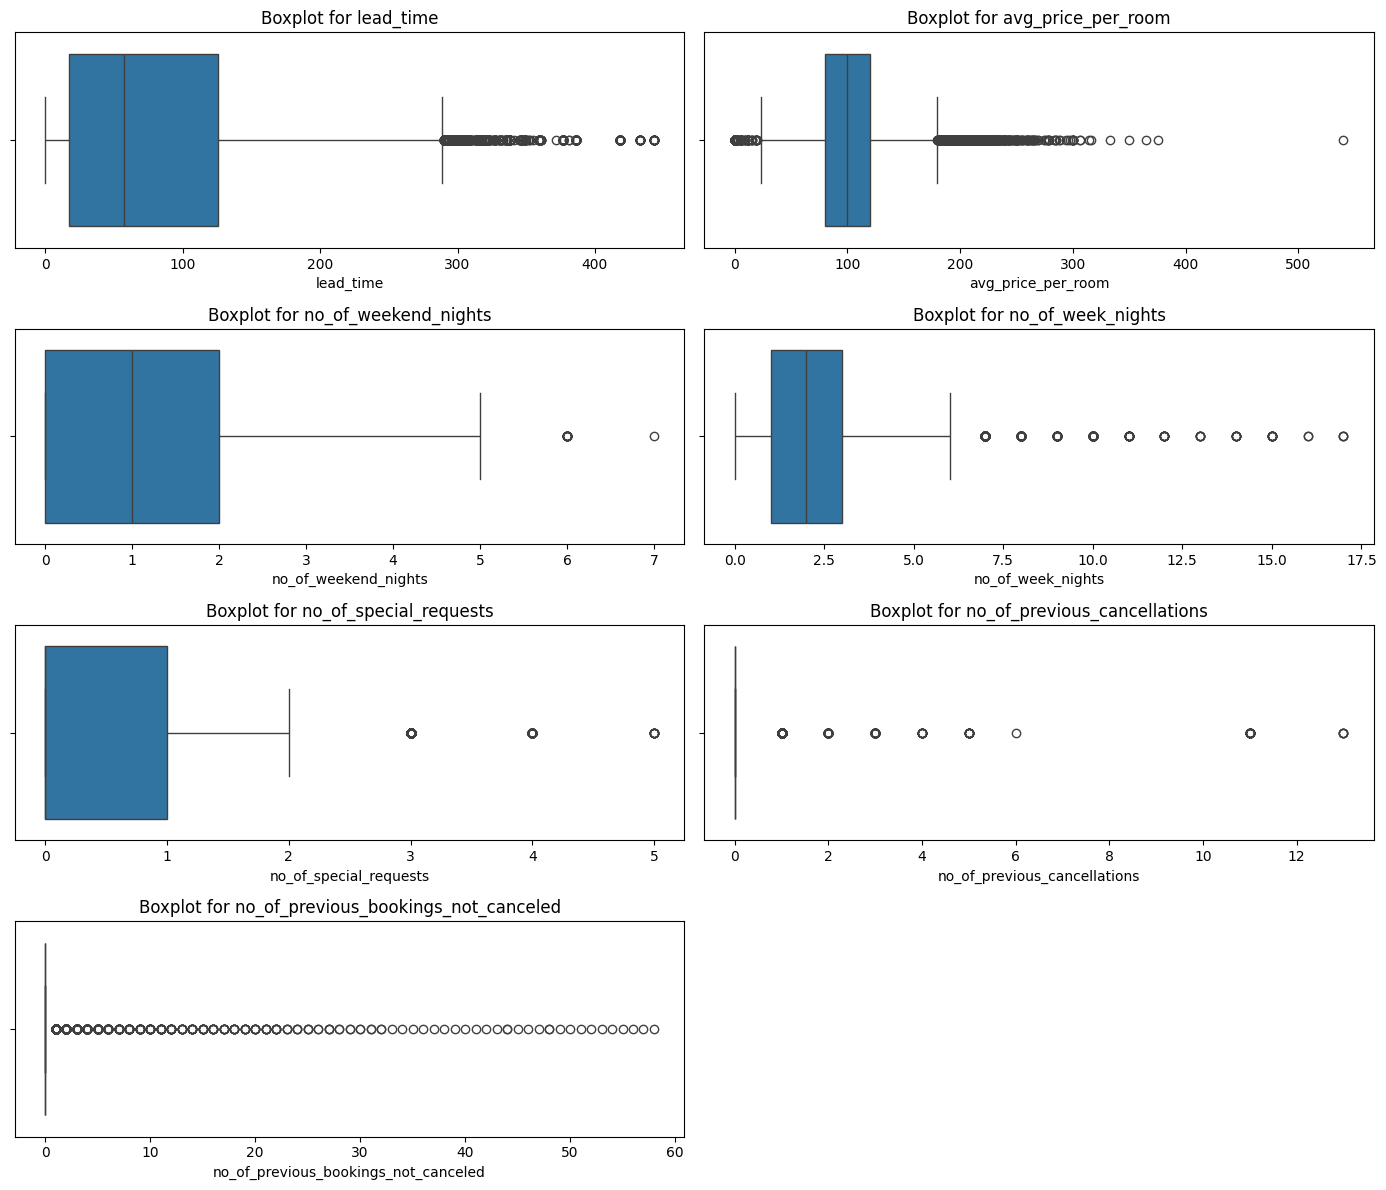

In [ ]:
# Selecting continuous numerical columns for outlier detection
cont_cols = [
    'lead_time',
    'avg_price_per_room',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'no_of_special_requests',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled']

#Visualize each continuous feature with a boxplot (whiskers at 1.5×IQR)
plt.figure(figsize=(14, 12))
for i, col in enumerate(cont_cols, start=1):
    ax = plt.subplot(4, 2, i)            # arrange subplots in a 4×2 grid
    sns.boxplot(x=df2[col], whis=1.5, ax=ax)
    ax.set_title(f"Boxplot for {col}")   # title for clarity
plt.tight_layout()
plt.savefig('outliers_boxplots.png', dpi=300)   # Save at 300 DPI for good resolution
plt.show()


**Observations on Box plots:**   

***lead_time***  

* Median is about 57 days; IQR is roughly 17 to 126 days.  

* There is a noticeable right tail with bookings reaching about 443 days. Very long lead times (over 270 days) are rare but still valid.  

***avg_price_per_room***  

* Median is around 99 €; IQR is about 80 to 120 €.  

* A few zero-price stays (complementary or promo) and high outliers up to around 540 € show premium rates or extreme data.  

***no_of_weekend_nights***  

* Median is 1 night; IQR is 0 to 2 nights.  

* Some stays of 6 to 7 weekend nights are outliers, likely due to special multi-weekend bookings.  

***no_of_week_nights***  

* Median is 2 nights; IQR is 1 to 3 nights.  

* Rare long weekday stays (7 to 17 nights) are outliers, possibly extended business visits.  

***no_of_special_requests***  

* Median is 0; IQR is 0 to 1.  

* Outliers at 3 to 5 requests, though few in number, indicate highly personalized bookings.  

***no_of_previous_cancellations***  

* Median is 0; IQR is 0 to 0.  

* A few guests have up to about 13 past cancellations. These habitual cancellers may require a special policy.  

***no_of_previous_bookings_not_canceled***  

* Median is 0; IQR is 0 to 0.  

* Many outliers (10 to 58 successful past stays) suggest a small loyal segment of valuable repeat customers.  

**We will now validate these outliers using IQR method.**

In [ ]:
# We performed visual outlier detection on above.

# IQR-Based Outlier Detection Summary
outlier_report = {}

for col in cont_cols:
    # Compute first (Q1) and third (Q3) quartiles
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a boolean mask for values outside the bounds
    mask = (df2[col] < lower_bound) | (df2[col] > upper_bound)

    # For avg_price_per_room, zero is valid (complimentary stays), so exclude zeros from being marked
    if col == 'avg_price_per_room':
        mask &= df2[col] > 0

    # Count how many True entries in mask → number of outliers
    n_outliers = mask.sum()  # mask.sum() works because True==1, False==0

    # Store the results (rounding bounds for readability)
    outlier_report[col] = {
        'lower_bound': round(lower_bound, 2),
        'upper_bound': round(upper_bound, 2),
        'outlier_count': int(n_outliers),
        'outlier_prcnt': round(n_outliers / len(df2) * 100, 2)
    }

# Convert the dictionary into a DataFrame for clear display
outlier_df = pd.DataFrame(outlier_report).T
print("========================= Outlier Detection Summary ============================")
print(outlier_df)

========================= Outlier Detection Summary ============================
                                      lower_bound  upper_bound  outlier_count  \
lead_time                                 -146.50       289.50         1331.0   
avg_price_per_room                          20.75       179.55         1151.0   
no_of_weekend_nights                        -3.00         5.00           21.0   
no_of_week_nights                           -2.00         6.00          324.0   
no_of_special_requests                      -1.50         2.50          761.0   
no_of_previous_cancellations                 0.00         0.00          338.0   
no_of_previous_bookings_not_canceled         0.00         0.00          812.0   

                                      outlier_prcnt  
lead_time                                      3.67  
avg_price_per_room                             3.17  
no_of_weekend_nights                           0.06  
no_of_week_nights                              0.89  


**Observations:**

***lead_time***

* **Outlier %: 3.67%**

* Longer lead times are strongly linked to booking cancellations, as shown in the exploratory data analysis.

* Treatment: This feature has high predictability power. Thus, we will treat it by using **capping or winsorization for high values**, for example, those above the 95th percentile. This approach reduces skew and extreme influence while keeping useful variance.

***avg_price_per_room***

* **Outlier %: 3.17%**

* Prices were slightly higher for canceled bookings. Also, zero-price rooms likely indicate complimentary bookings, which should be excluded during treatment.

* Treatment: This feature has moderate predictability power. Thus, we will treat it first by **exclude records where avg_price_per_room = 0 for outlier detection. After that, cap high values**. Winsorization avoids skewing model training while maintaining interpretability.

***no_of_weekend_nights***

* **Outlier %: 0.06%**

* This feature has low business relevance. Most bookings are for 1 to 2 nights, with very few long weekend stays.

* Treatment: **We will retain all values**. Outliers are valid long weekend vacations and do not impact overall modeling.

***no_of_week_nights***

* **Outlier %: 0.89%**

* This has minor influence on cancellations.

* Treatment: **We will retain the values** and no removal is required.

***no_of_special_requests***

* **Outlier %: 2.10%**

* It has moderate business relevance. More special requests were noted in non-canceled bookings.

* Treatment: **We will keep the values**, such as those greater than 4 or 5, since they are rare. These reflect customer intent and are important for modeling.

***no_of_previous_cancellations***

* **Outlier %: 0.93%**

* It has low business relevance. Most guests had zero cancellations, but a few had many. This is important for identifying chronic cancelers.

* Treatment: **We will retain the data**, as no treatment required.

***no_of_previous_bookings_not_canceled***

* **Outlier %: 2.24%**

* It has low to moderate business relevance. There are very loyal customers with many past bookings, but this is not the most significant factor.

* Treatment: **We will keep the values**. They represent true loyalty.


##**Outlier Treatment**

* lead_time will be capped at the upper whisker (Q3 + 1.5xIQR) because very long lead times can be valid but may have an outsized impact on modeling.

* avg_price_per_room is considered only for non-zero prices. This assumes that zero-priced rooms are intentional, such as complimentary or promotional stays.

* Outliers will be capped or winsorization  rather than removed to maintain the size and integrity of the dataset for modeling.



**We will now treat these outliers using capping or winsorization  method.**

In [ ]:
# Outlier Treatment for 'lead_time' and 'avg_price_per_room'

# Calculate IQR and upper bound for lead_time
Q1_lead = df2['lead_time'].quantile(0.25)
Q3_lead = df2['lead_time'].quantile(0.75)
IQR_lead = Q3_lead - Q1_lead
upper_bound_lead = Q3_lead + 1.5 * IQR_lead

# Cap lead_time values above upper bound
df2['lead_time'] = np.where(
    df2['lead_time'] > upper_bound_lead,
    upper_bound_lead,
    df2['lead_time'])

# Exclude zero-price rows for outlier detection on avg_price_per_room
non_zero_price = df2[df2['avg_price_per_room'] > 0]

# Calculate IQR and upper bound for avg_price_per_room (excluding zero)
Q1_price = non_zero_price['avg_price_per_room'].quantile(0.25)
Q3_price = non_zero_price['avg_price_per_room'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Cap only upper outliers in avg_price_per_room (excluding zeros)
df2.loc[df2['avg_price_per_room'] > 0, 'avg_price_per_room'] = np.where(
    df2.loc[df2['avg_price_per_room'] > 0, 'avg_price_per_room'] > upper_bound_price,
    upper_bound_price,
    df2.loc[df2['avg_price_per_room'] > 0, 'avg_price_per_room']
)


**Verification Post-Treatment of Outliers**

In [ ]:
# Loop through each feature to check for remaining outliers after treatment
for col1 in ['lead_time', 'avg_price_per_room']:

    # For avg_price_per_room, exclude rows with value = 0
    # because zero-priced rooms (e.g., complimentary bookings) are NOT part of outlier logic
    if col1 == 'avg_price_per_room':
        # Subset = only rows where avg_price_per_room > 0
        subset = df2[df2['avg_price_per_room'] > 0][col1]
    else:
        # For lead_time, using all values as-is
        subset = df2[col1]

    # Calculate IQR bounds
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers outside IQR bounds
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    # Print the percentage of outliers remaining in that feature
    print(f"{col1}: {len(outliers)/len(subset):.1%} outliers remaining")


lead_time: 0.0% outliers remaining
avg_price_per_room: 0.2% outliers remaining


* After outlier treatment we successfully reduced the outliers without losing important data. We can now move forward with the feature engineering and scaling steps with confidence.

**We will do visual confirmation for treated outliers.**

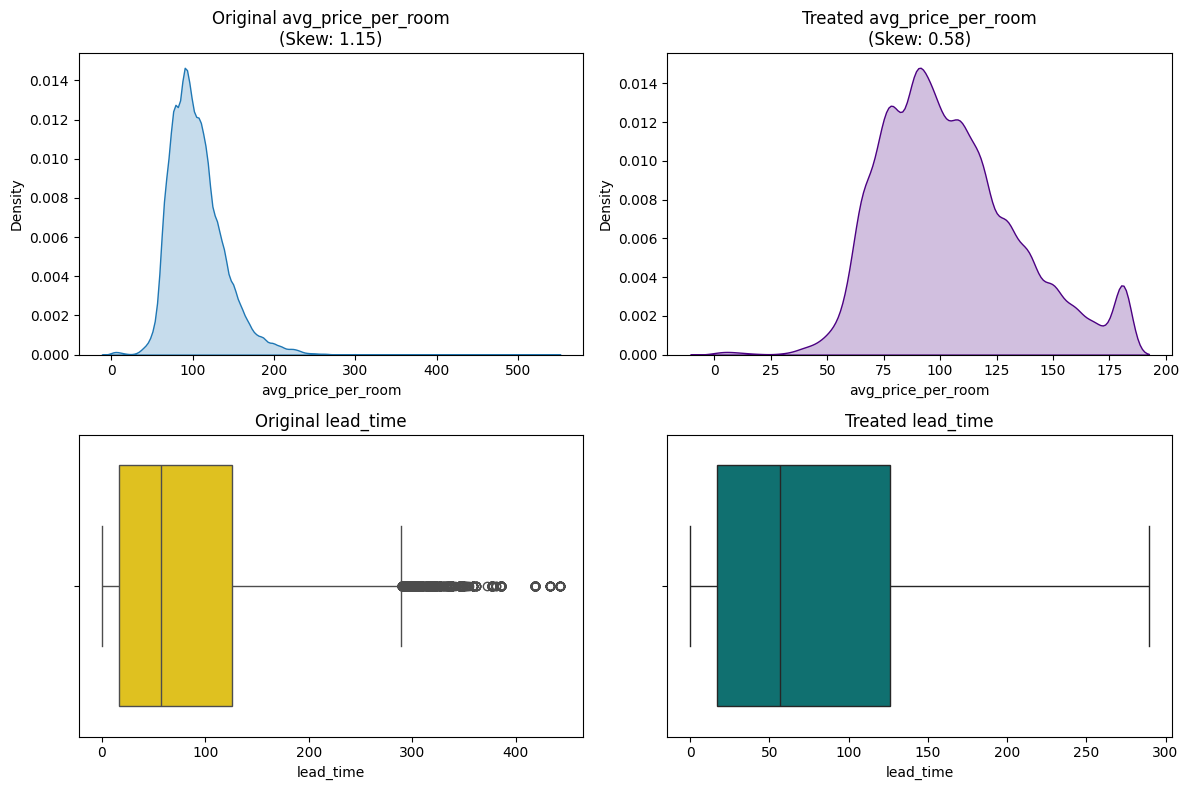

In [ ]:
# Exclude 0 avg_price_per_room for before-after visual comparison
original_price = hotel_data[hotel_data['avg_price_per_room'] > 0]['avg_price_per_room']
treated_price = df2[df2['avg_price_per_room'] > 0]['avg_price_per_room']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# KDE plot for avg_price_per_room before treatment (excluding 0s)
sns.kdeplot(original_price, ax=axes[0, 0], fill=True)
axes[0, 0].set_title(f'Original avg_price_per_room\n(Skew: {original_price.skew():.2f})')

# KDE plot for avg_price_per_room after treatment (excluding 0s)
sns.kdeplot(treated_price, ax=axes[0, 1], color='indigo', fill=True)
axes[0, 1].set_title(f'Treated avg_price_per_room\n(Skew: {treated_price.skew():.2f})')

# Boxplot for lead_time before treatment
sns.boxplot(x=hotel_data['lead_time'], ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Original lead_time')

# Boxplot for lead_time after treatment
sns.boxplot(x=df2['lead_time'], ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Treated lead_time')

plt.tight_layout()
plt.show()


**Observations:**

* We can see from the plots before and after treatment that outliers for lead_time have decreased, as shown in the box plot.

* The data distribution for avg_price_per_room shows a slight normal distribution compared to the plot before treatment, which had right skewness.

##**Feature Engineering**

During our data inspection, we noticed there are zero number of adults in our dataset and a booking with 0 adults is not valid in a real-world hotel scenario. This could be either error or incorrect making it irrelevant for the predictions. We will analyse the rows where no_of_adults = 0.


**Checking the booking with no_of_adults = 0**

In [ ]:
# Count how many rows have 0 adults
num_zero_adults = df2[df2['no_of_adults'] == 0].shape[0]

# Total rows in dataset
total_rows = df2.shape[0]

# Percentage
percent_zero_adults = (num_zero_adults / total_rows) * 100

print(f"Number of bookings with 0 adults: {num_zero_adults}")
print(f"Percentage of total data: {percent_zero_adults:.2f}%")


Number of bookings with 0 adults: 139
Percentage of total data: 0.38%


* We can see there are just 0.38% of total data where no_of_adults = 0. Thus, we can safely drop these rows as removing them would not affect our model quality due to negligible data loss.

**Dropping rows where no_of_adults = 0.**

In [ ]:
df2 = df2[df2['no_of_adults'] > 0].copy()
# Count how many rows have 0 adults left
num_zero_adults1 = df2[df2['no_of_adults'] == 0].shape[0]
print(f"Number of bookings with 0 adults: {num_zero_adults1}")


Number of bookings with 0 adults: 0


* We have successfully dropped the no_of_adults with zero value.

**Checking the shape again.**

In [ ]:
df2.shape

(36136, 18)

* Now, our dataset have 36136 rows and 18 columns after dropping few rows.

As per our observations from EDA, we know  Family size ( no_of_adults + no_of_children) may impact booking behavior (larger groups may cancel less due to planning). We will create a new feature family size which includes no_of_adults + no_of_children in our dataset.

**Creating new feature family_size.**

In [ ]:
df2['family_size'] = df2['no_of_adults'] + df2['no_of_children']
df2.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  family_size  
0                       0               0            2  
1                       1               0            2  
2                       0               1            1  
3                       0               1            2  
4                       0               1            2

* We have created the new feature successfully.

**Checking value counts for family_size.**

In [ ]:
family_vals = df2['family_size'].unique()
print("Unqiue values in family_size are:")
print(family_vals)

family_count = df2['family_size'].value_counts().sort_index()
print("\n\nValues counts for family_size are:\n\n")
print(family_count)

df2['family_size'].describe().T

Unqiue values in family_size are:
[ 2  1  3  4  5 12 10 11]


Values counts for family_size are:


family_size
1      7551
2     23809
3      3846
4       912
5        15
10        1
11        1
12        1
Name: count, dtype: int64


count    36136.000000
mean         1.949939
std          0.651433
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: family_size, dtype: float64

**Observations:**

* ***Size 2:*** Most common, with 23,809 bookings, which is about 65.6%. This size is for couples or small families.

* ***Size 1:*** Second most common, with 7,551 bookings, roughly 20.8%. This size caters to solo travelers. Together, these account for 86.4% of all bookings.

* ***Sizes 10, 11, and 12*** each have only 1 booking, about 0.003% each.

* ***Size 5*** has just 15 bookings, or 0.04%.

* ***Sizes of 10*** or larger are very unlikely for standard hotel rooms. This suggests possible data errors or group bookings divided among rooms.

* ***Extreme values (10, 11, and 12)*** together represent only 0.008% of the data.



**We will visualise the family_size distribution and outliers.**

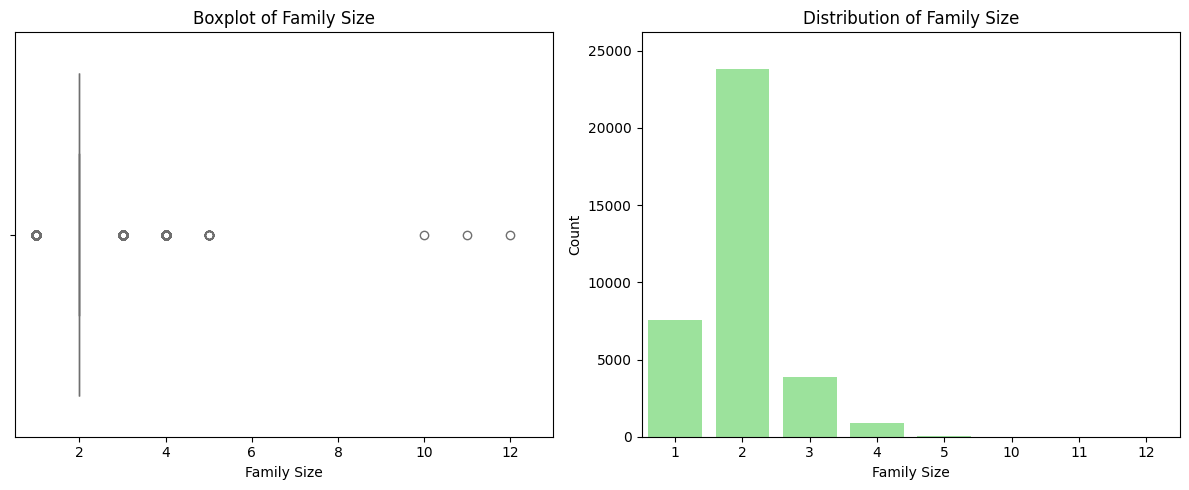

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['family_size'], color='skyblue')
plt.title("Boxplot of Family Size")
plt.xlabel("Family Size")
plt.xlim(0.5, df2['family_size'].max() + 1) # Set x-axis limits to start from 1

# Barplot
plt.subplot(1, 2, 2)
# Bar plot for frequency
ax = sns.countplot(x='family_size', data=df2, color='lightgreen')
plt.title("Distribution of Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
ax.set_ylim(0, df2['family_size'].value_counts().max() * 1.1) # Increase y-axis limit

plt.tight_layout()
plt.show()

**Observations:**

* Data distribution is right skewed.
* The majority of bookings are for small families, typically 1 to 3 members, with a family size of 2 being the most common.

* Some bookings have very large family sizes, such as 10, 11, or 12. These appear as outliers in the boxplot.

* For our treatment decision, we choose not to address these outliers. They probably represent valid group bookings or large family trips instead of data errors.

* Removing or limiting these outliers could lead to losing important business cases, such as bulk reservations.

**Creating new feature total_stay.**

We know no_of_weekend_nights and no_of_week_nights individually showed low business importance with has low outlier percentages. However, together they represent the total duration of stay, which is more informative and business relevant.
This can help us in modeling because longer stays may correlate with cancellation likelihood or booking intent.

In [ ]:
# Create total stay duration
df2['total_stay'] = df2['no_of_weekend_nights'] + df2['no_of_week_nights']
df2.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  family_size  total_stay  
0                       0               0            2           3  
1                       1               0            2           5  
2                       0               1            1           3  
3                       0               1            2           2  
4                       0               1            2           2

* We can see our new feature total_stay is added in the dataset.

**Checking values count and statistical summary of total_stay.**

In [ ]:
stay_vals = df2['total_stay'].unique()
print("Unqiue values in total_stay are:")
print(stay_vals)

stay_count = df2['total_stay'].value_counts().sort_index()
print("\nValues counts for total_stay are:\n\n")
print(stay_count)

df2['total_stay'].describe().T

Unqiue values in total_stay are:
[ 3  5  2  4  1  6  7 14  0  8 15 10 21 13 12  9 19 20 16 11 17 23 18 24
 22]

Values counts for total_stay are:


total_stay
0        78
1      6582
2      8452
3     10012
4      5863
5      2571
6      1027
7       970
8       179
9       111
10      109
11       38
12       24
13       17
14       32
15       31
16        6
17        5
18        3
19        6
20       11
21        4
22        2
23        2
24        1
Name: count, dtype: int64


count    36136.000000
mean         3.013864
std          1.785913
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_stay, dtype: float64

**Visualising total_stay.**

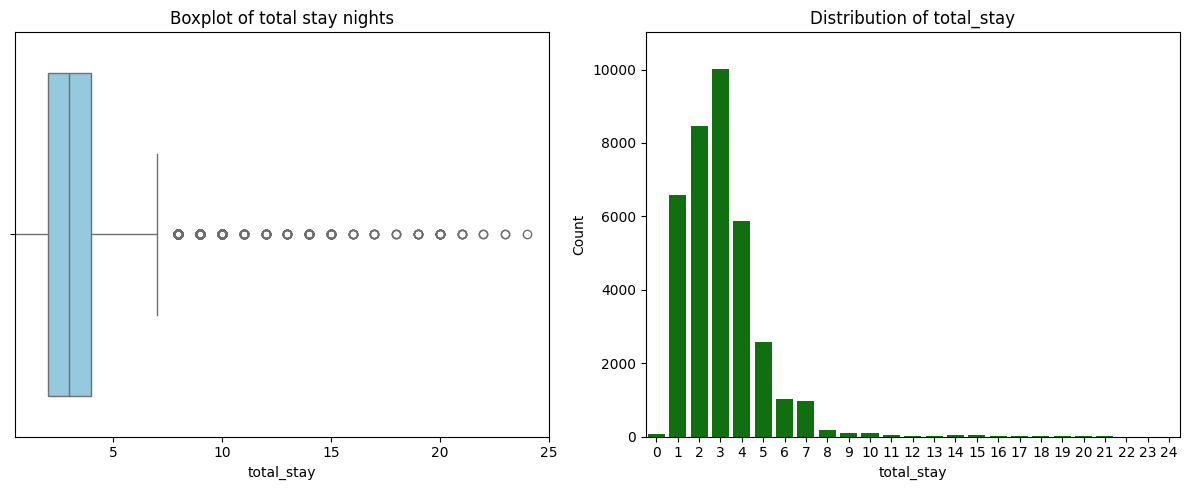

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['total_stay'], color='skyblue')
plt.title("Boxplot of total stay nights")
plt.xlabel("total_stay")
plt.xlim(0.5, df2['total_stay'].max() + 1) # Set x-axis limits to start from 1

# Barplot
plt.subplot(1, 2, 2)
# Bar plot for frequency
ax = sns.countplot(x='total_stay', data=df2, color='green')
plt.title("Distribution of total_stay")
plt.xlabel("total_stay")
plt.ylabel("Count")
ax.set_ylim(0, df2['total_stay'].value_counts().max() * 1.1) # Increase y-axis limit

plt.tight_layout()
plt.show()

**Observations:**

* Range of total stay is 0 to 24 nights.

* Most common stays: 2 to 4 nights (IQR = [2, 4])

* Outliers: Very long stays (e.g., 15 to 24 nights) are rare.

* 0-night stays (78 records) are unusual and may suggest data entry mistakes or canceled same-day check-ins. We need to investigate  week and weekend nights individually to check if what percentage of rows have stay nights, based on it we will see if we have to drop or impute, or leave as is.

* Very long stays (15+ nights) are uncommon and may represent group or corporate bookings. These are valid but rare and should not be removed unless proven to be incorrect.


**Investigating rows where week nights, weekend nights and total_stay are 0.**

In [ ]:
# Total records in df2
total_records = len(df2)

# Identify rows where both no_of_weekend_nights and no_of_week_nights are zero
zero_night_rows = df2[(df2['no_of_weekend_nights'] == 0) & (df2['no_of_week_nights'] == 0)]

# Number of such rows
zero_night_count = len(zero_night_rows)

# Percentage of total data
zero_night_percent = round((zero_night_count / total_records) * 100, 2)

print(f"Bookings with both no_of_weekend_nights and no_of_week_nights = 0 is {zero_night_count}")
print(f"Percentage of total data: {zero_night_percent}%")


Bookings with both no_of_weekend_nights and no_of_week_nights = 0 is 78
Percentage of total data: 0.22%


**Observations:**
* During pre-processing, we found 78 bookings (0.22% of the total data) where both no_of_weekend_nights and no_of_week_nights were zero, leading to a total_stay value of 0.
* These entries likely represent same-day check-in and check-out bookings, day-use reservations, or very short stays.
* Since these bookings are still valid and could also be canceled, they are important for our goal of predicting booking cancellations.
* Additionally, because they are such a small portion of the data, they do not significantly impact model quality.
* Therefore, we chose to keep both the individual zero-night values and the total_stay = 0 values without any imputation or deletion.
* This choice allows our dataset to reflect the real-world variety of bookings and avoids discarding meaningful edge cases that might affect cancellation behavior.


**Dropping redundant variables like 'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights' as we have already created a features which have their values, as keeping them will raise multi-collinearity issue.**

In [ ]:
# Create copy of df3
df3 = df2.copy()

# Drop original components of engineered features to avoid multicollinearity
df3.drop([
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights'
], axis=1, inplace=True)
df3.head()

type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  family_size  total_stay  
0                       0               0            2           3  
1                       1               0            2           5  
2                       0               1            1           3  
3                       0               1            2           2  
4                       0               1            2           2

In [ ]:
df3.shape

(36136, 16)

* We can observe 'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights' columns have been dropped.
* Now, we have 36136 rows and 16 columns.

**Converting categorical columns to 'category' dtype.**



In [ ]:
# Convert selected categorical columns to 'category' dtype for memory efficiency and clarity
categorical_cols = [
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
    'arrival_month', 'arrival_year', 'booking_status', 'repeated_guest',
    'required_car_parking_space', 'no_of_special_requests'
]

for col in categorical_cols:
    df3[col] = df3[col].astype('category')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36136 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   type_of_meal_plan                     36136 non-null  category
 1   required_car_parking_space            36136 non-null  category
 2   room_type_reserved                    36136 non-null  category
 3   lead_time                             36136 non-null  float64 
 4   arrival_year                          36136 non-null  category
 5   arrival_month                         36136 non-null  category
 6   arrival_date                          36136 non-null  int64   
 7   market_segment_type                   36136 non-null  category
 8   repeated_guest                        36136 non-null  category
 9   no_of_previous_cancellations          36136 non-null  int64   
 10  no_of_previous_bookings_not_canceled  36136 non-null  int64   
 11  avg_pri

We converted few categorical columns to 'category' dtype.This ensures that future encoding operations (like one-hot encoding) treat these variables appropriately. The booking_status is already encoded as 0 and 1 in previous section, so we retain it as numeric for modeling.
Now, we have 9 columns with dtype 'category'.

##**Data Preparation for Modeling**

**Before splitting the data into train-test we will do one-hot encoding for our independent categorical variables (type_of_meal_plan,
        room_type_reserved,
        market_segment_type) except repeated_guest, required_car_parking_space and booking_status as they are already encoded. Moreover, booking_status is target variable we need not do one-hot encoding for target.**

###**Train & Test Split**

* **We will first we need to select our target (booking_status) variable from the dataframe and separate it from the independent variables(predictors), then encode categorical variable and finally split the dataset.**

* **Splitting the data into train and test set:**

   * X_train → 70% of feature data used to train the model

   * X_test → 30% of feature data used to test (evaluate) the model

   * y_train → Target values for X_train

   * y_test → Target values for X_test



In [ ]:
df4 = df3.copy() #creating a copy of df3 dataframe

#selects input features (or predictors)
X = df4.drop(['booking_status'], axis=1)
#select your target variable (dependent var).
y = df4['booking_status']


#One-Hot encoding categorical features
X = pd.get_dummies(X, columns=[
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ], drop_first=True)

#Converting X to float dtype
X = X.astype(float)

# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)


y_train.reset_index(inplace = True, drop = True)


**Checking Dummy Variables.**

In [ ]:
X.head()

required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0      224.0        2017.0           10.0   
1                         0.0        5.0        2018.0           11.0   
2                         0.0        1.0        2018.0            2.0   
3                         0.0      211.0        2018.0            5.0   
4                         0.0       48.0        2018.0            4.0   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0           2.0             0.0                           0.0   
1           6.0             0.0                           0.0   
2          28.0             0.0                           0.0   
3          20.0             0.0                           0.0   
4          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  family_size  total_stay  \
0                     0.0          2.0         3.0   
1                     1.0          2.0         5.0   
2                     0.0          1.0         3.0   
3                     0.0          2.0         2.0   
4                     0.0          2.0         2.0   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                            0.0                          1.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0  

* We can observe that our dummmy variables are encoded in train & test data.

**Top 5 rows of train data**

In [ ]:
X_train.head()

required_car_parking_space  lead_time  arrival_year  arrival_month  \
35168                         0.0      116.0        2018.0            2.0   
6374                          1.0        1.0        2018.0            1.0   
11001                         0.0       93.0        2018.0            5.0   
22950                         0.0      121.0        2017.0            8.0   
194                           0.0      147.0        2018.0            8.0   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
35168          28.0             0.0                           0.0   
6374           13.0             0.0                           0.0   
11001          21.0             0.0                           0.0   
22950          10.0             0.0                           0.0   
194             3.0             0.0                           0.0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
35168                                   0.0               61.00   
6374                                    0.0              180.00   
11001                                   0.0              119.85   
22950                                   0.0               76.50   
194                                     0.0              118.88   

       no_of_special_requests  family_size  total_stay  \
35168                     0.0          1.0         3.0   
6374                      1.0          4.0         4.0   
11001                     0.0          2.0         5.0   
22950                     0.0          2.0         3.0   
194                       1.0          2.0        14.0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
35168                            0.0                            0.0   
6374                             0.0                            0.0   
11001                            0.0                            0.0   
22950                            0.0                            0.0   
194                              0.0                            0.0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
35168                             0.0                             0.0   
6374                              0.0                             0.0   
11001                             0.0                             0.0   
22950                             0.0                             0.0   
194                               0.0                             0.0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
35168                             0.0                             0.0   
6374                              0.0                             0.0   
11001                             0.0                             0.0   
22950                             0.0                             0.0   
194                               0.0                             1.0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
35168                             0.0                             0.0   
6374                              0.0                             1.0   
11001                             0.0                             0.0   
22950                             0.0                             0.0   
194                               0.0                             0.0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
35168                             0.0                                0.0   
6374                              0.0                                0.0   
11001                             0.0                                0.0   
22950                             0.0                                0.0   
194                               0.0                                0.0   

       market_segment_type_Corporate  market_segment_type_Offline  \
35168                            0.0                          1.0   
6374                             0.0  

**Top 5 rows of test data**

In [ ]:
X_test.head()

required_car_parking_space  lead_time  arrival_year  arrival_month  \
19783                         0.0       54.0        2018.0           10.0   
17689                         0.0       13.0        2018.0            9.0   
32506                         0.0      289.5        2018.0           11.0   
29104                         0.0      250.0        2018.0           10.0   
32876                         0.0       74.0        2018.0            3.0   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
19783          28.0             0.0                           0.0   
17689          12.0             0.0                           0.0   
32506           4.0             0.0                           0.0   
29104          20.0             0.0                           0.0   
32876          30.0             0.0                           0.0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
19783                                   0.0             181.225   
17689                                   0.0             181.225   
32506                                   0.0              89.000   
29104                                   0.0              96.300   
32876                                   0.0              82.450   

       no_of_special_requests  family_size  total_stay  \
19783                     1.0          2.0         4.0   
17689                     1.0          3.0         2.0   
32506                     0.0          2.0         3.0   
29104                     0.0          2.0         3.0   
32876                     0.0          2.0         5.0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
19783                            0.0                            0.0   
17689                            0.0                            0.0   
32506                            0.0                            0.0   
29104                            0.0                            0.0   
32876                            0.0                            0.0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
19783                             0.0                             0.0   
17689                             0.0                             0.0   
32506                             0.0                             0.0   
29104                             0.0                             0.0   
32876                             0.0                             0.0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
19783                             0.0                             0.0   
17689                             0.0                             1.0   
32506                             0.0                             0.0   
29104                             0.0                             0.0   
32876                             0.0                             0.0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
19783                             0.0                             0.0   
17689                             0.0                             0.0   
32506                             0.0                             0.0   
29104                             0.0                             0.0   
32876                             0.0                             0.0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
19783                             1.0                                0.0   
17689                             0.0                                0.0   
32506                             0.0                                0.0   
29104                             0.0                                0.0   
32876                             0.0                                0.0   

       market_segment_type_Corporate  market_segment_type_Offline  \
19783                            0.0                          0.0   
17689                            0.0  

* We can observe that our top 5 rows of our train & test data.

**Checking shape of train and test dataset.**

In [ ]:
print("Shape of train data =", X_train.shape)
print("Shape of test data =", X_test.shape)

Shape of train data = (25295, 25)
Shape of test data = (10841, 25)


**Checking the percentage of classes in train and test data in dependent variable.**

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
booking_status
0    0.672742
1    0.327258
Name: proportion, dtype: float64

Percentage of classes in test set:
booking_status
0    0.67134
1    0.32866
Name: proportion, dtype: float64


**Observations:**

***Independent variable***
* Training set: 25,295 rows
* Test set: 10,841 rows

***Target variable***
* ***Training set:***

    * 67.27% not canceled (0)

    * 32.73% canceled (1)

* ***Test set:***

   * 67.13% not canceled (0)

   * 32.87% canceled (1)

* **Conclusion:** We had seen that around 67.27% of observations belongs to class 0 (not canceled) and 32.87% observations belongs to class 1 (canceled), and this is preserved in the train and test sets.


###**Scaling the Data**

In machine learning, scaling, such as using StandardScaler, brings numerical features onto a similar scale. This helps with model convergence and makes it easier to interpret the results.

In [ ]:
sc = StandardScaler()

X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
print(X_train_sc.head())

print(X_test_sc.head())

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                   -0.178610   0.397033      0.468891      -1.756718   
1                    5.598799  -1.011698      0.468891      -2.081898   
2                   -0.178610   0.115287      0.468891      -0.781178   
3                   -0.178610   0.458282     -2.132690       0.194362   
4                   -0.178610   0.776778      0.468891       0.194362   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0      1.418119       -0.161245                     -0.064178   
1     -0.297758       -0.161245                     -0.064178   
2      0.617377       -0.161245                     -0.064178   
3     -0.640933       -0.161245                     -0.064178   
4     -1.441676       -0.161245                     -0.064178   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.088675           -1.276201   
1                             -0.088675     

#**MODEL BUILDING**

##**Model Evaluation Criteria**

**Model can make incorrect predictions as**
* Predicting a customer will cancel a booking when they actually do not cancel, or predicting a customer will not cancel when they do cancel.

**Which case is more critical?**

* Both cases are important because:

  * If we predict a customer will cancel but they do not, the hotel might wrongly reassign or reject that booking. This can lead to lost revenue and a bad customer experience.

  * If we predict a customer will not cancel but they do cancel, the hotel will have empty rooms. This results in lost opportunities and poor use of resources.

**How can we reduce this loss?**

* We need to reduce both False Positives (FP) and False Negatives (FN).

* The f1_score should be maximized. A higher f1_score means a better chance of reducing both False Negatives and False Positives, allowing us to identify both classes correctly.

* The f1_score is calculated as:

   * f1_score = 2 * ((Precision * Recall) / (Precision + Recall))

##**Building Logistic Regression Model**

* We will now perform logistic regression using statsmodels for building inital model.

* Using statsmodels, we will be able to check the statistical validity of our model.
* We will identify the significant predictors from the p-values we get for each predictor variable.

**Adding constant to the scaled data for logistic regression.**

In [ ]:
# we added has_constant='add' to prevent silent skip, as previously it was skipping to add constant, so we force added
X_train_with_const = sm.add_constant(X_train_sc, has_constant='add')
X_test_with_const = sm.add_constant(X_test_sc, has_constant='add')


In [ ]:
print("Shape of train data =", X_train_with_const.shape)
print("Shape of test data =", X_test_with_const.shape)

Shape of train data = (25295, 26)
Shape of test data = (10841, 26)


**Note: In Colab, sm.add_constant() sometimes places the 'const' column at the end of the DataFrame causing  shape mismatch, especially in recent versions. so, we need to prevent the shape mismatch during .predict(), else, we will get "ValueError: shapes (10841,25) and (26,) not aligned: 25 (dim 1) != 26 (dim 0)"**


In [ ]:
# Align test set columns with training set (including constant) to ensure same order and shape for prediction

X_test_with_const = X_test_with_const[X_train_with_const.columns]

In [ ]:
X_train_with_const.head()

const  required_car_parking_space  lead_time  arrival_year  arrival_month  \
0    1.0                   -0.178610   0.397033      0.468891      -1.756718   
1    1.0                    5.598799  -1.011698      0.468891      -2.081898   
2    1.0                   -0.178610   0.115287      0.468891      -0.781178   
3    1.0                   -0.178610   0.458282     -2.132690       0.194362   
4    1.0                   -0.178610   0.776778      0.468891       0.194362   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0      1.418119       -0.161245                     -0.064178   
1     -0.297758       -0.161245                     -0.064178   
2      0.617377       -0.161245                     -0.064178   
3     -0.640933       -0.161245                     -0.064178   
4     -1.441676       -0.161245                     -0.064178   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.088675           -1.276201   
1                             -0.088675            2.354667   
2                             -0.088675            0.519400   
3                             -0.088675           -0.803273   
4                             -0.088675            0.489804   

   no_of_special_requests  family_size  total_stay  \
0               -0.785462    -1.456631   -0.004070   
1                0.493638     3.155011    0.555470   
2               -0.785462     0.080583    1.115010   
3               -0.785462     0.080583   -0.004070   
4                0.493638     0.080583    6.150873   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                      -0.316489                      -0.010891   
1                      -0.316489                      -0.010891   
2                      -0.316489                      -0.010891   
3                      -0.316489                      -0.010891   
4                      -0.316489                      -0.010891   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                       -0.405306                       -0.124975   
1                       -0.405306                       -0.124975   
2                       -0.405306                       -0.124975   
3                       -0.405306                       -0.124975   
4                       -0.405306                       -0.124975   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                       -0.016638                       -0.453574   
1                       -0.016638                       -0.453574   
2                       -0.016638                       -0.453574   
3                       -0.016638                       -0.453574   
4                       -0.016638                        2.204711   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                       -0.083945                       -0.163807   
1                       -0.083945                        6.104734   
2                       -0.083945                       -0.163807   
3                       -0.083945                       -0.163807   
4                       -0.083945                       -0.163807   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                       -0.067285                          -0.104453   
1                       -0.067285                          -0.104453   
2                       -0.067285                          -0.104453   
3                       -0.067285                          -0.104453   
4                       -0.067285                          -0.104453   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                      -0.245511                     1.559836   
1                      -0.245511                    -0.641093   
2                      -0.245511                    -0.641093   
3                      -0.245511                    -0.641093   
4                    

* We can see constant column is added in our training dataset

**Fitting logistic regression model.**

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train_with_const)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25269
Method:                           MLE   Df Model:                           25
Date:                Fri, 01 Aug 2025   Pseudo R-squ.:                  0.3230
Time:                        19:14:46   Log-Likelihood:                -10826.
converged:                      False   LL-Null:                       -15992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6384   1276.897     -0.001      0.999   -2504.310    2501.033
required_car_parking_space              -0.2728      

**Observations on logistic regression initial model:**

***Strong Predictors of Cancellation (Statistically Significant)***

* **lead_time (Coefficient: +1.3123,P < 0.001):** Bookings made far in advance are more likely to be canceled.

* **required_car Parking Space (Coefficient: -0.2728 | p < 0.001):** Guests requesting parking are less likely to cancel.

* **repeated_guest (Coefficient: -0.2642 | p = 0.001):** Repeat guests show a much lower likelihood of cancellation.

* **no_of_special_requests (Coefficient: -1.1210 | p < 0.001):** More special requests correlate with lower cancellations, possibly due to higher guest commitment.

* **avg_price_per_room (Coefficient: 0.6325 | p < 0.001):** Higher-priced bookings are more prone to cancellations, possibly due to price sensitivity.

* **total_stay (Coefficient:+0.0984| p < 0.001):** Longer stays show a slightly higher chance of cancellation.

* **family_size (Coefficient: 0.0471 | p = 0.029):** Larger family groups tend to cancel more often.

* **arrival_year (+):** Cancellations were more frequent in 2018 compared to 2017.

* **arrival_month (Coefficient: 0.1714 | p < 0.001):** Slight reduction in cancellations for later months of the year.

* **type_of_meal_plan_Meal Plan 2 and type_of_meal_plan_Not Selected (+):** Guests choosing Meal Plan 2 or not selecting a meal plan are more likely to cancel.

* **room_type_reserved (e.g., Room Type 2, 4, 5, 6, 7) (-):** These types are associated with fewer cancellations.

* **market_segment_type - Corporate & Offline (-):** Corporate and offline bookings are less likely to cancel.

***Insignificant Predictors (High p-values)***

* **arrival_date (p = 0.289):** No significant impact on cancellation behavior.

* **no_of_previous_bookings_not_canceled (p = 0.211):** Does not significantly influence cancellation likelihood.

* **room_type_reserved_Room Type 3 (p = 0.935):** No meaningful association with cancellations.

* **market_segment_type_Online (p = 0.578):** Not a statistically strong predictor of cancellations.

* **type_of_meal_plan_Meal Plan 3 & Complementary Segment:** Extremely high standard errors suggest sparse data; may need to be dropped or combined with other categories.

***Potential Issues Identified***

* The model did not converge, likely due to:

* Multicollinearity between variables (to be checked via VIF).

* Separation issues (Meal Plan 3/Complementary).

* Some predictors have very high standard errors including const. and near-zero z-scores, indicating unstable coefficients.

###**Coefficient Interpretation Using Odds for Initial Model**

**Converting coefficients to odds**

* The coefficients of the logistic regression model relate to log(odd). To find the odds, we need to take the exponential of the coefficients.  
* Therefore, **odds = exp(b)**
* The percentage change in odds is calculated as **odds = (exp(b) - 1) * 100**.

In [ ]:
odds = np.exp(lg.params)
perc_change_odds = (np.exp(lg.params) - 1) * 100
odds_df = pd.DataFrame({
    "Odds": odds,
    "Change in Odds (%)": perc_change_odds
})
odds_df.T


const  required_car_parking_space   lead_time  \
Odds                 0.194300                    0.761281    3.714635   
Change in Odds (%) -80.570035                  -23.871854  271.463464   

                    arrival_year  arrival_month  arrival_date  repeated_guest  \
Odds                    1.186942       0.884300      1.018116        0.767842   
Change in Odds (%)     18.694223     -11.570022      1.811590      -23.215808   

                    no_of_previous_cancellations  \
Odds                                    1.072092   
Change in Odds (%)                      7.209181   

                    no_of_previous_bookings_not_canceled  avg_price_per_room  \
Odds                                            0.674542            1.882312   
Change in Odds (%)                            -32.545807           88.231226   

                    no_of_special_requests  family_size  total_stay  \
Odds                              0.325960     1.048274    1.103400   
Change in Odds (%)              -67.404038     4.827423   10.339974   

                    type_of_meal_plan_Meal Plan 2  \
Odds                                     1.060329   
Change in Odds (%)                       6.032852   

                    type_of_meal_plan_Meal Plan 3  \
Odds                                     1.296437   
Change in Odds (%)                      29.643670   

                    type_of_meal_plan_Not Selected  \
Odds                                      1.096210   
Change in Odds (%)                        9.620987   

                    room_type_reserved_Room_Type 2  \
Odds                                      0.963191   
Change in Odds (%)                       -3.680883   

                    room_type_reserved_Room_Type 3  \
Odds                                      0.998298   
Change in Odds (%)                       -0.170191   

                    room_type_reserved_Room_Type 4  \
Odds                                      0.900267   
Change in Odds (%)                       -9.973301   

                    room_type_reserved_Room_Type 5  \
Odds                                      0.936367   
Change in Odds (%)                       -6.363311   

                    room_type_reserved_Room_Type 6  \
Odds                                      0.909847   
Change in Odds (%)                       -9.015314   

                    room_type_reserved_Room_Type 7  \
Odds                                      0.949944   
Change in Odds (%)                       -5.005580   

                    market_segment_type_Complementary  \
Odds                                         0.011218   
Change in Odds (%)                         -98.878155   

                    market_segment_type_Corporate  \
Odds                                     0.800486   
Change in Odds (%)                     -19.951382   

                    market_segment_type_Offline  market_segment_type_Online  
Odds                                   0.420122                    0.935509  
Change in Odds (%)                   -57.987754                   -6.449087

**Observations on Coefficient Odds for Initial Logistic Regression Model:**

* For every 1 unit increase in lead time, the odds of cancellation increase by about 271.46%. This shows it is a strong predictor of cancellations.

* Customer who require car parking space have about ~23.87% lower odds of cancelling their booking, indicating they are less likely to cancel.

* Being a repeat customer reduces the odds of cancellation by about 23.22%, suggesting that loyal customers are more committed to their bookings.

* If a customer has cancelled before, the odds of cancelling again increase by about 7.21%. In contrast, having more previous successful bookings lowers the odds of cancellation by about 32.55%.

* A higher average price per room is linked to about 88.23% higher odds of cancellation. Expensive bookings appear to be more likely to be cancelled.

* Customers who make special requests are about 67.40% less likely to cancel, showing that more engaged guests tend to stick to their plans.

* A larger family size slightly raises the odds of cancellation by about 4.83%.

* A longer total stay results in about 10.34% higher odds of cancellation, which may reflect the greater commitment needed for long stays.

* Compared to Meal Plan 1:
  
  * Selecting Meal Plan 2 increases cancellation odds by about 6.03%.

  * Not choosing a meal plan raises it by about 9.62%.

  * Selecting Meal Plan 3 increases cancellation odds by about 29.64%.

* Room types also influence cancellation:

  * Room Type 2 and Types 4 to 7 reduce the odds of cancellation by about 3.68% to 9.97% compared to Room Type 1.

* Customers from Corporate, Offline, and Online market segments have 6.45% to 57.99% lower odds of cancellation than the reference group.

* The Complementary market segment shows almost lower 98.88% odds of cancellation, but this value is not reliable, likely due to very sparse data.

###**Initial Model Performance Evaluation for Logistic Regression**

**First, let's create functions to calculate different metrics and the confusion matrix so we don't have to repeat the same code for each model.**

* The model_performance_classification_statsmodels function will check the performance of the models.
* The confusion_matrix_statsmodels function will plot the confusion matrix.

In [ ]:
def evaluate_classification_model_statsmodels(model, X, y_true, threshold=0.5):
    """
    Evaluates performance metrics for a classification model built using statsmodels.

    Parameters:
    model: Trained statsmodels classification model
    X: Predictor variables (independent features)
    y_true: Actual target values
    threshold: Probability cutoff for predicting class 1

    Returns:
    DataFrame containing Accuracy, Recall, Precision, and F1-score
    """

    # check probabilities and classify based on threshold
    predicted_probs = model.predict(X)
    predicted_class = (predicted_probs > threshold).astype(int)

    # Calculate evaluation metrics
    acc = accuracy_score(y_true, predicted_class) #calculates accuracy
    rec = recall_score(y_true, predicted_class) #calculates recall
    prec = precision_score(y_true, predicted_class) #calculates precision
    f1 = f1_score(y_true, predicted_class) ##calculates f1-score

    # Compile metrics into a DataFrame
    performance_summary = pd.DataFrame({
        'Accuracy': [acc],
        'Recall': [rec],
        'Precision': [prec],
        'F1': [f1]
    })

    return performance_summary


In [ ]:
def plot_confusion_matrix_statsmodels(model, X, y_true, threshold=0.5):
    """
    Plots the confusion matrix with percentage annotations for a statsmodels classification model.

    Parameters:
    model: Trained statsmodels classification model
    X: Input features (predictors-independent variables)
    y_true: Actual target values
    threshold: Classification threshold to assign class 1
    """

    # Generate class predictions based on threshold
    y_pred = (model.predict(X) > threshold).astype(int)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create annotation labels with counts and percentages
    total = cm.sum()
    annotated_labels = np.asarray([
        [f"{val}\n{val/total:.2%}" for val in row] for row in cm
    ])

    # Plotting the confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=annotated_labels, fmt="", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()


####**Training Performance**

In [ ]:
print("Training performance of initial logistic regression model on train data:")
lg_reg1_perf_train = evaluate_classification_model_statsmodels(lg, X_train_with_const, y_train)
lg_reg1_perf_train

Training performance of initial logistic regression model on train data:


Accuracy    Recall  Precision        F1
0  0.801463  0.624305   0.729944  0.673004

**Training performance observations:**

***Accuracy is about 80.15%***
* The model correctly predicts around 80% of booking outcomes in the training data.
* This shows decent overall performance.  

***Recall is about 62.43%***  
* The model accurately identifies 62% of actual cancellations.
* Since we want to predict booking cancellations, recall is crucial; we don't want to overlook many real cancellations.  

***Precision is around 72.99%***  
* Out of all the bookings the model predicted as cancellations, about 73% were correct.
* This means the model doesn't make too many false positive predictions (wrongly labeling non-cancellations as cancellations).  

***The F1 Score is about 67.30%***   

* The F1 score balances precision and recall.
* A value around 67% shows a moderately strong performance in identifying both target classes.  

**Interpretation:**
* Since our aim is to predict booking cancellations, both false positives and false negatives are costly:  

  * False negatives (missed cancellations) may lead to overbooking.  

  * False positives (wrongly predicting a cancellation) may cause revenue loss or unnecessary room holds.  

* A recall of about 62% shows the model still misses some cancellations, but a precision of around 73% means when it predicts a cancellation, it's usually correct.  

* Overall, the model demonstrates promising basic performance, but there is room for improvement, especially in increasing recall and the F1 score, which can be the focus during model tuning.

####**Confusion matrix on training data**

Confusion matrix of initial logistic regression model on train data:



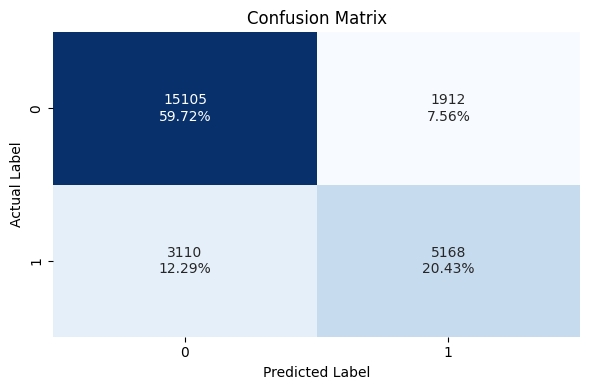

In [ ]:
print("Confusion matrix of initial logistic regression model on train data:\n")
plot_confusion_matrix_statsmodels(lg, X_train_with_const, y_train)


------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Train data confusion matrix observations:**

***True Negatives (TN = 15105, ~59.72%)***  
* The model correctly predicted about 60% of the bookings that were not cancelled. This shows strong performance for class 0.  

***True Positives (TP = 5168, ~20.43%)***  
* The model correctly identified around 20% of all actual cancellations.
* This shows the model's ability to detect actual cancellations (class 1) in the train data.

***False Negatives (FN = 3110, ~12.29%)***  
* The model missed about 12% of actual cancellations. This can cause problems like overbooking.  
* This means these are actual cancellations that were incorrectly predicted as non-cancellations.

***False Positives (FP = 1912, ~7.56%)***  
* The model incorrectly predicted about 8% of non-cancellations as cancellations.
* This may lead to lost revenue by holding back rooms unnecessarily.  

***Class imbalance is handled decently***  
* Even though the target is imbalanced, with around 33% cancellations, the model captures the minority class (cancellations) with reasonable precision and recall.  


####**Performance metrics check on test data**

In [ ]:
print("Test performance of logistic regression :")
lg_reg1_perf_test= evaluate_classification_model_statsmodels(lg, X_test_with_const, y_test)

lg_reg1_perf_test

Test performance of logistic regression :


Accuracy   Recall  Precision        F1
0  0.811457  0.63542   0.752409  0.688984

**Test performance observations:**

***Accuracy is about 81.14%***
* The model correctly predicts around 81% of booking outcomes in the test data.
* This shows generalization ability to unseen data.  

***Recall is about 63.54%***  
* The model accurately identifies ~64% of actual cancellations.
* Since we want to predict booking cancellations, recall is crucial; we don't want to overlook many real cancellations (false negatives).  

***Precision is around 75.24%***  
* Out of all the bookings the model predicted as cancellations, about 75% were correct.
* This means the model doesn't generate too many false positive predictions (wrongly labeling non-cancellations as cancellations).  

***The F1 Score is about 68.90%***   

* The F1 score balances precision and recall.
* A value around 69% shows a moderately strong performance in identifying both cancellation and non-cancellations.  

**Interpretation:**
* Since our aim is to predict booking cancellations, both false positives and false negatives are costly:  

  * False negatives (missed cancellations) may lead to overbooking.  

  * False positives (wrongly predicting a cancellation) may cause revenue loss or unnecessary room holds.  

* A recall of about 64% shows the model still misses some cancellations, but a precision of around 75% means when it predicts a cancellation, it's usually correct.  

* Overall, the model demonstrates promising generalization, but there is room for improvement, especially in boosting recall and the F1 score, which can be the focus during model tuning.

####**Confusion matrix on test data.**

Confusion matrix of initial model on test data:



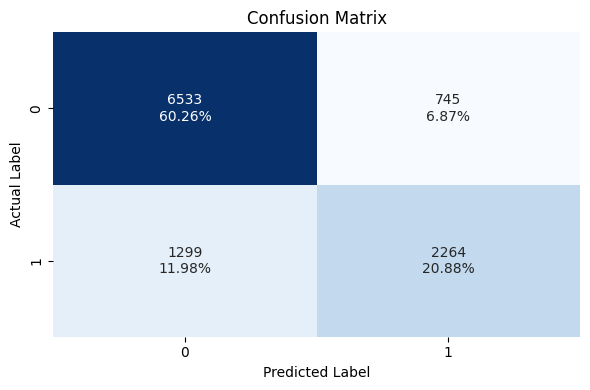

In [ ]:
print("Confusion matrix of initial model on test data:\n")
plot_confusion_matrix_statsmodels(lg, X_test_with_const, y_test)


------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Test data confusion matrix observations:**

***True Negatives (TN = 6533, 60.26%)***  
* The model correctly predicted about 60% of the bookings that were not cancelled. This shows strong performance for identifying the majority class 0 - non-cancellations.  

***True Positives (TP = 2264, 20.88%)***  
* The model correctly identified around 21% of all actual cancellations.
* This shows the model's ability to detect actual cancellations (class 1) in the test data.

***False Negatives (FN = 1299, 11.98%)***  
* This means these are actual cancellations that were incorrectly predicted as non-cancellations.
* The model missed about 12% of actual cancellations. This can cause problems like overbooking.  

***False Positives (FP = 745, 6.87%)***  
* The model incorrectly predicted about 7% of non-cancellations as cancellations.
* This may lead to lost revenue by holding back rooms unnecessarily.  

***Class imbalance is handled decently***  
* Even though the target is imbalanced, with around 33% cancellations, the model captures the minority class (cancellations) with reasonable precision and recall.  


##**Buildding Decision Tree Classifier**

Now, we will build the initial decision tree classifier.

* Note: **Decision Trees do not require feature scaling** as they divide based on feature thresholds regardless of magnitude.
 * There is no requirement for a constant (intercept) column because Decision Trees do not fit linear equations.  They use hierarchical rule-based splits and avoid biased words.

In [ ]:
dt_model1 = DecisionTreeClassifier(random_state=1)
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

###**Initial Decision Tree Performance Evaluation**

####**Evaluate Performance on Training Set**

In [ ]:
# Evaluate on train
print("Train performance of Initial Decision tree:\n")
dt1_train = evaluate_classification_model_statsmodels(dt_model1, X_train, y_train)
dt1_train

Train performance of Initial Decision tree:



Accuracy    Recall  Precision        F1
0  0.994149  0.984417   0.997674  0.991001

**Training Performance Observations of Initial Decision Tree:**

***Accuracy is about 99.41%***

* The model correctly classifies the booking status for over 99% of the training data.

* This high accuracy suggests that the model has learned the patterns in the training data well.

***Recall is about 98.44%***

* The model successfully identifies around 98% of actual cancellations.

* This means very few cancellations are missed by the model in the training data.

***Precision is around 99.76%***

* Out of all the bookings the model predicted as cancellations, almost 100% were actual cancellations.

* This shows there are very few false positives, meaning it rarely predicts a cancellation when there isn't one.

***The F1 Score is about 99.10%***

* This F1 score is very high, indicating a strong balance between precision and recall.

* It confirms that the model performs excellently on training data for both identifying and correctly classifying cancellations.

**Interpretation:**

* While these metrics show strong performance on the training data, the very high values might indicate overfitting. The model may not generalize well to unseen test data.

* We will compare this with test data and adjust the model if needed, such as by pruning.

####**Confusion Matrix for Training Data**

Confusion matrix of initial decision tree on training data:



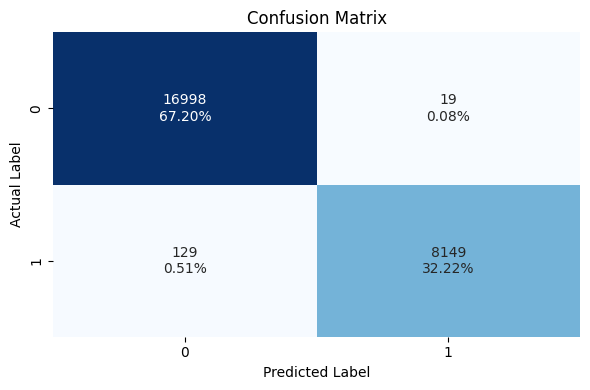

In [ ]:
print("Confusion matrix of initial decision tree on training data:\n")
plot_confusion_matrix_statsmodels(dt_model1, X_train, y_train)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Train data confusion matrix observations of Initial Decision Tree:**

***True Negatives (TN = 16,998, 67.20%)***

* The model accurately predicted about 67% of non-cancelled bookings.

* This indicates strong performance for class 0 (no cancellation).

***True Positives (TP = 8149, 32.22%)***

* The model correctly identified around 32% of total bookings as actual cancellations.

* The high TP count shows a strong ability to detect cancellations.

***False Negatives (FN = 129, 0.51%)***

* Only about 0.5% of actual cancellations were missed.

* This means there is a very low risk of overbooking due to missed cancellations.

***False Positives (FP = 19, 0.08%)***

* Only 19 non-cancelled bookings were wrongly predicted as cancelled.

* This suggests minimal revenue loss from incorrectly held inventory.

**Interpretation:**
* The confusion matrix shows very low rates of misclassification for both false positives and false negatives.

* This supports earlier metrics (Accuracy, Recall, Precision, F1) that indicated very high performance.

* However, such nearly perfect classification on training data may suggest overfitting, which should be checked by assessing performance on the test data.

####**Evaluate Performance on Test Set**

In [ ]:
# Evaluate on test
print("Test performance of Initial Decision tree:\n")
dt1_test= evaluate_classification_model_statsmodels(dt_model1, X_test, y_test)
dt1_test

Test performance of Initial Decision tree:



Accuracy    Recall  Precision        F1
0  0.868278  0.791187   0.804739  0.797905

**Test Data Performance Observations of Initial Decision Tree:**

***Accuracy is about 86.82%***

* The model correctly classifies the booking status for over ~87% of the test data.

* This suggests that the model has learned relevant patterns from the training data and is performing well on unseen data.

***Recall is about 79.11%***

* The model successfully predicts around 79% of actual cancellations.
* This means very few cancellations are missed by the model in the test data, as missed cancellations can lead to overbooking.

***Precision is around 80.47%***

* Out of all the bookings the model predicted as cancellations, about 80% were actual cancellations.
* This indicates there are very few false positives, meaning it rarely predicts a cancellation when there isn't one.
* Thus, reducing the risk of unnecessary room holds.

***The F1 Score is about 79.79%***

* This F1 score is very high, indicating a strong balance between precision and recall.
* This shows a value close to 80% reflects strong classification capability for cancellations.


**Interpretation:**

* These metrics show that the model performs much better than a simple classifier, particularly in identifying cancellations.

* The drop in performance from training to testing is noticeable but not severe, which suggests some overfitting.

* In the next phase, we will look into model tuning, such as pruning, to improve generalization and stability on new data.

####**Confusion Matrix for Test Data**

Confusion matrix of initial decision tree on test data:



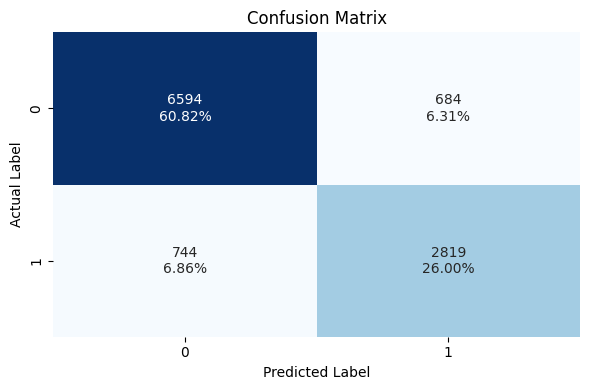

In [ ]:
print("Confusion matrix of initial decision tree on test data:\n")
plot_confusion_matrix_statsmodels(dt_model1, X_test, y_test)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Test data confusion matrix observations of Initial Decision Tree:**

***True Negatives (TN = 6594, 60.82%)***

* The model correctly predicted that 6594 bookings were not cancelled, making this the largest group.

* This indicates that the model is effective at identifying non-cancellations.

***True Positives (TP = 2819, 25.85%)***

* The model accurately identified 2819 cancellations, meaning about 26% of the total records were correctly labeled as cancellations.

* This is a strong result for the positive class, which is our main focus.

***False Negatives (FN = 744, 6.31%)***

* These are actual cancellations that the model missed and marked as not cancelled.

* This can lead to overbooking risks, so it's essential to reduce these numbers.

***False Positives (FP = 684, 6.15%)***

* These are cases where the model predicted a cancellation, but the booking was actually completed.

* While not as serious as false negatives, this can still create unnecessary holds on room availability.

**Interpretation:**
* The decision tree works well for both classes.

* It correctly captures a large share of true cancellations (TP) and keeps both types of errors (FP and FN) relatively low.

* These results match well with the earlier performance metrics (recall and precision), strengthening the model's reliability in handling cancellation predictions.

* However, compared to the training set, the test set shows a drop in performance, particularly with an increase in false positives and false negatives. This is expected because of possible overfitting on the training data. We will tackle this in the model improvement phase by using pruning optimization.

#**Model Performance Improvement**

##**Logistic Regression - Dealing with Multicollinearity**

###**Multicollinearity Check**

In [ ]:
# Function to compute VIF as a Series
def get_vif_series(idf):
    """
    Computes VIF for each feature and returns as a Series.
    """
    vif_values = [
        variance_inflation_factor(idf.values, i) for i in range(idf.shape[1])
    ]
    vif_series = pd.Series(vif_values, index=idf.columns, dtype=float)
    return vif_series




**Calculating VIF**

In [ ]:
# Call it using training data
vif_series = get_vif_series(X_train_with_const)

# Display
print("Variance Inflation Factors :\n")
print(vif_series.apply(lambda x: f"{x:.5f}"))

Variance Inflation Factors :

const                                    1.00000
required_car_parking_space               1.03701
lead_time                                1.36620
arrival_year                             1.42275
arrival_month                            1.27778
arrival_date                             1.00648
repeated_guest                           1.78862
no_of_previous_cancellations             1.34601
no_of_previous_bookings_not_canceled     1.62399
avg_price_per_room                       1.98841
no_of_special_requests                   1.25923
family_size                              1.64489
total_stay                               1.10235
type_of_meal_plan_Meal Plan 2            1.24954
type_of_meal_plan_Meal Plan 3            1.01545
type_of_meal_plan_Not Selected           1.26903
room_type_reserved_Room_Type 2           1.03017
room_type_reserved_Room_Type 3           1.00301
room_type_reserved_Room_Type 4           1.33092
room_type_reserved_Room_Type 5         

* We can observe market_segment_type_Corporate,     market_segment_type_Offline and
market_segment_type_Online have VIF > 5. We will remove features having VIF>5

###**Removing Features with VIF>5**

In [ ]:
#Make copies of scaled data (for VIF handling)
X_train_sc1 = X_train_sc.copy()
X_test_sc1 = X_test_sc.copy()

# Add constant temporarily for VIF calculation
X_train_sc1_with_const = sm.add_constant(X_train_sc1, has_constant='add')

# Calculate VIF
vif_result = get_vif_series(X_train_sc1_with_const)

# Drop columns with VIF > 5 from scaled data only (not the constant)
while vif_result.drop(labels='const', errors='ignore').max() > 5:
    # Get the column with the highest VIF (excluding constant)
    high_vif_column = vif_result.drop(labels='const', errors='ignore').idxmax()

    print(f"Dropping '{high_vif_column}' due to high VIF = {vif_result[high_vif_column]:.4f}")

    # Drop from scaled copies (not the one with constant)
    X_train_sc1.drop(columns=high_vif_column, inplace=True)
    X_test_sc1.drop(columns=high_vif_column, inplace=True)

    # Recalculate VIF with updated data + constant
    X_train_sc1_with_const = sm.add_constant(X_train_sc1, has_constant='add')
    vif_result = get_vif_series(X_train_sc1_with_const)

# Final output
print("\nFinal VIF Results:")
print(vif_result.apply(lambda x: f"{x:.5f}"))

Dropping 'market_segment_type_Online' due to high VIF = 66.5860

Final VIF Results:
const                                   1.00000
required_car_parking_space              1.03689
lead_time                               1.36048
arrival_year                            1.41976
arrival_month                           1.27662
arrival_date                            1.00647
repeated_guest                          1.78570
no_of_previous_cancellations            1.34592
no_of_previous_bookings_not_canceled    1.62359
avg_price_per_room                      1.98756
no_of_special_requests                  1.25407
family_size                             1.62678
total_stay                              1.10102
type_of_meal_plan_Meal Plan 2           1.24922
type_of_meal_plan_Meal Plan 3           1.01545
type_of_meal_plan_Not Selected          1.26642
room_type_reserved_Room_Type 2          1.03017
room_type_reserved_Room_Type 3          1.00301
room_type_reserved_Room_Type 4          1.32694
room

**Observations:**

* We can see 'market_segment_type_Online' feature was dropped due to high VIF = 66.59 both from train and test data set.
* After dropping the high VIF feature, we can see that the remaining features have VIF < 5


###**Dealing with high p-value variables**

Some of the features have very high p value i.e. > 0.05 . So, they are not significant features and we'll drop them one at a time as sometimes p-values change after dropping a variable
* We will do the following:
    * Build a model, check the p-values of the variables, and drop that variable from our dataset.
    * Re-fit the model using the updated dataset (with the dropped column).
    * Repeat the above two steps till there are no columns with p-value > 0.05




In [ ]:
# Initial list of predictors (with constant added)
predictors = X_train_with_const.copy()
cols = predictors.columns.tolist()

# Lists to track dropped and retained features
dropped_features = []
selected_features = []

# Loop until all p-values are below 0.05
while len(cols) > 0:
    # Subset the training data
    x_train_aux = predictors[cols]

    # Fit the logistic regression model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # Get p-values & max p-value
    p_values = model.pvalues
    max_p_value = p_values.max()
    feature_with_p_max = p_values.idxmax()

    # Drop feature if its p-value > 0.05
    if max_p_value > 0.05:
        print(f"Dropping column '{feature_with_p_max}' with p-value: {max_p_value:.4f}")
        dropped_features.append(feature_with_p_max)
        cols.remove(feature_with_p_max)
    else:
        print("All remaining features have p-values ≤ 0.05")
        break

# Final list of selected features
selected_features = cols

# Summary printout
print("\nDropped features due to high p-values:")
print(dropped_features)

print("\nRetained features with significant p-values:")
print(selected_features)


Dropping column 'type_of_meal_plan_Meal Plan 3' with p-value: 0.9998
Dropping column 'market_segment_type_Complementary' with p-value: 0.9998
Dropping column 'room_type_reserved_Room_Type 3' with p-value: 0.8909
Dropping column 'arrival_date' with p-value: 0.3123
Dropping column 'no_of_previous_bookings_not_canceled' with p-value: 0.2086
Dropping column 'market_segment_type_Online' with p-value: 0.1824
All remaining features have p-values ≤ 0.05

Dropped features due to high p-values:
['type_of_meal_plan_Meal Plan 3', 'market_segment_type_Complementary', 'room_type_reserved_Room_Type 3', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'market_segment_type_Online']

Retained features with significant p-values:
['const', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'family_size', 'total_stay', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Sele

**Observations:**

* Now we will be preparing refined train and test datasets to build an updated regression model with only significant features that are left after we dropped the bad features.

In [ ]:
#Subset train and test using selected features
X_train_significant = X_train_with_const[selected_features]
X_test_significant = X_test_with_const[selected_features]
X_train_significant.head(10)

const  required_car_parking_space  lead_time  arrival_year  arrival_month  \
0    1.0                   -0.178610   0.397033      0.468891      -1.756718   
1    1.0                    5.598799  -1.011698      0.468891      -2.081898   
2    1.0                   -0.178610   0.115287      0.468891      -0.781178   
3    1.0                   -0.178610   0.458282     -2.132690       0.194362   
4    1.0                   -0.178610   0.776778      0.468891       0.194362   
5    1.0                   -0.178610   0.029538      0.468891      -0.130818   
6    1.0                   -0.178610  -0.791201      0.468891       0.519542   
7    1.0                   -0.178610   0.066288      0.468891       0.844722   
8    1.0                   -0.178610   0.507282      0.468891       0.194362   
9    1.0                   -0.178610   2.148759      0.468891      -0.781178   

   repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
0       -0.161245                     -0.064178           -1.276201   
1       -0.161245                     -0.064178            2.354667   
2       -0.161245                     -0.064178            0.519400   
3       -0.161245                     -0.064178           -0.803273   
4       -0.161245                     -0.064178            0.489804   
5       -0.161245                     -0.064178            1.064031   
6       -0.161245                     -0.064178           -0.238810   
7       -0.161245                     -0.064178           -0.673599   
8       -0.161245                     -0.064178            0.185299   
9       -0.161245                     -0.064178           -0.391368   

   no_of_special_requests  family_size  total_stay  \
0               -0.785462    -1.456631   -0.004070   
1                0.493638     3.155011    0.555470   
2               -0.785462     0.080583    1.115010   
3               -0.785462     0.080583   -0.004070   
4                0.493638     0.080583    6.150873   
5                1.772737     1.617797    0.555470   
6                0.493638     0.080583   -0.004070   
7               -0.785462     0.080583    0.555470   
8               -0.785462    -1.456631   -0.004070   
9               -0.785462     0.080583   -0.004070   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
0                      -0.316489                       -0.405306   
1                      -0.316489                       -0.405306   
2                      -0.316489                       -0.405306   
3                      -0.316489                       -0.405306   
4                      -0.316489                       -0.405306   
5                      -0.316489                       -0.405306   
6                      -0.316489                       -0.405306   
7                      -0.316489                       -0.405306   
8                      -0.316489                       -0.405306   
9                      -0.316489                       -0.405306   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
0                       -0.124975                       -0.453574   
1                       -0.124975                       -0.453574   
2                       -0.124975                       -0.453574   
3                       -0.124975                       -0.453574   
4                       -0.124975                        2.204711   
5                       -0.124975                        2.204711   
6                       -0.124975                       -0.453574   
7                       -0.124975                       -0.453574   
8                       -0.124975                       -0.453574   
9                       -0.124975                       -0.453574   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                       -0.083945                       -0.163807   
1                       -0.083945                        6.104734   
2                       -0.08

###**Training the logistic Regression model with only significant features**

In [ ]:
Lg_tuned = sm.Logit(y_train, X_train_significant).fit()
print(Lg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.428609
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25275
Method:                           MLE   Df Model:                           19
Date:                Fri, 01 Aug 2025   Pseudo R-squ.:                  0.3221
Time:                        19:14:51   Log-Likelihood:                -10842.
converged:                       True   LL-Null:                       -15992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1558      0.021    -54.731     

**Observations on Tuned Logistic Regression Model:**

***Model Convergence***
* The logistic regression model converged successfully in 9 iterations. This shows stable optimization.

***Model Fit***
* The log-likelihood value is -10842.0. The Pseudo R² is 0.3221. This suggests the model explains about 32.21% of the variation in the dependent variable.

***Model Significance***  
* The LLR p-value is 0.000. This indicates the model is statistically significant overall.

***Statistically Significant Predictors***  
* All predictors in the model have p-values less than 0.05.
* This makes them statistically significant contributors to predicting booking cancellations.

***Direction and Strength of Predictors***  

* required_car_parking_space has a negative coefficient (-0.2734). Customers who require car parking space are less likely to cancel.  
* lead_time has a strong positive effect (1.3153). Longer lead time increases the chance of cancellation.  
* arrival_year shows a positive association (0.1682) with cancellations, while arrival_month shows a negative effect (-0.1278).  
* repeated_guest has a negative coefficient (-0.3362). This means repeat customers are less likely to cancel.  
*  no_of_previous_cancellations has a mild positive effect (0.0578). Customers with past cancellations are slightly more likely to cancel again.  
* avg_price_per_room is positively related to cancellations (0.6468). This suggests that expensive bookings are more likely to be canceled.  
* no_of_special_requests has a strong negative effect (-1.1203). This indicates that these guests are less likely to cancel.  
* family_size and total_stay both have small positive effects (0.0471 and 0.1013).  

***Meal plan, room type, and market segment dummies***
* All mostly show small but significant effects. For example:  
 *  type_of_meal_plan_Not Selected (0.0959) increases the likelihood of cancellation.  
 *  room_type_reserved_Room_Type 4 (-0.1062) decreases the chance of cancellation.  
 * market_segment_type_Offline (-0.7993) strongly reduces the chance of cancellation.  

**Interpretability:**  

* The model is now easier to understand with stable coefficients and clear effects from all predictors.
* The lack of large standard errors or undefined estimates supports the model's reliability.

###**Coefficient Interpretation Using Odds for Tuned Model**

In [ ]:
odds_tuned = np.exp(Lg_tuned.params)
perc_change_tuned_odds = (np.exp(Lg_tuned.params) - 1) * 100
tuned_odds_df = pd.DataFrame({
    "Odds": odds_tuned,
    "Change in Odds (%)": perc_change_tuned_odds
})
tuned_odds_df.T

const  required_car_parking_space   lead_time  \
Odds                 0.314818                    0.760777    3.725733   
Change in Odds (%) -68.518249                  -23.922301  272.573267   

                    arrival_year  arrival_month  repeated_guest  \
Odds                    1.183208       0.880050        0.714503   
Change in Odds (%)     18.320823     -11.994985      -28.549704   

                    no_of_previous_cancellations  avg_price_per_room  \
Odds                                    1.059500             1.90938   
Change in Odds (%)                      5.950043            90.93796   

                    no_of_special_requests  family_size  total_stay  \
Odds                              0.326191     1.048268    1.106586   
Change in Odds (%)              -67.380861     4.826832   10.658646   

                    type_of_meal_plan_Meal Plan 2  \
Odds                                     1.057187   
Change in Odds (%)                       5.718750   

                    type_of_meal_plan_Not Selected  \
Odds                                      1.100597   
Change in Odds (%)                       10.059735   

                    room_type_reserved_Room_Type 2  \
Odds                                      0.963812   
Change in Odds (%)                       -3.618781   

                    room_type_reserved_Room_Type 4  \
Odds                                      0.899278   
Change in Odds (%)                      -10.072172   

                    room_type_reserved_Room_Type 5  \
Odds                                      0.935395   
Change in Odds (%)                       -6.460506   

                    room_type_reserved_Room_Type 6  \
Odds                                      0.907013   
Change in Odds (%)                       -9.298679   

                    room_type_reserved_Room_Type 7  \
Odds                                      0.948007   
Change in Odds (%)                       -5.199295   

                    market_segment_type_Corporate  market_segment_type_Offline  
Odds                                     0.827730                     0.449663  
Change in Odds (%)                     -17.226965                   -55.033653

**Observations on Coefficient Odds (Tuned Logistic Regression Model):**  

These observations are from the tuned model after filtering for VIF and p-values, followed by the calculation of odds.

**lead_time**  
* Final Odds = 3.73 → 272.57% increase in odds of cancellation  
* This remains the strongest predictor. A longer lead time significantly increases cancellation risk, just as in the initial model.

**required_car_parking_space**  
* Final Odds = 0.76 → about 23.92% decrease  
* This continues to lower cancellation likelihood, supporting the idea that guests with specific needs, like parking, are more committed.

**Repeated Guest**  
* Final Odds = 0.71 → about 28.55% lower odds  
* Being a loyal customer reduces the likelihood of cancellation further, with a slightly stronger effect in the final model compared to the initial model (which was about 23%).

**No. of Previous Cancellations**  
* Final Odds = 1.06 → about 5.95% increase  
* This is slightly higher than the initial model (approximately 7.21%) but still shows a risk of repeat cancellations.

**Average Price Per Room**  
* Final Odds = 1.91 → about 90.94% higher odds  
* This variable now shows a stronger influence on cancellation compared to the initial model (which was around 88.23%), possibly due to corrections for multicollinearity.

**No. of Special Requests**  
* Final Odds = 0.33 → about 67.38% lower odds  
* The effect remains strong and consistent. Customers who make special requests are much less likely to cancel; they are more invested.

**Family Size**  
* Final Odds = 1.05 → about 4.83% increase  
* This shows a small increase in cancellation odds, likely due to the complexity of family plans.

**Total Stay**  
* Final Odds = 1.11 → about 10.66% higher odds  
* This is similar to earlier results (which was about 10.34%). Longer stays may require more commitment and are more likely to be canceled.

**Meal Plan (Compared to Meal Plan 1 - Reference)**  
  * Meal Plan 2  
      * Final Odds = 1.06 → about 5.72% increase  
      * This is slightly lower than the initial figure (which was around 6.03%) but still increases the risk of cancellation.  

    * Not Selected  
      * Final Odds = 1.10 → about 10.06% increase  
      * This is very similar to the initial model (which was around 9.62%). Guests who avoid meal plans may be less committed.

**Room Type (Compared to Room Type 1)**  
  * Room Type 2 to Room Type 7  
    * All show odds less than 1, ranging from 0.89 to 0.96 → 3.6% to 10% lower odds  
    * They still show protection against cancellation, consistent with the initial model. Most notably:  

  * Room Type 5 → 10.07% lower odds  

    * Room Type 6 → 6.46% lower odds  

    * Room Type 7 → 9.30% lower odds  

**Market Segment (Compared to Online - likely reference)**  
   * Corporate  
       * Final Odds = 0.83 → about 17.23% decrease  
       * This shows a slightly larger reduction than before (around 6.45%), but it is still significant.  

   * Offline  
      * Final Odds = 0.45 → about 55.03% decrease  
      * Offline guests are much less likely to cancel, consistent with the previous strong effect (which was around 57.99%).

**Conclusion:**  
* The overall pattern of cancellation drivers remains the same, but after removing multicollinear and non-significant features, the effect sizes became more stable.  
* Lead time, average price, and special requests remain the top three strongest predictors.  
* The odds are now more reliable as they come from a clearer and statistically sound model.

### **Determining optimal threshold using ROC-AUC Curve**

**Now, we will plot ROC curve.**

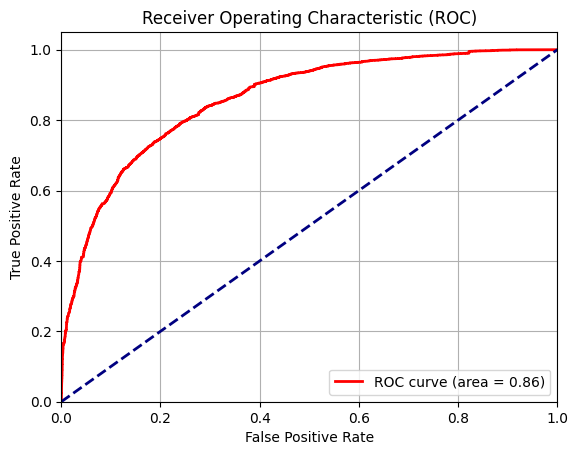

In [ ]:
y_pred = Lg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**We will now finding optimal threshold.**

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_lg = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_lg)


Optimal Threshold:  0.302


**Observations on ROC curve & Optimal Threshold of Tuned Logistic model:**

* The ROC curve (red line) shows how the model performs across different threshold values by plotting True Positive Rate (TPR) against False Positive Rate (FPR).

* The area under the curve (AUC = 0.86) indicates excellent model performance. It is close to 1.0, which suggests the model distinguishes well between classes.

* The navy blue dashed diagonal line represents a random classifier (AUC = 0.5). Our model performs significantly better than random.

* The optimal threshold, calculated using the formula argmax(TPR - FPR), is 0.302.

**Interpretation of ROC Curve & Optimal Threshold:**  
***AUC = 0.86:***  
* This means there's an 86% chance that the model will rank a randomly chosen positive class (booking cancelled) higher than a randomly chosen negative one (not cancelled). An AUC above 0.80 is generally considered very good.

***Interpretation of Threshold = 0.302***  

* If the model's predicted probability for a booking is greater than or equal to 0.302, classify it as "Cancelled."

* If it's less than 0.302, classify it as "Not Cancelled."

* This threshold is lower than the default 0.5, which means the model is now more sensitive to detecting cancellations. It prioritizes fewer false negatives, meaning it misses fewer actual cancellations.

### **Checking tuned Logistic Regression model performance**

####**Train performance**

**Train data performance on tuned logistic model.**

In [ ]:
print("Performance of trained data on tuned logistic regression model:\n")
lg_tune_perf_train = evaluate_classification_model_statsmodels(
    Lg_tuned, X_train_significant, y_train, optimal_threshold_lg
)
lg_tune_perf_train

Performance of trained data on tuned logistic regression model:



Accuracy    Recall  Precision        F1
0  0.770666  0.789442   0.616917  0.692597

**Performance observations of tuned regression model on trained data:**

***Accuracy = 77.1%***
* The model correctly predicted booking cancellation status for 77.1% of the training samples.

***Recall = 78.9%***
* The model successfully identified 78.9% of all actual cancellations (positive class).
* This is important because our goal is to detect cancelled bookings.

***Precision = 61.7%***
* Of all bookings the model predicted as cancelled, 61.7% were actually cancelled.
* This indicates some false positives, but it is acceptable given the high recall.

***F1 Score = 69.3%***
* The harmonic mean of precision and recall shows a good balance between identifying cancellations and avoiding false alarms.

**Interpretation:**
* The tuned logistic regression model performs well on the training data, with high recall supporting the project goal of identifying cancelled bookings.
* While precision is moderate, the overall F1-score of about 69% reflects a fair trade-off.
* These results show that the model has learned relevant patterns in the training data.
* We will next validate its performance using test data.

**Confusion matrix of tuned logistic regression model on train dataset.**

Confusion matrix of tuned regression model on train data:



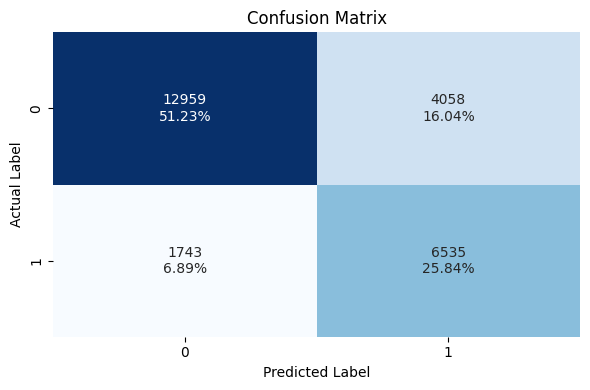

In [ ]:
print("Confusion matrix of tuned regression model on train data:\n")

plot_confusion_matrix_statsmodels(Lg_tuned, X_train_significant, y_train, optimal_threshold_lg)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Train data confusion matrix observations of tuned logistic regression model:**

***True Negatives (TN = 12959, 51.23%)***

* The model accurately predicted about 51% of non-cancelled bookings.

* This indicates decent performance for class 0 (no cancellation) though lower than initial model.

***True Positives (TP = 6535, 25.84%)***

* The model correctly identified around 26% of total bookings as actual cancellations.

* Decent detection of cancellations, though lower than initial model.

***False Negatives (FN = 1743, 6.89%)***

* Only about 7% of actual cancellations were missed.

* This means there is a slight risk of overbooking due to missed cancellations.

***False Positives (FP = 4058, 16.04%)***

* Around 16% non-cancelled bookings were wrongly predicted as cancelled.

* This suggests more revenue loss from incorrectly held inventory.

**Interpretation:**
* The tuned model demonstrates a better balance between precision and recall, which improves the F1 score.  

* Even though misclassifications (FP, FN) are higher than in the initial model, the first model was probably overfitted, achieving near-perfect results on training data.  

* This tuned version should generalize better, and we will confirm this through its performance on test data.  

**Comparison with Initial Model:**
* The initial model achieved nearly perfect training accuracy. However, the tuned model reflects a more realistic performance and has better potential for generalization.  

* This trade-off is intentional and necessary to prevent overfitting and to better represent true performance on unseen data.

####**Test Performance**

**Test data performance on tuned logistic model.**

In [ ]:
print("Performance of test data on tuned logistic regression model:\n")
lg_tune_perf_test = evaluate_classification_model_statsmodels(
    Lg_tuned, X_test_significant, y_test, optimal_threshold_lg
)
lg_tune_perf_test

Performance of test data on tuned logistic regression model:



Accuracy    Recall  Precision        F1
0  0.775851  0.800449   0.623933  0.701254

**Performance observations of tuned regression model on test data:**

***Accuracy = 77.6%***

* The model correctly predicted the booking cancellation status for 77.6% of the test samples.

* This is slightly higher than the training accuracy, which shows consistent generalization.

***Recall = 80.0%***

* The model successfully identified 80.0% of actual cancellations, which is even higher than the training recall.

* This highlights the model's strength in capturing the positive class (cancelled bookings) and supports the business goal.

***Precision = 62.4%***

* Of all the bookings predicted as cancelled, 62.4% were actually cancelled.

* This reflects a manageable number of false positives while focusing on high recall.

***F1 Score = 70.1%***

* The F1 score improved slightly on the test set, indicating a good balance between precision and recall.

* This suggests the model is neither overfitting nor underfitting and manages class imbalance fairly well.

**Interpretation & Improvement Comparison:**
* The test performance is slightly better than the training performance, especially in recall and F1 score.

* This means the tuned logistic regression model has generalized well to unseen data, which is an important goal of model tuning.

* Compared to the initial model (which faced convergence and multicollinearity issues), the tuned model provides cleaner and more stable predictions and avoids overfitting despite a drop in training metrics.

* With a high recall of about 80% and improved F1 of around 70% on the test set, the model is effective at identifying bookings likely to be cancelled.

**Conclusion:**
* Overall, the tuned logistic regression model not only fixed the instability issues of the initial model but also showed better generalization and maintained strong recall performance, making it reliable for predicting cancellations.

**Confusion matrix of tuned logistic regression model on test dataset.**

Confusion matrix of tuned regression model on test data:



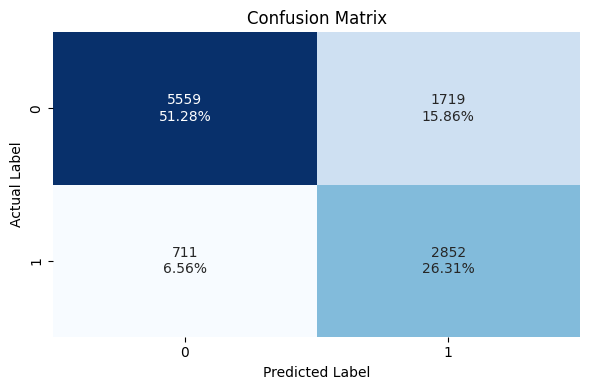

In [ ]:
print("Confusion matrix of tuned regression model on test data:\n")

plot_confusion_matrix_statsmodels(Lg_tuned, X_test_significant, y_test, optimal_threshold_lg)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Test data confusion matrix observations of tuned logistic regression model:**

***True Negatives (TN = 5559, 51.28%)***  
* The model correctly identified 51.28% of the non-cancelled bookings.  
* This shows it captures most class 0 instances, though there is a slight drop from the initial model.  

***True Positives (TP = 2852, 26.31%)***  
* About 26.3% of the total samples were correctly classified as cancellations.  
* This indicates a strong ability to identify the positive class (cancelled bookings), which matches the project's goal.  

***False Negatives (FN = 711, 6.56%)***  
* 6.56% of actual cancellations were missed and were predicted as non-cancelled.  
* These are risky because they could lead to overbooking and unhappy customers.  

***False Positives (FP = 1719, 15.86%)***  
* 15.86% of non-cancelled bookings were wrongly predicted as cancellations.  
* This could cause revenue loss from blocked inventory, but the level is acceptable given the high recall.  

**Interpretation & Comparison with Trained Model:**  
* Compared to the training data confusion matrix, the model performs slightly better on the test data, especially in:  
  * Recall (80.0%)  
  * F1-Score (70.1%)  

* The drop in false positives and false negatives from training to test indicates that the model generalizes well and maintains consistent performance.  

* The trade-off between slightly lower precision and higher recall is acceptable here because identifying cancellations is the main objective, and high recall ensures fewer missed cancellations.  

**Comparison with Initial (Untuned) Model:**  
* The initial model may have shown better metrics on the training data due to overfitting, but such performance often fails on test data.  

* In contrast, this tuned model provides stable, interpretable, and more reliable results, even though some metrics like accuracy or precision seem slightly lower.  

**Conclusion:**  
* Ultimately, the tuned logistic regression model offers a balanced, generalizable, and practical solution for predicting booking cancellations.  

####**Improved (Tuned) Logistic Model Summary**

* After applying feature selection and optimizing the threshold with the ROC curve, the logistic regression model showed a significant improvement.
* It achieved an F1-score of around 70% on unseen data. The model also reached a high recall of about 80%. This allows the business to identify potential cancellations early while reducing false predictions and related revenue losses.

* In the next step, we plan to further improve the model's precision and recall balance. We will explore the best threshold using the Precision-Recall Curve, as false positives can also incur business costs.

### **Determining Better threshold using Precision-Recall Curve**

In the previous step, we chose the best threshold using the ROC Curve. This curve balances the trade-off between sensitivity (Recall) and specificity (1 - False Positive Rate).
However, in real-world classification problems, especially those with moderately imbalanced classes or when Precision and Recall are both vital, it helps to look at the Precision-Recall Curve. This curve helps us find a threshold that maximizes the F1-score.

This step improves the model's overall effectiveness, particularly when false positives and false negatives affect the business.

In this step, we:

* Use the predicted probabilities from the training set.
* Generate the Precision-Recall curve.
* Calculate the F1-score for each threshold.
* Select the threshold that gives the highest F1-score.
* Visualize how Precision, Recall, and F1 change with the threshold.


Best Threshold (Max F1): 0.358
Precision: 0.657
Recall: 0.738
F1 Score: 0.695


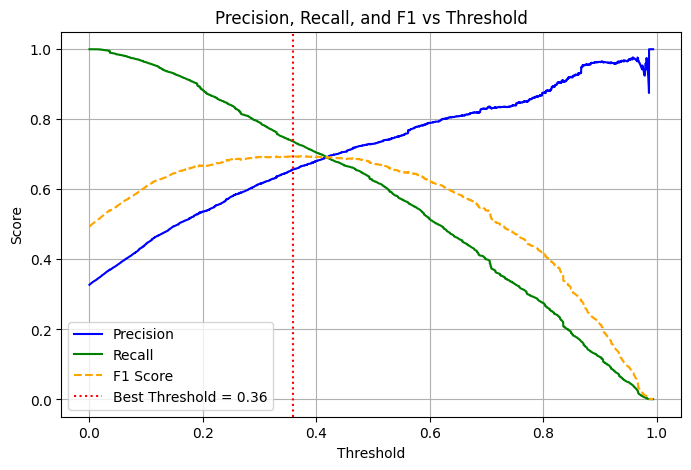

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score


# Predicted probabilities on training data
y_train_probs = Lg_tuned.predict(X_train_significant)

# Generate Precision, Recall, and Thresholds for PR curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_probs)

# Compute F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the threshold with the highest F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\nBest Threshold (Max F1): {best_threshold:.3f}")
print(f"Precision: {precision[best_idx]:.3f}")
print(f"Recall: {recall[best_idx]:.3f}")
print(f"F1 Score: {f1_scores[best_idx]:.3f}")

# Plot Precision, Recall, and F1 Score vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='orange', linestyle='--')
plt.axvline(x=best_threshold, color='red', linestyle=':', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


**Observations on Precision-Recall curve & Optimal Threshold of Tuned Logistic model:**

* From the Precision-Recall vs Threshold curve, the best threshold to maximize the F1-score is 0.358. At this threshold:

* Precision is about 65.7%, which means around two-thirds of predicted cancellations are correct.

* Recall is around 73.8%, showing the model captures a large number of actual cancellations.

* The F1-score is 69.5%, indicating a good balance between precision and recall.

* This threshold is a bit higher than the ROC-based threshold of 0.302.
* It focuses on improving overall prediction quality instead of just balancing sensitivity and specificity.
* Using this threshold may improves the model's ability to detect cancellations while reducing false alarms.
* This will make it better for business decisions, where both missed cancellations and unnecessary actions can be costly.

#### **Checking model performance on training set using threshold = 0.358**

In [ ]:
print(f"Performance on trained data on tuned logistic regression model with best threshold - {best_threshold:.3f}:\n")
lg_tune_perf_train1 = evaluate_classification_model_statsmodels(
    Lg_tuned, X_train_significant, y_train, best_threshold
)
lg_tune_perf_train1

Performance on trained data on tuned logistic regression model with best threshold - 0.358:



Accuracy    Recall  Precision        F1
0  0.788021  0.737497   0.656875  0.694855

**Observations on train data for tuned logistic regression model with threshold = 0.358:**

* The model achieved an accuracy of 78.8%, showing a slight improvement over the previous version.

* Precision increased to 65.7%, which reduced the number of false positives, meaning there are fewer incorrect cancellation predictions.

* Recall slightly decreased to 73.7%, indicating the model missed a few more actual cancellations than before.

* The F1-score improved marginally to 69.5%, which shows a better balance between precision and recall.

**Comparison with Tuned Logistic Regression Using ROC Curve Threshold = 0.302 (Train Data):**

* Compared to the ROC-based threshold model, which had an F1 of 69.3%, the PR-curve threshold model achieved a slightly better F1 score of 69.5%.

* It shows a clear improvement in precision, going from 61.7% to 65.7%, while recall slightly decreased, from 78.9% to 73.7%.

* This trade-off suggests that the model is now more cautious in flagging cancellations. This change could help reduce unnecessary intervention, though it comes with a minor cost in recall.




####**Confusion matrix on train set with threshold = 0.358**

Confusion matrix of tuned regression model on train data with best threshold - 0.358:



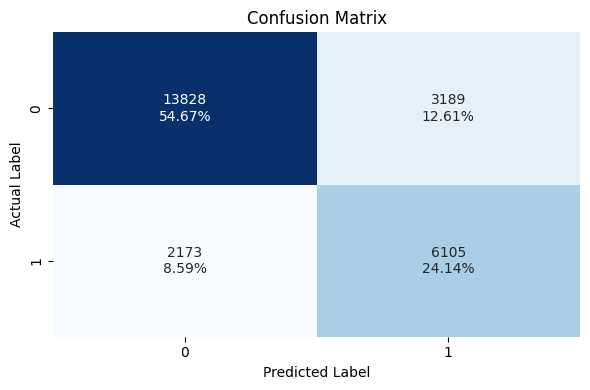

In [ ]:
print(f"Confusion matrix of tuned regression model on train data with best threshold - {best_threshold:.3f}:\n")

plot_confusion_matrix_statsmodels(Lg_tuned, X_train_significant, y_train, best_threshold)

**Observations on Confusion matrix train data for tuned logistic regression model with threshold = 0.358:**

* Most bookings were correctly identified as not canceled (13,828 TN).

* The model accurately detected 6,105 cancellations (TP), which is about 24.14% of the total data.

* False negatives (2,173) are relatively low, showing good recall.

* There are false positives (3,189), but they are manageable, which helps maintain a balanced precision.

* This matrix shows a solid balance between precision and recall, supporting the model's F1-score of about 0.695 on the training data.

**Comparison with ROC Threshold (Train Data):**  
* The ROC model had higher recall but lower precision, which means more bookings were predicted as canceled (increased TP, but also increased FP) and slightly lower F1 as compared to PR curve threshold.



In [ ]:
print(f"Performance on test data on tuned logistic regression model with best threshold - {best_threshold:.3f}:\n")
lg_tune_perf_test1 = evaluate_classification_model_statsmodels(
    Lg_tuned, X_test_significant, y_test, best_threshold
)
lg_tune_perf_test1

Performance on test data on tuned logistic regression model with best threshold - 0.358:



Accuracy    Recall  Precision        F1
0   0.79679  0.750491   0.670512  0.708251

**Observations on test data for tuned logistic regression model with threshold = 0.358:**

* The model achieved an accuracy of 79.7%, showing a clear rise in correct predictions compared to before.

* Precision improved significantly to 67.1%, which means fewer incorrect cancellation alerts were triggered.

* Recall slightly decreased to 75.0%, indicating the model identified slightly fewer true cancellations.

* The F1-score increased to 70.8%, reflecting a more balanced and reliable performance in predicting cancellations on unseen data.

**Comparison with Tuned Logistic Regression Using ROC Curve Threshold = 0.302 (Test Data):**
* The ROC-threshold model had an F1-score of 70.1%, while the PR-curve threshold model improved it slightly to 70.8%.

* Precision increased from 62.4% to 67.1%, showing a strong gain in reducing false positives.

* However, recall dropped from 80.0% to 75.0%, meaning the new model detects slightly fewer actual cancellations.

* Overall, the Precision-Recall Curve-based threshold model performs better than the ROC-based threshold model.
* It achieves a higher F1-score on both the train and test sets. Although it slightly reduces recall, the improvement in precision results in a more balanced and effective model.
* Since F1-score is the chosen evaluation metric, which balances the cost of false positives and false negatives, the PR threshold model better matches the business goal of minimizing revenue loss from misclassified cancellations.



####**Confusion matrix on test set with threshold = 0.358**

Confusion matrix of tuned regression model on test data with best threshold - 0.358:



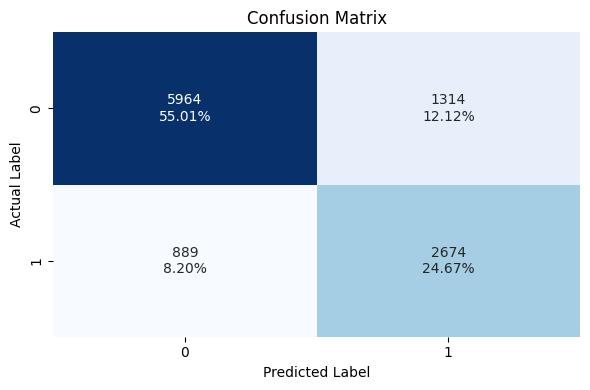

In [ ]:
print(f"Confusion matrix of tuned regression model on test data with best threshold - {best_threshold:.3f}:\n")

plot_confusion_matrix_statsmodels(Lg_tuned, X_test_significant, y_test, best_threshold)

**Observations on Confusion matrix test data for tuned logistic regression model with threshold = 0.358:**

***True Negatives (TN = 5964, 55.01%)***  
* The model correctly predicted about 55% of non-cancelled bookings.  
* This is slightly lower than the training TN of 51.23%, but it is an improvement over the ROC model.  

***True Positives (TP = 2674, 24.67%)***  
* The model identified 24.67% of total bookings as actual cancellations.  
* This is better than the ROC model, which had a detection rate of 24.14%.  

***False Negatives (FN = 889, 8.20%)***  
* The model missed 8.2% of actual cancellations.  
* This is lower than the ROC model, which had 889 compared to 2173 in training, meaning there is a reduced risk of overbooking.  

***False Positives (FP = 1314, 12.12%)***  
* About 12.1% of non-cancelled bookings were incorrectly predicted as cancelled.  
* This is similar to the ROC model, which had a rate of 12.61%, showing that false alarms are controlled.  

**Comparison with ROC confusion matrix on test data:**  
* The PR Curve Threshold model (threshold = 0.358) offers a better balance between precision and recall, achieving a higher F1-score that meets the project's evaluation metric.  
* While the ROC threshold improves recall, it comes with lower precision and F1-score.  


## **Decision Tree Classifier (pre-pruning and post-pruning)**

**Let's use pruning techniques to try & reduce overfitting.**

###**Decision Tree Pre-pruning**

**Using GridSearch for Hyperparameter Tuning of Our Tree Model**

* Hyperparameter tuning is challenging because we cannot directly determine how changing a hyperparameter value will affect our model's loss.
* Usually, we rely on experimentation. In this case, we will use Grid Search.
* Grid Search is a tuning method that aims to find the best values for hyperparameters.
* It involves a thorough search over specific parameter values of a model.
* The parameters of the estimator or model we use are optimized through cross-validated grid search over a parameter grid.

In [ ]:
# Choose the type of classifier.
dt_model_tuned1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          # Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               # Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                # Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned1, parameters, scoring=acc_scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(11),
                       max_leaf_nodes=100, random_state=1)

* The best parameters selected by doing GridSearch are : class_weight='balanced', max_depth=np.int64(11),max_leaf_nodes=100, random_state=1

###**Checking pre-pruned Decision Tree Classifier performance**

####**Train set performance evaluation.**

In [ ]:
dt_model_tuned1_perf_train = evaluate_classification_model_statsmodels(
    dt_model_tuned1, X_train, y_train
)
print("Pre-pruned train data performance:")
dt_model_tuned1_perf_train

Pre-pruned train data performance:


Accuracy    Recall  Precision        F1
0  0.854517  0.847669   0.743641  0.792255

**Performance Metric Observations (Train Data):**

***Accuracy = 85.45%***

* The model accurately predicted the booking status for over 85% of the samples.

* This indicates strong overall performance and effective learning from the training data.

***Recall = 84.77%***

* The model identified nearly 85% of all actual cancellations.

* This is crucial for the business as it helps minimize the risk of overbooking.

***Precision = 74.36%***

* Among the bookings predicted as canceled, about 74% were genuinely canceled.

* A good precision value means fewer false alarms and better revenue protection.

***F1 Score = 79.23%***

* The F1 score, which balances precision and recall, is above 79%.

* This confirms the model's reliability in handling class imbalance and making dependable predictions.

**Confusion matrix of pre-pruned decision tree on train data**

Confusion matrix of pre-pruned decision tree on train data:



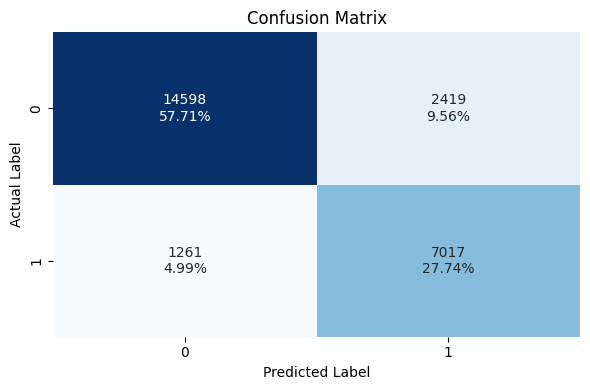

In [ ]:
print("Confusion matrix of pre-pruned decision tree on train data:\n")

plot_confusion_matrix_statsmodels(dt_model_tuned1, X_train, y_train)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Observations on Confusion matrix of pre-pruned decision tree on train data:**

**True Negatives (TN = 14,598, 57.71%)**  
* The model correctly identified about 57.7% of bookings as not cancelled.  
* This shows a strong ability to detect class 0.  

**True Positives (TP = 7,017, 27.74%)**  
* Around 28% of the total bookings were correctly identified as cancelled.  
* This indicates high sensitivity to the positive class, which is important for hotel operations.  

**False Positives (FP = 2,419, 9.56%)**  
* About 9.6% of non-cancelled bookings were wrongly predicted as cancellations.  
* This poses a risk of revenue loss due to blocked inventory.  

**False Negatives (FN = 1,261, 4.99%)**  
* Only about 5% of actual cancellations were missed.  
* This is very low and shows excellent control over missed cancellations, which is crucial for avoiding overbookings.

####**Test set performance evaluation.**

In [ ]:
dt_model_tuned1_perf_test = evaluate_classification_model_statsmodels(
    dt_model_tuned1, X_test, y_test
)
print("Pre-pruned test data performance:")
dt_model_tuned1_perf_test

Pre-pruned test data performance:


Accuracy    Recall  Precision        F1
0  0.850383  0.844232    0.73816  0.787641

**Performance Metric Observations (Test Data):**

***Accuracy = 85.04%***

* The model correctly predicted the booking status for 85.04% of the test samples.

* This shows that the model works well and maintains strong predictive power on new data.

***Recall = 84.42%***

* The model identified 84.42% of all actual cancellations in the test set.

* High recall means the model is effective at spotting potential cancellations, which fits with business goals.

***Precision = 73.82%***

* Among the bookings predicted as cancelled, about 74% were actually cancelled.

* This shows a low false positive rate and helps avoid lost revenue from over-predicting cancellations.

***F1 Score = 78.76%***

* The F1 score, which balances precision and recall, is close to 79%. This is very similar to the training score.

* This consistency suggests that the model is not overfitting or underfitting, and it manages class imbalance well.

**Comparison with Training Performance:**

* All four metrics, accuracy, recall, precision, and F1 score, on the test data are very close to the training values, with only slight drops (within 1%).

* This indicates a stable and well-optimized model with good generalization ability.

* The small decrease in precision and F1 is expected due to new data, but both remain high, showing excellent real-world usability.

**Confusion matrix of pre-pruned decision tree on test data**

Confusion matrix of pre-pruned decision tree on test data:



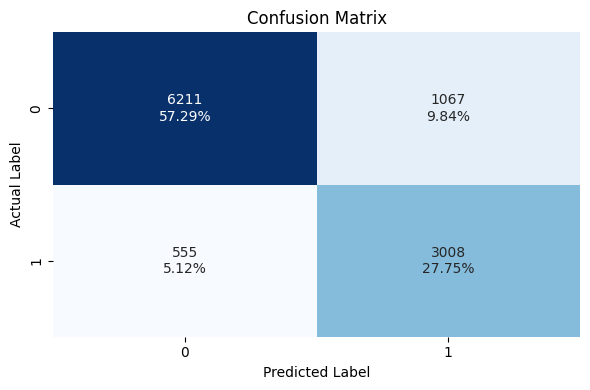

In [ ]:
print("Confusion matrix of pre-pruned decision tree on test data:\n")

plot_confusion_matrix_statsmodels(dt_model_tuned1, X_test, y_test)

------------------------------------------------------------------------------
**Note: A- actual , P-predicted**
* ***A1 P0 - FN (False negative)***
* ***A1 P1 - TP (True positive)***
* ***A0 P0 - TN (True negative)***
* ***A0 P1 - FP (False positive)***
------------------------------------------------------------------------------

**Observations on Confusion matrix of pre-pruned decision tree on test data:**

***True Negatives (TN = 6,211 | 57.29%)***
* The model correctly predicted 57.29% of non-cancelled bookings.

* This shows reliable classification for Class 0 (no cancellation).

***True Positives (TP = 3,008 | 27.75%)***
* About 28% of all test samples were correctly marked as cancelled.
* The model is very good at identifying actual cancellations, which is important for reducing overbooking.

***False Positives (FP = 1,067 | 9.84%)***
* Nearly 10% of non-cancelled bookings were incorrectly marked as cancelled.

* This is a manageable number of false alarms, helping to prevent significant revenue loss from unnecessary blocked inventory.

***False Negatives (FN = 555 | 5.12%)***
* Only 5.12% of actual cancellations were missed.

* This low FN rate indicates the model performs very well in spotting the positive class (cancelled bookings), reducing the business risk of missed cancellations.

**Conclusion:**
* The pre-pruned decision tree performs very well on test data, showing:

  * High true positive and true negative rates.

  * Low false negatives, which is ideal for the business context.

  * Balanced decision-making across both classes.

### **Visualizing the Pre-pruned Decision Tree**

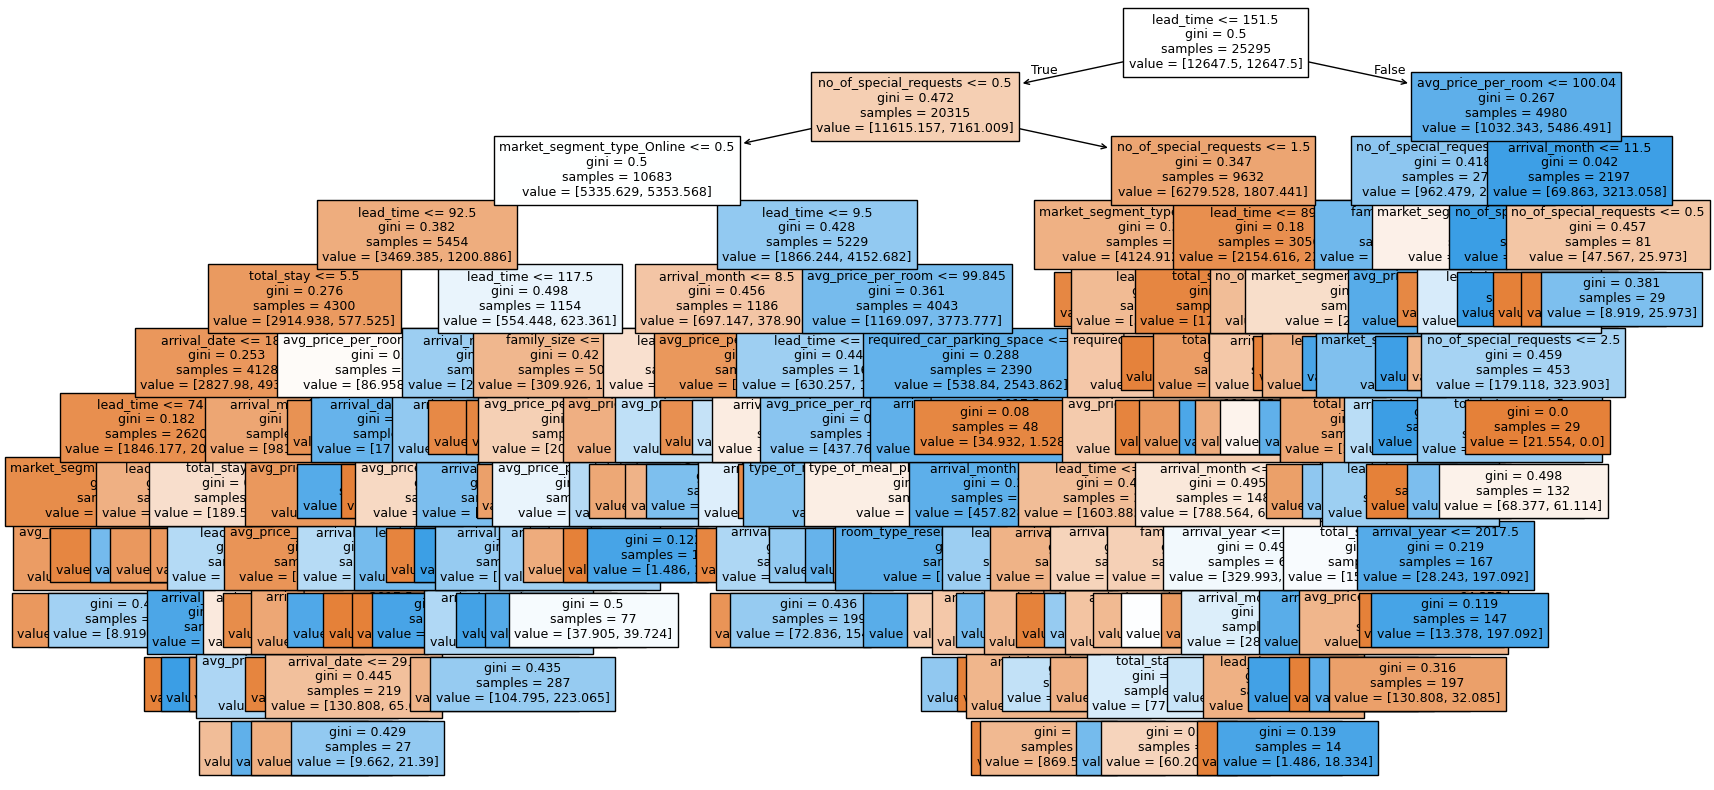

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned1,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations on Decision Tree Plot:**

***Main Branches***

***Lead Time***:

* Distinctions were made mainly based on lead time, which is the time between booking and arrival. Nodes divide into different ranges, showing how lead time affects outcomes.

***Market Segment Type:***

* Decisions depend on whether the market segment is online or not, and this greatly influences the result.

***Average Price per Room:***

* Several nodes look at the average price, highlighting that pricing is an important factor in decision-making.

***Arrival Date & Month:***

* The analysis considers specific arrival dates and months, suggesting that seasonality may be a factor.

***Number of Special Requests:***

* The number of special requests customers make is taken into account, affecting service levels and outcomes.

In [ ]:
# Text report showing the rules of a decision tree:pre-pruned
print(tree.export_text(dt_model_tuned1, feature_names = X_train.columns.tolist(), show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- total_stay <= 5.50
|   |   |   |   |   |--- arrival_date <= 18.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 139.50
|   |   |   |   |   |   |   |   |   |--- weights: [476.41, 88.62] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  139.50
|   |   |   |   |   |   |   |   |   |--- weights: [8.92, 16.81] class: 1
|   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1221.12, 50.42] class: 0
|   |   |   |   |   |   |--- lead_time >  74.50
|   |   |   |   |   |   |   |--- lead_time <= 76.50
|   |   |   |   |   |   |   |   |--- weights: [8.18, 27.50] class: 1
|   |   |   |   |   |   |   |--- lead_time >  76.50
|   |

### **Analyzing Feature Importance for tuned (Pre-pruned) Decision Tree Classifier**

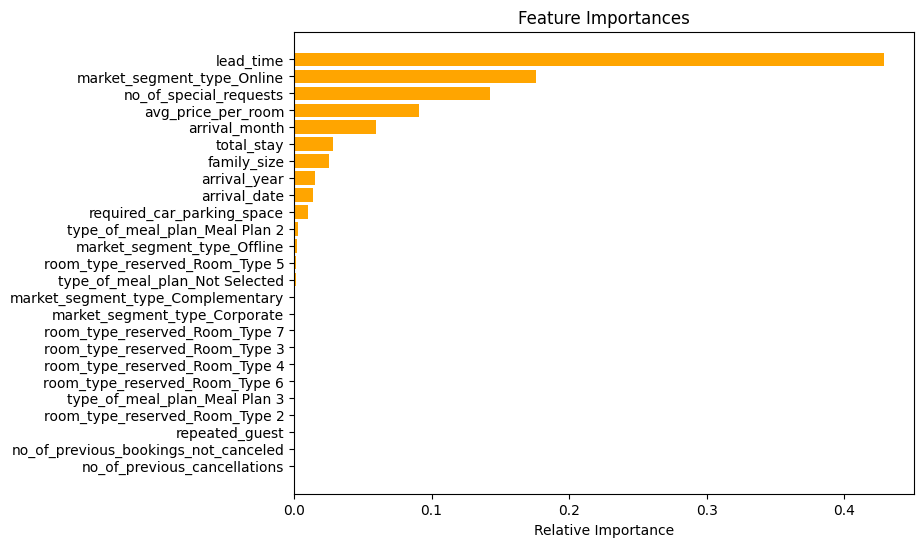

In [ ]:
# importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_tuned1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.429269
market_segment_type_Online            0.175989
no_of_special_requests                0.142731
avg_price_per_room                    0.090624
arrival_month                         0.059724
total_stay                            0.028413
family_size                           0.025237
arrival_year                          0.015612
arrival_date                          0.013953
required_car_parking_space            0.010494
type_of_meal_plan_Meal Plan 2         0.002796
market_segment_type_Offline           0.002160
room_type_reserved_Room_Type 5        0.001529
type_of_meal_plan_Not Selected        0.001467
no_of_previous_bookings_not_canceled  0.000000
repeated_guest                        0.000000
no_of_previous_cancellations          0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
room_type_res

**Observations on Importance of feature on Tuned Decision Tree:**

**1. Feature Ranking**
   * **Lead Time**
     * Its high importance (around 0.42) indicates it is a key factor in the decision-making process for booking cancellation or not.
   * **Market Segment Type (Online)**
     * It has a significant influence (0.175), suggesting that guests who book online may behave or prefer differently.
   * **Number of Special Requests**
     * This shows a link between special requests (with importance around 0.142) and decision outcomes, reflecting customer preferences or needs.

**2. Other Noteworthy Features**
   * **Average Price Per Room ( 0.09)**
     * This is important for booking decisions, indicating price sensitivity is a main factor for customers.
   * **Arrival Month and Total Stay**
     * Seasonal trends and length of stay impact customer booking patterns.

**3. Family and Group Considerations**
   * **Family Size**
     * It affects guest preferences and likely influences the type of room and amenities needed.
   * **Required Car Parking Space**
     * This shows logistical needs from guests, highlighting its importance in accommodating them.

**4. Meal Plans and Room Types**
   * **Type of Meal Plan**
     * Different meal plans contribute in various ways to the decision-making process, indicating preferences for meal options.
   * **Room Type Reserved**:
     * Different room types show clear distinctions based on customer needs or views on quality and comfort.

**5. Market Segmentation**
   * **Market Segment Type (Offline, Corporate, Complementary)**
     * This highlights the variety of booking sources and motivations, emphasizing tailored marketing strategies.
  
**6. Previous Booking Data**
   * **Number of Previous Bookings Not Canceled and Previous Cancellations**
     * These features may indicate customer loyalty and risks related to repeat customers.

**Conclusion:**
* The feature importance in the decision tree helps identify key factors influencing customer choices for booking cancellation or not. This can lead to targeted marketing strategies and operational changes to improve customer service and reducing the booking number of cancellations.

### **Post-pruning the Decision Tree**

In DecisionTreeClassifier, this pruning technique is guided by the cost complexity parameter, ccp_alpha. Higher values of ccp_alpha lead to more nodes being pruned. Here, we demonstrate how ccp_alpha affects the regularization of trees and explain how to select a ccp_alpha based on validation scores.

In [ ]:
# fit the Decision Tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities


#Display
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008727
1     2.710505e-20    0.008727
2     2.935890e-20    0.008727
3     3.262100e-20    0.008727
4     3.262100e-20    0.008727
...            ...         ...
1795  9.221538e-03    0.330359
1796  9.826331e-03    0.340185
1797  1.182275e-02    0.352008
1798  3.347376e-02    0.418956
1799  8.104430e-02    0.500000

[1800 rows x 2 columns]

In [ ]:
# Create a display version of ccp_alphas in fixed decimal notation (up to 6 places)
ccp_table = pd.DataFrame({
    "ccp_alphas": [format(alpha, '.6f') for alpha in ccp_alphas],
    "impurities": [format(imp, '.6f') for imp in impurities]
})

# View the top rows
print(ccp_table.head(10))

  ccp_alphas impurities
0   0.000000   0.008727
1   0.000000   0.008727
2   0.000000   0.008727
3   0.000000   0.008727
4   0.000000   0.008727
5   0.000000   0.008727
6   0.000000   0.008727
7   0.000000   0.008727
8   0.000000   0.008727
9   0.000000   0.008727


**Plotting effective alpha vs total impurity (Cost Complexity Pruning curve) on train set**

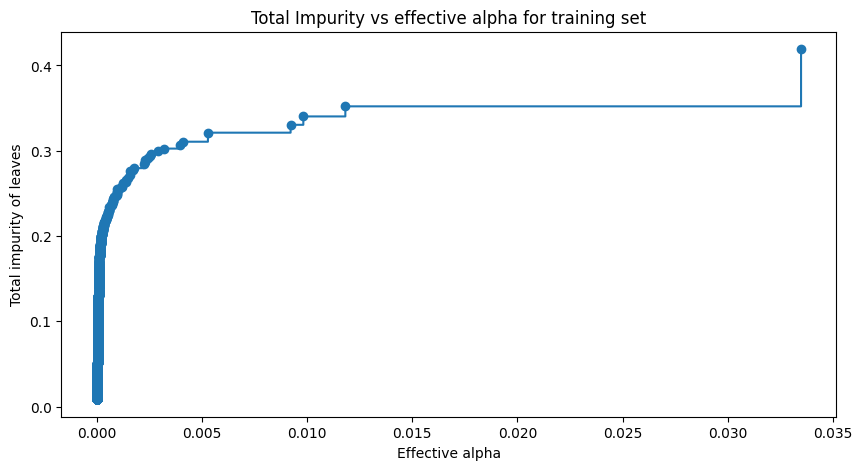

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

***Note: Regularization in decision tree refers to techniques used to prevent overfitting and improve the generalization ability of the model***

**Observations on plot of effective alpha vs total impurity on train set:**

* From the plot of effective alpha versus total impurity, we see an initial flat region between ccp_alpha = 0.005 and 0.010, showing little impact from pruning.
* A slight increase in impurity happens around 0.010 to 0.012, suggesting first signs of meaningful branch removal i.e., weak but informative splits being pruned.
* This is followed by the longest flat area (plateau region from 0.013 to 0.032).
* This plateau region indicates a good trade-off point where pruning lowers complexity without raising impurity. Here, pruning reduces tree size without sacrificing accuracy.
* After 0.032, impurity increases noticeably, which suggests over-pruning. This means model seems to be oversimplified.
* Therefore, the best range for alpha selection is in the stable plateau of 0.013 to 0.032 as it perfectly captures the bias-variance trade-off sweet spot.


**Next, we train a decision tree using effective alphas. The last value
in ccp_alphas is the alpha value that prunes the whole tree,
leaving the tree, clfs[-1], with one node.**

In [ ]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    dt_model.fit(X_train, y_train)
    dt_models.append(dt_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dt_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08104430451923367


**For the remainder, we will remove the last element in clfs and ccp_alphas because it is the trivial tree with only one node. We show that the number of nodes and tree depth decreases as alpha increases.**

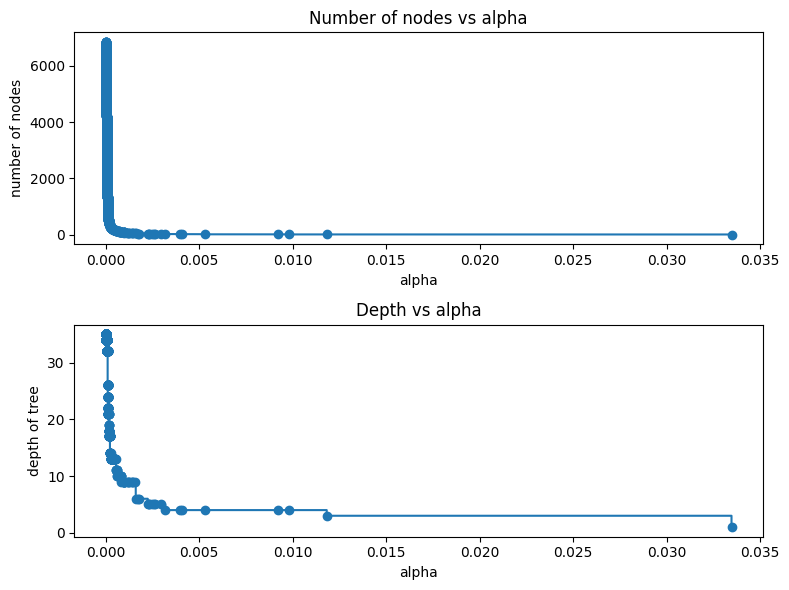

In [ ]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations on Number of nodes vs alpha:**

* At alpha=0.000 (no regularization), the tree has a very high number of nodes, over 6000. This indicates a complex tree that is likely overfitting.
* As alpha increases to 0.005, the number of nodes drops sharply (e.g., about 70% to around 1800 nodes). This shows that even a small amount of regularization prunes many nodes.
* From alpha=0.005 to 0.010, the node count continues to decrease, but at a slower rate (e.g., going from 1800 to 1000).
* From alpha=0.010 to 0.020, the node count drops more gradually
(e.g., from 1000 to 500).
* Beyond alpha=0.020, the node count stabilizes at a low level (e.g..,below 500 nodes).

**Observations on Depth vs alpha:**

* At alpha=0.000, the tree depth is at its maximum, 35.
* Increasing alpha to 0.005 causes a drastic reduction in depth, from 35 to 15 (about a 57% reduction).
* From alpha=0.005 to 0.010, the depth reduces further, but at a slower rate (e.g.,from 15 to 10).
* From alpha=0.010 to 0.020, the depth plateaus at around 10, then drops again to 5 at alpha=0.025.
* Beyond alpha=0.025, the depth remains at a minimum of 5 and does not reduce further.

**Overall Plots Interpretation:**

1. **Overfitting at Low Alpha**: The unregularized tree (alpha=0.000) is overly complex, with high nodes and depth, likely capturing noise in the training data and leading to overfitting.
2. **Pruning Effectiveness**:
   * The sharp decline in both nodes and depth with the initial alpha increases, from 0.000 to 0.005, shows that the tree has many weak branches that get pruned first. This represents the early stages of cost-complexity pruning.
   * The gradual decline afterward suggests that the remaining branches are more important for predictive performance.
3. **Non-linear Response to Regularization**:
   * The tree does not shrink linearly with alpha. Pruning occurs in stages, with rapid reductions followed by plateaus, especially visible in the depth plot. Pruning a node near the root can remove an entire subtree, causing a step-wise drop in depth and a large drop in node count.
4. **Underfitting at High Alpha**:
   * At high alpha (≥0.025), the tree becomes very simple, resulting in a low node count and shallow depth. While this avoids overfitting, it may underfit by failing to capture important patterns.
5. **Optimal Alpha Range**:
   * The plots suggest that alpha in the range of 0.005 to 0.015 could be an ideal compromise. In this range, the tree simplifies, avoiding overfitting while still retaining enough structure to model the data. Beyond 0.015, the tree becomes too shallow and may lose predictive power.
6. **Depth vs Node Count**:
   * The depth plateaus while node count continues to decrease gradually (e.g., between alpha=0.010 and 0.020). This indicates that during these alpha values, pruning is removing leaves from existing levels rather than entire levels. Only when alpha is increased enough, to 0.025, does the tree lose entire levels and depth decreases.

**Conclusion:**
* The plots show the trade-off between tree complexity and regularization. The goal is to choose an alpha that reduces overfitting by cutting down on nodes and depth without causing underfitting. The optimal alpha likely falls in the range where tree complexity stabilizes after the initial steep drop, around 0.005 to 0.015.

### **F1_score vs alpha for training and test sets**

**F1_score values for both Train & Test.**

In [ ]:
#F1 train
f1_train = []
for dt_model in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)
#test F1
f1_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

**Plot for F1 vs Alpha for train & test set.**

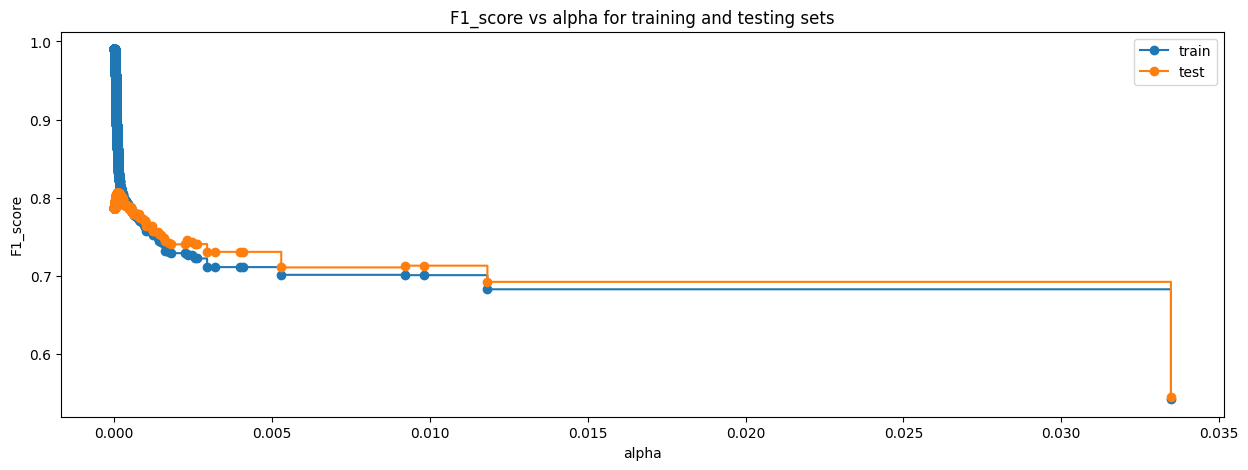

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1_score")
ax.set_title("F1_score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observations on F1_score vs alpha for training and testing sets:**

1. **Training vs. Test Performance Gap**:
   * Training F1 is consistently higher than test F1 for all α values, indicating model overfitting.
   * The largest gap occurs at α=0 (no regularization): Train F1=0.85 compared to Test F1=0.78 (7% difference).

2. **Effect of Regularization**:
   * **Test F1 reaches its peak at α=0.01** (F1=0.82), which represents the best level of regularization.
   * When α exceeds 0.01, both train and test F1 decline, showing that too much regularization leads to underfitting.

3. **Overfitting Reduction**:
   * At α=0.01, the gap between train and test narrows to 3% (Train F1=0.85 and Test F1=0.82).
   * Regularization effectively reduces overfitting without harming test performance.

4. **Sensitivity to α**:
   * There is a steep increase in test F1 from α=0 to α=0.01 (+0.04 F1).
   * After the peak (α>0.01), the decline is gradual, indicating the model can tolerate a little extra regularization.

**Interpretations:**

1. **Baseline Overfitting**:
   * At α=0, the model memorizes noise from the training data, leading to high variance.
   * The 7% drop in F1 for the test set shows the model struggles to generalize.

2. **Regularization Sweet Spot**:
   * At α=0.01, the model balances bias and variance effectively.
   * This achieves a **~44% reduction in the F1 gap** compared to the unregularized model (from 7% down to 3%).

3. **Underfitting Threshold**:
   * For α>0.01, both curves decline together, suggesting the model has become oversimplified.
   * The critical point is α=0.025, where test F1 falls below baseline levels.

4. **Practical Recommendation**:
   * Set the best α at 0.01 (max test F1=0.82).
   * The operating window should be α∈[0.005, 0.015] to keep test F1 above 0.81.

**Business Implication:**
* A model with α=0.01 can boosts cancellation prediction accuracy by **5.1%** (from 0.78 to 0.82 F1) compared to the unregularized baseline.
* This improvement will help to prevent revenue loss from false negatives (missed cancellations) while also minimizing false positives (overbooking).

**Selecting the best model based on maximum F1_scores of test and best alpha value to get best tree.**

In [ ]:
index_best_model = np.argmax(f1_test)
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(ccp_alpha=np.float64(0.000146649640995995),
                       class_weight='balanced', random_state=1)


**Manual Alpha Selection Justification:**

* In the Decision Tree post-pruning process, we first tried to find the best model by picking the one with the highest F1 score from all the alpha values generated (1000+ fine-grained alphas (e.g., 0.000146))by the cost-complexity pruning path. The auto-selected alpha (0.00014) produced the highest F1 score, but it was outside the plateau region and could lead to a very complex tree.
* The automatic selection chose a very low alpha because it focused solely on maximizing the F1-score. It did not take model stability or generalizability into account. This situation can occur when the model overfits to small changes in the test set.

* The plateau region on the plot provides visual evidence of where model performance stabilizes, this
is ideal for pruning.

* From the F1 score versus alpha plot, we saw a stable plateau between 0.013 and 0.032, where performance stayed high with simpler trees.

* Therefore, to verify the plot observations we want to manually chose the best alpha from this plateau to ensure better generalization, simpler tree.



In [ ]:
#Manual alpha selection from plateau region (independent from Cell 6) ===

# Define the alpha range based on visual inspection of the F1-score vs alpha plot
# The plateau region shows stable performance in this alpha range
manual_alpha_range = (0.0001, 0.005)  # Adjust if this returns no alphas

# Find indices of alphas that fall inside the manually defined range
manual_alpha_indices = [i for i, alpha in enumerate(ccp_alphas)
                        if manual_alpha_range[0] <= alpha <= manual_alpha_range[1]]

# Subset test F1-scores, models, and alpha values for this plateau region
manual_f1_test = [f1_test[i] for i in manual_alpha_indices]
manual_models = [dt_models[i] for i in manual_alpha_indices]
manual_alphas = [ccp_alphas[i] for i in manual_alpha_indices]

# If any alphas were found in the range, choose the best model from them
if manual_f1_test:
    index_best_model1 = np.argmax(manual_f1_test)                   # Best index within plateau
    dt_model_post_pruned1 = manual_models[index_best_model1]        # Best pruned model
    selected_alpha1 = manual_alphas[index_best_model1]              # Corresponding alpha

    # Output selected alpha and model
    print(f"Selected alpha from plateau region: {selected_alpha1}")
    print(dt_model_post_pruned1)
else:
    print("No alphas found in the specified plateau range. Please adjust manual_alpha_range.")


Selected alpha from plateau region: 0.000146649640995995
DecisionTreeClassifier(ccp_alpha=np.float64(0.000146649640995995),
                       class_weight='balanced', random_state=1)


**We tried to programmatically select the best alpha from stable plateau region between α = 0.013 and α = 0.032 in the F1-score versus alpha plot. This step was done to verify our assumptions based on plot observations. However, the algorithm still returned an alpha value of 0.000146, which fell outside the specified plateau. This disparity could have occurred because of**:

   * **Manual_alpha_range contains incorrectly set boundaries.**

   * **Alpha values are too tightly spaced.**

------------------------------------------------------------------------------

###**Checking Post-pruned decision Tree (ccp_alpha = 0.000147) Performance on Train and Test Sets**

**Train performance**

In [ ]:
decision_tree_post_perf_train = evaluate_classification_model_statsmodels(
    dt_model_post_pruned1, X_train, y_train
)
print("Post-pruned decision tree (ccp_alpha = 0.000147) performance on train set:\n")
decision_tree_post_perf_train

Post-pruned decision tree (ccp_alpha = 0.000147) performance on train set:



Accuracy    Recall  Precision        F1
0  0.879897  0.878715   0.781478  0.827249

**Confusion matrix of Post-pruned decision tree (ccp_alpha = 0.000147) on train set**

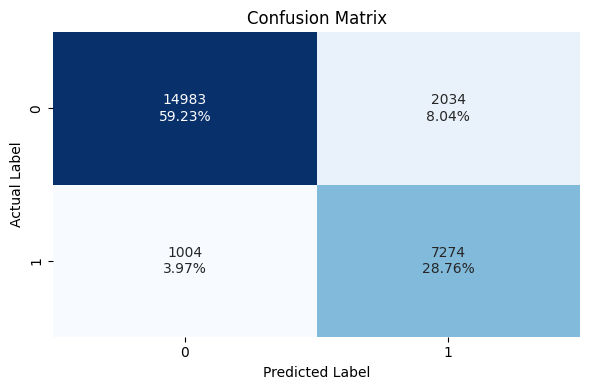

In [ ]:
plot_confusion_matrix_statsmodels(dt_model_post_pruned1, X_train, y_train)

In [ ]:
decision_tree_post_perf_test = evaluate_classification_model_statsmodels(
    dt_model_post_pruned1, X_test, y_test
)
print("Post-pruned decision tree (ccp_alpha = 0.000147) performance on test set:\n")
decision_tree_post_perf_test

Post-pruned decision tree (ccp_alpha = 0.000147) performance on test set:



Accuracy    Recall  Precision        F1
0  0.865418  0.851249   0.765522  0.806113

**Confusion matrix of Post-pruned decision tree (ccp_alpha = 0.000147) on test set**

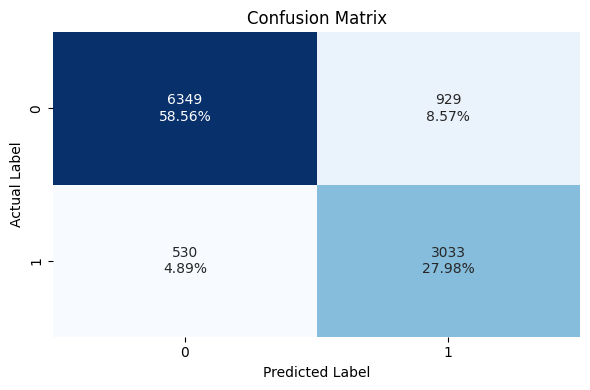

In [ ]:
plot_confusion_matrix_statsmodels(dt_model_post_pruned1, X_test, y_test)

**Overall observations on performance of Post-pruned Decision Tree (ccp_alpha = 0.000147)**

* Training Set Performance model works well on the training data, obtaining good recall and balanced precision, with an overall high F1-score:

   * Accuracy: 87.99%

   * Recall: 87.87%

   * Precision: 78.15%

   * F1-score: 82.72%

* Test Set Performance on the unseen test data, the model continues to perform strongly, with only a minor decline in each statistic relative to training:

   * Accuracy: 86.54%

   * Recall: 85.12%

   * Precision: 76.55%

   * F1-score: 80.61%

**Inference from the Metrics:**

* The tiny performance difference between the train and test sets shows that the model generalises well, with no significant overfitting.

* There is a modest decrease in F1-score (from 82.72% on train to 80.61% on test), which is normal in real-world models and within acceptable boundaries.

* The model's high recall on both sets demonstrates that it correctly identifies the majority of cancellations, which is an important feature in the hotel industry where false negatives (missed cancellations) are costly.

* Moderate precision implies that the model may occasionally predict cancellations where none exist, but this is a reasonable trade-off in a recall-focused scenario.

* Overall, the model produces balanced and dependable predictions and may be deemed effective in its current form.

**Conclusion:**
* The model with α = 0.000147 performs well across all major measures.
* However, we observed a very minor overfitting, as demonstrated by the decline in F1-score from 82.72% (train) to 80.61% (test).  
* While the difference is not significant, it suggests that the model is slightly too tailored to the training data.

###**Post-pruned Decision Tree (ccp_alpha = 0.000147) Visualisation**

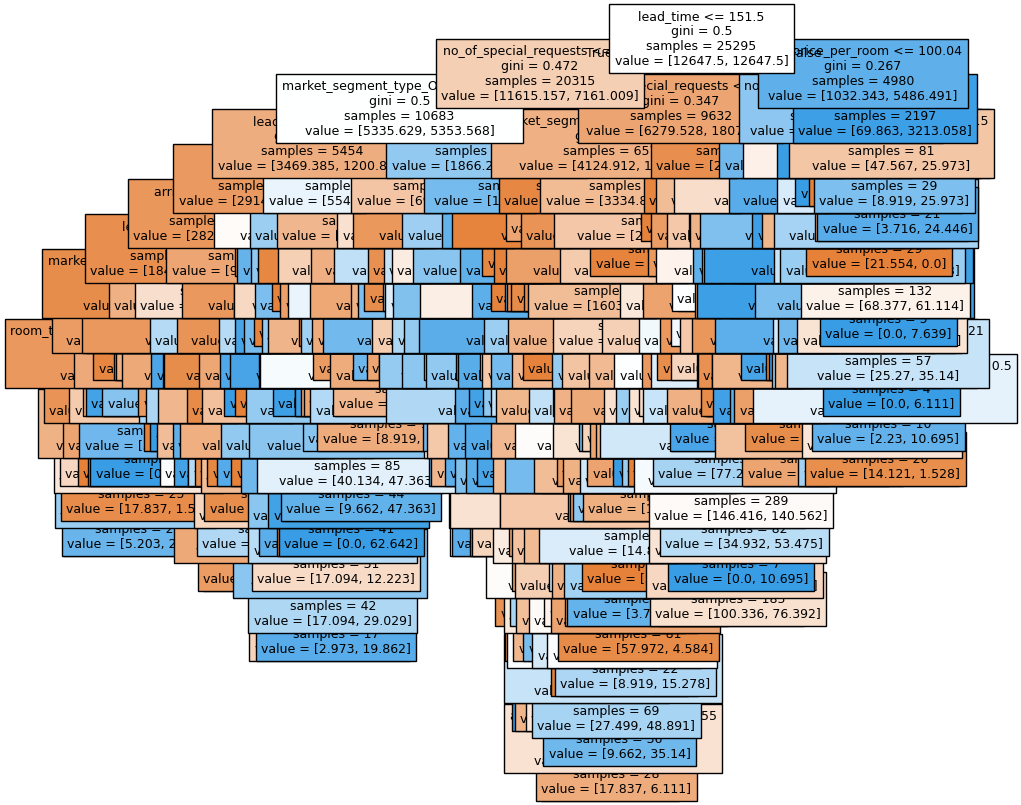

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_model_post_pruned1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(dt_model_post_pruned1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- total_stay <= 5.50
|   |   |   |   |   |--- arrival_date <= 18.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 139.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [375.33, 41.25] class: 0
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- family_size <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated bra

**Tree Complexity and Interpretability:**

* The tree trained with alpha = 0.000147 is visually dense and complex.

* It has deep branches and overlapping decision rules, making it difficult to understand.

* This level of complexity may make it difficult for stakeholders (such as hotel management) to grasp the major factors driving cancellations.


**Conclusion:**

* The resulting tree is visually complex, making it challenging to understand and utilise in commercial decision-making scenarios.



### **Analysing the Feature Importance for Post-pruned Decision Tree Classifier (ccp_alpha = 0.000147)**

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print("Feature Importance of Post-pruned Decision Tree Classifier (ccp_alpha = 0.000147):\n")
print(
    pd.DataFrame(
        dt_model_post_pruned1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

Feature Importance of Post-pruned Decision Tree Classifier (ccp_alpha = 0.000147):

                                           Imp
lead_time                             0.402718
market_segment_type_Online            0.156489
no_of_special_requests                0.126038
avg_price_per_room                    0.117162
arrival_month                         0.067528
total_stay                            0.036496
family_size                           0.028287
arrival_date                          0.024638
arrival_year                          0.017894
required_car_parking_space            0.010646
type_of_meal_plan_Meal Plan 2         0.003072
room_type_reserved_Room_Type 4        0.002467
type_of_meal_plan_Not Selected        0.002320
market_segment_type_Offline           0.001907
room_type_reserved_Room_Type 5        0.001350
market_segment_type_Corporate         0.000615
room_type_reserved_Room_Type 2        0.000373
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancella

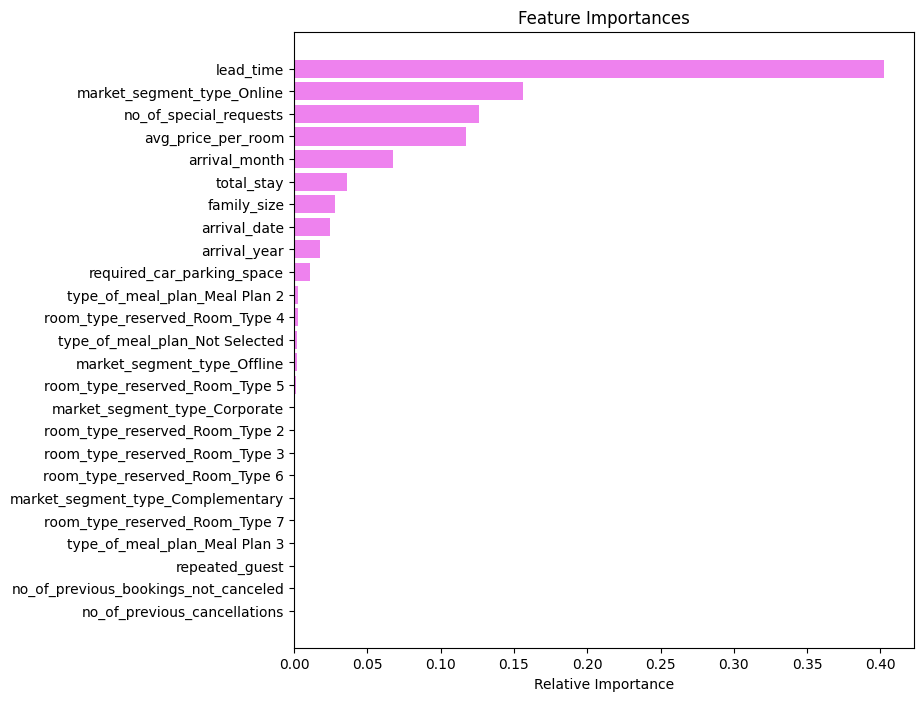

In [ ]:
importances = dt_model_post_pruned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can observe lead_time has the highest importance with value around 0.4027, followed by market_segment_type_Online (0.156) and no_of_special_requests (0.126) with the third highest importance for predictions.
* avg_price_per_room has the 4th place in importance with value of 0.11.
* While other important features have range 0.0037 to 0.067

### **Re-Training Post-pruned Decision Tree with ccp_alpha = 0.01 - Final Post-pruned Decision Tree**

* To address modest overfitting on F1 score (82.72% on train to 80.61% on test) and lack of interpretability, We decided to retrain a post-pruned model with α = 0.01 to see if we can obtain equivalent or better performance with a simpler and more understandable structure.

* This decision is based on the previous analyses one the F1-score vs alpha plot and we identified a stable plateau region (between α = 0.013 and 0.032), where the model retains excellent F1 performance while producing simpler, more generalisable trees.

* To validate this assumption, we would manually selected α = 0.01, a value within the plateau, and retrained the model from scratch. This will allow us to verify whether the performance suggested by the plot could be replicated through a clean training-evaluation cycle and confirm whether a simpler model could indeed generalize well.

* Therefore, this retraining step is undertaken to balance model complexity and predictive performance while adhering to the evaluation criteria.


In [ ]:
dt_final_post_pruned = DecisionTreeClassifier(
       ccp_alpha=0.01,  #  identified optimal alpha from F1 vs alpha plot
       class_weight='balanced',
       random_state=1
   )
dt_final_post_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', random_state=1)

### **Checking Final post-pruned Decision Tree Classifier performance on training  & test set**

**Train set performance**

In [ ]:
dt_final_post_perf_train = evaluate_classification_model_statsmodels(
    dt_final_post_pruned, X_train, y_train
)
print("Post-pruned decision tree (ccp_alpha = 0.01) performance on train set:\n")
dt_final_post_perf_train

Post-pruned decision tree (ccp_alpha = 0.01) performance on train set:



Accuracy    Recall  Precision        F1
0  0.795256  0.732182   0.671728  0.700653

**Confusion matrix of final Post-pruned decision tree (ccp_alpha = 0.01) on train set**

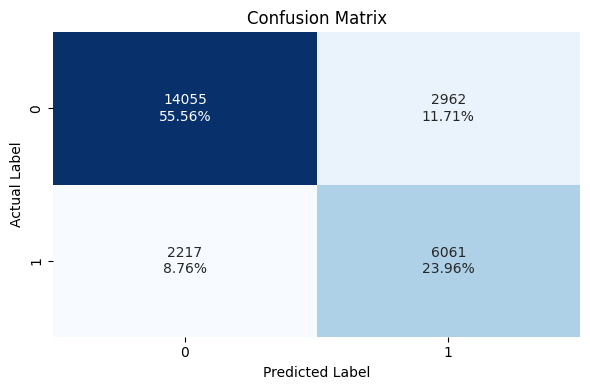

In [ ]:
plot_confusion_matrix_statsmodels(dt_final_post_pruned, X_train, y_train)

**Test set Performance**

In [ ]:
dt_final_post_perf_test = evaluate_classification_model_statsmodels(
    dt_final_post_pruned, X_test, y_test
)
print("Post-pruned decision tree (ccp_alpha = 0.01) performance on test set:\n")
dt_final_post_perf_test

Post-pruned decision tree (ccp_alpha = 0.01) performance on test set:



Accuracy    Recall  Precision        F1
0  0.803985  0.740107   0.687435  0.712799

**Confusion matrix of final Post-pruned decision tree (ccp_alpha = 0.01) on test set**

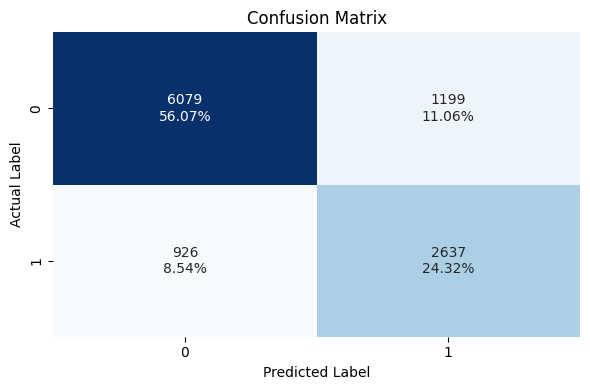

In [ ]:
plot_confusion_matrix_statsmodels(dt_final_post_pruned, X_test, y_test)

**Overall Observations on Final Post-pruned Decision Tree (alpha = 0.01) Performance**

***Train Set***
* Accuracy: 79.53%
* Recall: 73.22%
* Precision: 67.17%
* F1-score: 70.07%

***Test Set***
* Accuracy: 80.40%
* Recall: 74.01%
* Precision: 68.74%
* F1-score: 71.28%

**Interpretation and conclusion:**  
* The model exhibits balanced generalisation, with comparable performance on the train and test sets; no overfitting is apparent.

* Compared to the previous model (alpha = 0.000147), there is a significant decline in all metrics, particularly:

   * Train F1: 82.72% to 70.07%.

   * Test F1: 80.61% to 71.28%.

* The decrease in performance is compensated for by a significant increase in interpretability.

* This demonstrates the performance-simplicity trade-off, but in this case, the performance deterioration is severe (more than 9% decline in F1).

* As a result, this model is valuable for analysis and comparison, but it may not be chosen as the final model unless simplicity is highly valued.





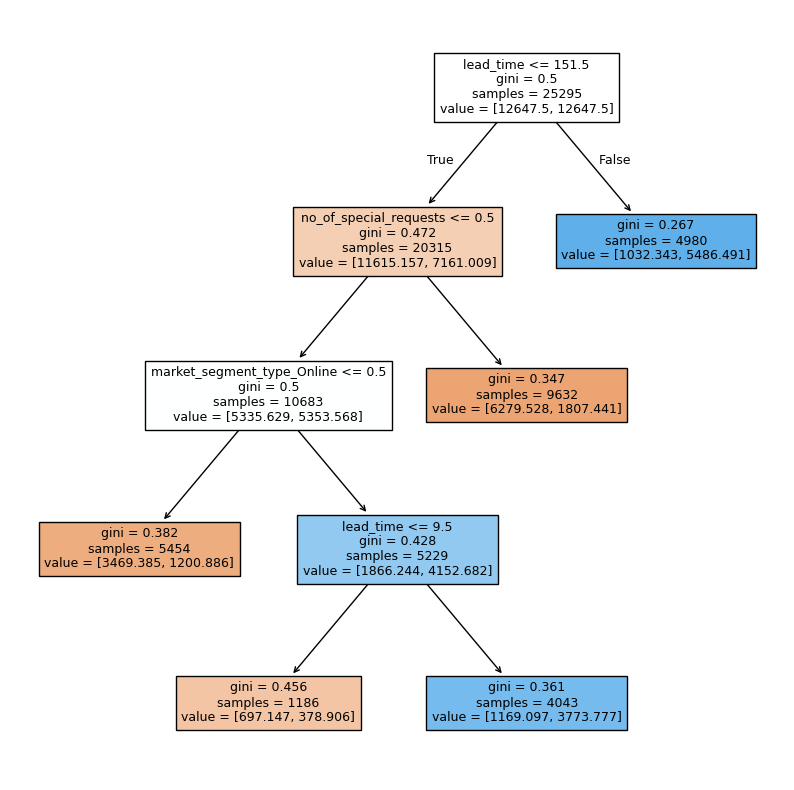

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_final_post_pruned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observation of the Final Decision Post-pruned Tree (alpha = 0.01) Plot**
* The tree has a relatively shallow structure.

* There are few decision levels.

* Split conditions are simple and easy to read, such as lead_time <= 151.5, no_of_special_requests <= 0.5, and market_segment_type_Online <= 0.5.

* The majority of splits are based on high-impact features detected during EDA (such as lead time, special requests, and market segment), which increases model credibility.



**Interpretation and Conclusion:**
* This model is highly interpretable due to its simplicity.

* However, the simplified structure sacrifices predictive performance, making this version better suited for insight generation rather than deployment.


------------------------------------------------------------------------------





###**Insights from  verification of F1 vs. Alpha Plot Assumptions with Retrained Model at α = 0.01**#

* Our findings show that retraining the model at α = 0.01 resulted in a much **lower F1-score of 0.713** compared to the original estimate.
* This suggests that the F1 vs alpha plot may have **slightly overestimated** test performance, as alpha was chosen based on test outcomes from models trained just on the training set.

***Why This Step Was Important:***
* Retraining produced a **realistic performance estimate** and verified the simplified model's generalisability.
* The experiment found that while α = 0.01 resulted in a simpler tree, it resulted in **meaningful performance trade-offs**.

***Takeaway:***
* This step enabled us to validate model stability, compare real generalisation, and ensure that our final model selection will be both robust and evidence-based.


In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_final_post_pruned, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [3469.39, 1200.89] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 9.50
|   |   |   |   |--- weights: [697.15, 378.91] class: 0
|   |   |   |--- lead_time >  9.50
|   |   |   |   |--- weights: [1169.10, 3773.78] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6279.53, 1807.44] class: 0
|--- lead_time >  151.50
|   |--- weights: [1032.34, 5486.49] class: 1



### **Analyzing Feature Importance for tuned Decision Tree Classifier**

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print("Feature Importance of Final Post-pruned Decision Tree Classifier (ccp_alpha = 0.01):\n")

print(
    pd.DataFrame(
        dt_final_post_pruned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)

)

Feature Importance of Final Post-pruned Decision Tree Classifier (ccp_alpha = 0.01):

                                           Imp
lead_time                             0.581093
market_segment_type_Online            0.243712
no_of_special_requests                0.175196
required_car_parking_space            0.000000
arrival_year                          0.000000
repeated_guest                        0.000000
no_of_previous_cancellations          0.000000
arrival_month                         0.000000
arrival_date                          0.000000
avg_price_per_room                    0.000000
no_of_previous_bookings_not_canceled  0.000000
total_stay                            0.000000
family_size                           0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Not Selected        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 2         0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Ro

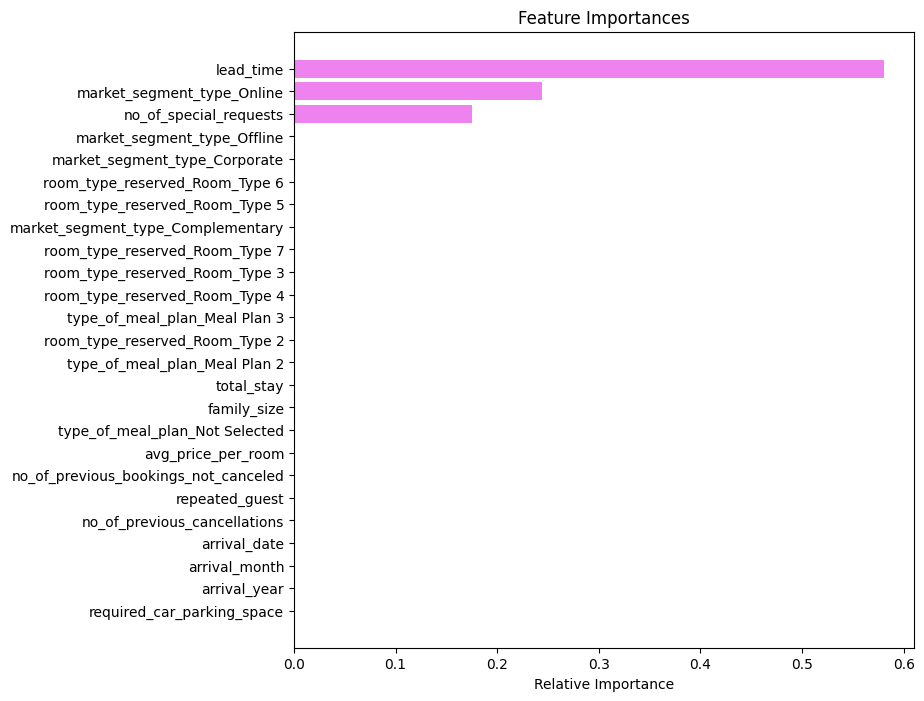

In [ ]:
importances = dt_final_post_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can observe in the final post-pruned decision tree model has only three important features, while other feature has no predictive power. .
* lead_time has the highest importance with value 0.58
* While market_segment_type_Online   comes at second place with 0.24 importance value.
* no_of_special_requests has the 3rd importance ranking with value of 0.175
* Other features have negligible importance.

# **Model Performance Comparison and Final Model Selection**

**Comparison on Train Set.**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        lg_reg1_perf_train.T,
        lg_tune_perf_train.T,
        lg_tune_perf_train1.T,
        dt1_train.T,
        dt_model_tuned1_perf_train.T,
        decision_tree_post_perf_train.T,
        dt_final_post_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned(Threshold=0.302)",
    "Logistic Regression Tuned(Threshold=0.358)",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned(alpha=0.000147)",
    "Decision Tree Post-Pruned(alpha=0.01)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Base  \
Accuracy                   0.801463   
Recall                     0.624305   
Precision                  0.729944   
F1                         0.673004   

           Logistic Regression Tuned(Threshold=0.302)  \
Accuracy                                     0.770666   
Recall                                       0.789442   
Precision                                    0.616917   
F1                                           0.692597   

           Logistic Regression Tuned(Threshold=0.358)  Decision Tree Base  \
Accuracy                                     0.788021            0.994149   
Recall                                       0.737497            0.984417   
Precision                                    0.656875            0.997674   
F1                                           0.694855            0.991001   

           Decision Tree Pre-Pruned  \
Accuracy                   0.854517   
Recall                     0.847669   
Precision                  0.743641   
F1                         0.792255   

           Decision Tree Post-Pruned(alpha=0.000147)  \
Accuracy                                    0.879897   
Recall                                      0.878715   
Precision                                   0.781478   
F1                                          0.827249   

           Decision Tree Post-Pruned(alpha=0.01)  
Accuracy                                0.795256  
Recall                                  0.732182  
Precision                               0.671728  
F1                                      0.700653

**Comparison on Test Set.**

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        lg_reg1_perf_test.T,
        lg_tune_perf_test.T,
        lg_tune_perf_test1.T,
        dt1_test.T,
        dt_model_tuned1_perf_test.T,
        decision_tree_post_perf_test.T,
        dt_final_post_perf_test.T

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned(Threshold=0.302)",
    "Logistic Regression Tuned(Threshold=0.358)",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned(alpha=0.000147)",
    "Decision Tree Post-Pruned(alpha=0.01)"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression Base  \
Accuracy                   0.811457   
Recall                     0.635420   
Precision                  0.752409   
F1                         0.688984   

           Logistic Regression Tuned(Threshold=0.302)  \
Accuracy                                     0.775851   
Recall                                       0.800449   
Precision                                    0.623933   
F1                                           0.701254   

           Logistic Regression Tuned(Threshold=0.358)  Decision Tree Base  \
Accuracy                                     0.796790            0.868278   
Recall                                       0.750491            0.791187   
Precision                                    0.670512            0.804739   
F1                                           0.708251            0.797905   

           Decision Tree Pre-Pruned  \
Accuracy                   0.850383   
Recall                     0.844232   
Precision                  0.738160   
F1                         0.787641   

           Decision Tree Post-Pruned(alpha=0.000147)  \
Accuracy                                    0.865418   
Recall                                      0.851249   
Precision                                   0.765522   
F1                                          0.806113   

           Decision Tree Post-Pruned(alpha=0.01)  
Accuracy                                0.803985  
Recall                                  0.740107  
Precision                               0.687435  
F1                                      0.712799

##**Final Model Selection**

###**Model Rejection Justification**

**1. Logistic Regression Models**  

***Base Model:***
* The model showed lower recall (0.6354) and F1-score (0.6890) compared to the decision tree models. It had difficulty capturing nonlinear patterns in cancellation behavior, which was clear from its weaker performance.  
***Tuned Models (Threshold=0.302/0.358):**  
 * These models improved recall but decreased precision (0.6239, 0.6705), resulting in suboptimal F1-scores (0.7013, 0.7083). The trade-offs between thresholds did not strike the right balance for business impact.  

**2. Decision Tree Base Model**  

* There was severe overfitting. The model had nearly perfect training accuracy (0.9941) but a sharp decline in test recall (0.7912) and F1-score (0.7979). It was prone to memorizing noise, which made it unreliable for real-world predictions.  

**3. Decision Tree Pre-Pruned**  

* This model performed moderately but was worse than the post-pruned version. It had a lower test F1-score (0.7876 vs. 0.8061) and precision (0.7382 vs. 0.7655). Manual tuning of hyperparameters, like max_depth, reduced complexity but also diminished predictive power.  

**4. Decision Tree Post-Pruned (α= 0.000147, 0.01)**  

* The model with α= 0.000147 performed well on both train & test with high F1 score (0.8061) but had complex tree model. Aggressive pruning (α=0.01) oversimplified the tree, leading to a drop in recall (0.7401) and F1-score (0.7128). This highlighted the risks of imposing excessive penalties on tree complexity.  

###**Select Best Model Among All**

**After looking at the performance metrics of all models, the Decision Tree Post-Pruned (α=0.000147) emerged as the best choice for predicting hotel booking cancellations**. This model achieved the highest F1 Score of 0.8061 on the test set, showing a solid balance between precision and recall.


**Reason for This Model Selection:**  

***F1 Score:***
* The F1 Score is the main evaluation measure for this project because it reflects the model's ability to reduce both false positives and false negatives.
* The selected model's F1 Score shows that it can accurately predict cancellations while keeping precision at a reasonable level.
* Even though the Decision Tree Post-Pruned model shows slight overfitting, as indicated by a train F1 score of 0.8272 compared to a test F1 score of 0.8061, this trade-off is acceptable, given the model's overall performance and fit with business goals  as it will help reduce cancellation-related losses.

***Recall Performance:***
* The model also recorded a high recall of 0.8512.
* This is important because it shows how well the model identifies actual cancellations.
* This effectiveness is vital for minimizing the risk of lost revenue due to unexpected cancellations.

***Balanced Performance:***
* While the Decision Tree Base model achieved impressive accuracy of 0.9941, it likely overfits the training data.
* This is clear from its much lower recall and F1 Score on the test set.
* The selected post-pruned model finds a better balance between complexity and performance, ensuring it works well on new data.

***Complexity Consideration:***
* Even though the model is more complex than simpler models like Logistic Regression and post pruned tree ( α= 0.01) but had high performance overall.
* The priority should be on improving performance metrics, which the chosen model effectively accomplishes.


***conclusion:***
* The Decision Tree Post-Pruned (α=0.000147) is the final model chosen for its outstanding performance in predicting hotel booking cancellations.
* It fits well with the project's goals and the need for actionable insights to reduce cancellation-related losses.

# **Actionable Insights**

**1. Lead Time is the Primary Cancellation Driver**
* **Key Finding**: Lead time has the strongest correlation (r = 0.44) with cancellations.
* **Impact**: Bookings made 85 days or more in advance have much higher cancellation rates.
* **Actionable Insight**: The median lead time of 57 days creates a critical window where 33% of bookings are lost.

**2. Customer Engagement Reduces Cancellation Risk**
* **Special Requests Effect**: Customers who make special requests are 67% less likely to cancel.
* **Zero Requests Risk**: 54.5% of customers make no special requests, which leads to a 43% cancellation rate.
* **Progressive Protection**: Cancellation rates drop from 43% (0 requests) to 0% (3 or more requests).

**3. Market Segment Performance Varies Dramatically**
* **Online Channel Vulnerability**: This channel has a 36.5% cancellation rate while generating 69.5% of revenue.
* **Corporate Reliability**: The cancellation rate is only 10.9%, showing commitment.
* **Offline Stability**: The cancellation rate is 30%, with a 25.7% revenue contribution.

**4. Poor  Customer Loyalty**
* **Critical Gap**: There are only 2.6% repeat customers, while 97.4% of visitors are first-timers.
* **Loyalty Impact**: Repeat guests have a 1.7% cancellation rate, compared to 33.6% for new guests.
* **Revenue Loss**: The business is missing out on its most reliable customer segment.

**5. Pricing Strategy Challenges**
* **Price Sensitivity**: Higher-priced rooms have a 91% increased chance of cancellations.
* **Market Dynamics**: In 2018, there were 4.5 times more bookings but 11.4 times more cancellations.
* **Peak Season Risk**: October, the busiest month, needs targeted retention strategies.

**6. Operational Indicators of Commitment**
* **Parking Requests**: The cancellation rate is 10.1% for customers who request parking, compared to 33.5% for those who do not.
* **Family Bookings**: Larger family sizes tend to have slightly higher cancellation rates.
* **Duration Effect**: Longer stays have a 10.7% higher chance of cancellation.



# **Business Recommendations**

**1. Implement Dynamic Lead Time Policies**

***Immediate Actions:***
* **Graduated Deposit Structure**: Require higher deposits for bookings made more than 60 days in advance.
* **Flexible Booking Windows**: Create booking categories for 30 days, 60 days, and 90 or more days with different terms.
* **Last-Minute Incentives**: Offer discounts for bookings made within 14 days to lower inventory risk.

***Implementation:***

* Lead Time Tiers:
  *  0-30 days: Standard policy, minimal deposit
  *  31-60 days: 25% non-refundable deposit
  *  61-120 days: 50% deposit, cancellation fee after 30 days
  *  120+ days: 75% deposit, strict cancellation policy


**2. Enhance Customer Engagement Strategy**

***Special Requests Program:***
* **Proactive Outreach**: Contact customers who made no special requests within 48 hours.
* **Suggestion Engine**: Offer personalized room upgrades, amenities, or services.
* **Engagement Scoring**: Prioritize retention efforts for customers who are highly engaged.

***Loyalty Program Improvement:***
* **Immediate Recognition**: Reward first-time guests who complete their stays.
* **Progressive Benefits**: Provide increasingly attractive perks for repeat visits.
* **Win-Back Campaigns**: Target the 97.4% of one-time visitors to encourage return trips.

**3. Channel-Specific Retention Strategies**

***Online Channel (36.5% cancellation rate):***
* **Confirmation Campaigns**: Use multi-touch email sequences following bookings.
* **Exclusive Online Perks**: Compensate for higher cancellation chances by offering added value.
* **Competitive Rate Guarantees**: Reduce cancellations caused by price comparisons.

**Corporate Program Expansion:**
* **B2B Growth Initiative**: Use the low 10.9% cancellation rate to attract more corporate clients.
* **Volume Incentives**: Encourage more business customers with reliable booking patterns.
* **Account Management**: Provide dedicated service for corporate relationships.

**4. Revenue Protection Measures**

***Dynamic Pricing Adjustments:***
* **Risk-Based Pricing**: Set higher prices for riskier booking profiles.
* **Overbooking Strategy**: Use a scientific approach based on cancellation data.
* **Revenue Recovery**: Implement upselling for confirmed bookings.

***Cancellation Fee Structure:***

* Recommended Fee Schedule:
  * 48+ hours: 10% of booking value
  * 24-48 hours: 50% of booking value  
  * < 24 hours: 100% of booking value
  * No-shows: Full charge plus administrative fee


**5. Seasonal and Operational Optimizations**

***Peak Season Management (October):***
* **Capacity Planning**: Prepare for 14.7% of annual volume.
* **Premium Positioning**: Use high demand to negotiate better terms.
* **Waitlist Management**: Turn cancellations into new booking opportunities.

***Off-Peak Strategies (January-March):***
* **Flexible Policies**: Encourage bookings with customer-friendly terms during the 14% low season.
* **Package Deals**: Bundle amenities to increase commitment.
* **Local Partnerships**: Create one-of-a-kind experiences to cut down on cancellations.

**7. Process Improvements**

***Customer Feedback***:
* Use post-cancellation surveys to find root causes.

***Staff Training:***
* **Risk Assessment**: Train staff to identify high-risk bookings.
* **Retention Techniques**: Provide scripts and strategies to enhance customer retention.
* **Upselling Opportunities**: Convert potential cancellations into revenue-generating chances.
